# This Jupyter Notebook analyses the Accidents that happened on road

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [45]:
df = pd.read_csv("/home/abhay/stat-road-ac-2013-2016.csv")

In [46]:
df1 = pd.read_csv("/home/abhay/Details_of_road_accident_deaths_by_situation_state_2014.csv")

In [47]:
df2 = pd.read_csv("/home/abhay/Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv")

In [48]:
df3 = pd.read_csv("/home/abhay/No_of_Fatal_Acc_In_2003_to_2016.csv")

In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [50]:
plt.rcParams['figure.figsize'] = [10, 5]
os.getcwd()

'/home/abhay/Untitled Folder 1'

In [51]:
jtplot.style()
jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
jtplot.reset()

Data we will be analysing in this notebook

In [52]:
df

SI. No.                 States/UTs  \
0        1             Andhra Pradesh   
1        2          Arunachal Pradesh   
2        3                      Assam   
3        4                      Bihar   
4        5               Chhattisgarh   
5        6                        Goa   
6        7                    Gujarat   
7        8                    Haryana   
8        9           Himachal Pradesh   
9       10            Jammu & Kashmir   
10      11                  Jharkhand   
11      12                  Karnataka   
12      13                     Kerala   
13      14             Madhya Pradesh   
14      15                Maharashtra   
15      16                    Manipur   
16      17                  Meghalaya   
17      18                    Mizoram   
18      19                   Nagaland   
19      20                     Odisha   
20      21                     Punjab   
21      22                  Rajasthan   
22      23                     Sikkim   
23      24                 Tamil Nadu   
24      25                  Telangana   
25      26                    Tripura   
26      27                Uttarakhand   
27      28              Uttar Pradesh   
28      29                West Bengal   
29      30  Andaman & Nicobar Islands   
30      31                 Chandigarh   
31      32       Dadra & Nagar Haveli   
32      33                Daman & Diu   
33      34                      Delhi   
34      35                Lakshadweep   
35      36                 Puducherry   
36   Total                      Total   

    State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                             43482.0            
1                                               308.0            
2                                              7211.0            
3                                             10200.0            
4                                             13657.0            
5                                              4294.0            
6                                             25391.0            
7                                             10482.0            
8                                              2981.0            
9                                              6457.0            
10                                             5569.0            
11                                            44020.0            
12                                            35215.0            
13                                            51810.0            
14                                            63019.0            
15                                              671.0            
16                                              525.0            
17                                              114.0            
18                                               71.0            
19                                             9680.0            
20                                             6323.0            
21                                            23592.0            
22                                              244.0            
23                                            66238.0            
24                                                NaN            
25                                              818.0            
26                                             1297.0            
27                                            30615.0            
28                                            12414.0            
29                                              200.0            
30                                              410.0            
31                                               91.0            
32                                               59.0            
33                                             7566.0            
34                                                1.0            
35                                             1451.0            
36

Dimensionality of the DataFrame

In [53]:
df.shape

(37, 20)

Check the data types stored

In [54]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

# Data types that are being depicted as object are confusing

In [43]:
SI. No.

SyntaxError: invalid syntax (<ipython-input-43-8edcc4415471>, line 1)

In [55]:
type(df['SI. No.'][0])

str

In [57]:
States/UTs

NameError: name 'States' is not defined

In [58]:
type(df['States/UTs'][0])

str

Check for missing data entries

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
SI. No.                                                         37 non-null object
States/UTs                                                      37 non-null object
State/UT-Wise Total Number of Road Accidents during - 2013      36 non-null float64
State/UT-Wise Total Number of Road Accidents during - 2014      37 non-null int64
State/UT-Wise Total Number of Road Accidents during - 2015      37 non-null int64
State/UT-Wise Total Number of Road Accidents during - 2016      37 non-null int64
Share of States/UTs in Total Number of Road Accidents - 2013    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2014    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2015    37 non-null float64
Share of States/UTs in Total Number of Road Accidents - 2016    37 non-null float64
Total Number of Accidents Per Lakh Population - 2013            3

Check for entry duplicacy

In [60]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

Check any repeatation

In [61]:
df['States/UTs'].value_counts()

Goa                          1
Andaman & Nicobar Islands    1
Andhra Pradesh               1
Telangana                    1
Chandigarh                   1
Arunachal Pradesh            1
Rajasthan                    1
Mizoram                      1
Punjab                       1
Delhi                        1
Jharkhand                    1
Chhattisgarh                 1
Dadra & Nagar Haveli         1
Lakshadweep                  1
Meghalaya                    1
Manipur                      1
Bihar                        1
Tripura                      1
Sikkim                       1
Madhya Pradesh               1
Kerala                       1
Assam                        1
Maharashtra                  1
Tamil Nadu                   1
Total                        1
Himachal Pradesh             1
West Bengal                  1
Puducherry                   1
Odisha                       1
Haryana                      1
Gujarat                      1
Karnataka                    1
Jammu & 

No repeatition encountered

This data shows the vehicle types involved in accidents arround the country

In [62]:
df1

States/UTs  Year  \
0        Andhra Pradesh  2014   
1        Andhra Pradesh  2014   
2        Andhra Pradesh  2014   
3        Andhra Pradesh  2014   
4        Andhra Pradesh  2014   
5        Andhra Pradesh  2014   
6        Andhra Pradesh  2014   
7        Andhra Pradesh  2014   
8        Andhra Pradesh  2014   
9        Andhra Pradesh  2014   
10       Andhra Pradesh  2014   
11       Andhra Pradesh  2014   
12       Andhra Pradesh  2014   
13       Andhra Pradesh  2014   
14       Andhra Pradesh  2014   
15       Andhra Pradesh  2014   
16       Andhra Pradesh  2014   
17       Andhra Pradesh  2014   
18       Andhra Pradesh  2014   
19       Andhra Pradesh  2014   
20       Andhra Pradesh  2014   
21       Andhra Pradesh  2014   
22       Andhra Pradesh  2014   
23       Andhra Pradesh  2014   
24       Andhra Pradesh  2014   
25       Andhra Pradesh  2014   
26       Andhra Pradesh  2014   
27       Andhra Pradesh  2014   
28       Andhra Pradesh  2014   
29       Andhra Pradesh  2014   
...                 ...   ...   
1413  Total (All India)  2014   
1414  Total (All India)  2014   
1415  Total (All India)  2014   
1416  Total (All India)  2014   
1417  Total (All India)  2014   
1418  Total (All India)  2014   
1419  Total (All India)  2014   
1420  Total (All India)  2014   
1421  Total (All India)  2014   
1422  Total (All India)  2014   
1423  Total (All India)  2014   
1424  Total (All India)  2014   
1425  Total (All India)  2014   
1426  Total (All India)  2014   
1427  Total (All India)  2014   
1428  Total (All India)  2014   
1429  Total (All India)  2014   
1430  Total (All India)  2014   
1431  Total (All India)  2014   
1432  Total (All India)  2014   
1433  Total (All India)  2014   
1434  Total (All India)  2014   
1435  Total (All India)  2014   
1436  Total (All India)  2014   
1437  Total (All India)  2014   
1438  Total (All India)  2014   
1439  Total (All India)  2014   
1440  Total (All India)  2014   
1441  Total (All India)  2014   
1442  Total (All India)  2014   

                                              CrimeHead  \
0                                   Truck/Lorry (Total)   
1                   Truck/Lorry - Normal Goods Carriers   
2              Truck/Lorry - Trailer/Container Carriers   
3                                 Truck/Lorry - Tankers   
4                                  Truck/Lorry - Others   
5                                           Bus (Total)   
6                                      Bus - Government   
7                                         Bus - Private   
8                                      Bus - School Bus   
9         SUV (7 & 8 Seater)/Station Wagon/etc. (Total)   
10    SUV (7 & 8 Seater)/Station Wagon/etc. - Govern...   
11      SUV (7 & 8 Seater)/Station Wagon/etc. - Private   
12         SUV (7 & 8 Seater)/Station Wagon/etc. - Taxi   
13                           Car (4 & 5 Seater) (Total)   
14                      Car (4 & 5 Seater) - Government   
15                         Car (4 & 5 Seater) - Private   
16                            Car (4 & 5 Seater) - Taxi   
17                                         Jeep (Total)   
18                                    Jeep - Government   
19                                       Jeep - Private   
20                                      Tractor (Total)   
21                  Three Wheeler/Auto rickshaw (Total)   
22     Three Wheeler/Auto rickshaw - Passenger Carriers   
23         Three Wheeler/Auto rickshaw - Goods Carriers   
24                                  Two Wheeler (Total)   
25                            Two Wheeler - Motor Cycle   
26                                Two Wheeler - Scooter   
27                                 Two Wheeler - Others   
28                                 Other Motor Vehicles   
29                           Sub Total (Motor Vehicles)   
...                                                 ...   
1413                                      Bus - Private   
1414               

Dimensionality of the DataFrame

In [63]:
df1.shape

(1443, 11)

Check the data types stored

In [64]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

States/UTs

In [65]:
type(df1['States/UTs'][0])

str

CrimeHead 

In [66]:
type(df1['CrimeHead'][0])

str

Check for missing entries

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
States/UTs                                        1443 non-null object
Year                                              1443 non-null int64
CrimeHead                                         1443 non-null object
Offenders (Driver/Pedestrian) Died_Male           1443 non-null int64
Offenders (Driver/Pedestrian) Died_Female         1443 non-null int64
Offenders (Driver/Pedestrian) Died_Transgender    1443 non-null int64
Offenders (Driver/Pedestrian) Died_Total          1443 non-null int64
Victims Died_Male                                 1443 non-null int64
Victims Died_Female                               1443 non-null int64
Victims Died_Transgender                          1443 non-null int64
Victims Died_Total                                1443 non-null int64
dtypes: int64(9), object(2)
memory usage: 124.1+ KB


No data is missing

Check for duplicacy

In [68]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1413    False
1414    False
1415    False
1416    False
1417    False
1418    False
1419    False
1420    False
1421    False
1422    False
1423    False
1424    False
1425    False
1426    False
1427    False
1428    False
1429    False
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

In [69]:
df2

S. No.          State/ UT  Non-wearing of Helmet - Male  \
0       1     Andhra Pradesh                           459   
1       2  Arunachal Pradesh                            10   
2       3              Assam                             0   
3       4              Bihar                             0   
4       5       Chhattisgarh                            89   
5       6                Goa                           174   
6       7            Gujarat                           103   
7       8            Haryana                            79   
8       9   Himachal Pradesh                           123   
9      10    Jammu & Kashmir                             0   
10     11          Jharkhand                            17   
11     12          Karnataka                           237   
12     13             Kerala                           676   
13     14     Madhya Pradesh                           297   
14     15        Maharashtra                          1029   
15     16            Manipur                             0   
16     17          Meghalaya                            12   
17     18            Mizoram                             0   
18     19           Nagaland                             0   
19     20             Orissa                            56   
20     21             Punjab                             0   
21     22          Rajasthan                           439   
22     23             Sikkim                             0   
23     24         Tamil Nadu                          1799   
24     25          Telangana                             0   
25     26            Tripura                             0   
26     27        Uttarakhand                            42   
27     28      Uttar Pradesh                          2826   
28     29        West Bengal                           131   
29     30      A & N Islands                             0   
30     31         Chandigarh                             0   
31     32       D & N Haveli                             0   
32     33        Daman & Diu                             0   
33     34              Delhi                             2   
34     35        Lakshadweep                             0   
35     36         Puducherry                            16   
36  Total              Total                          8616   

    Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                               18                            477   
1                                4                             14   
2                                0                              0   
3                                0                              0   
4                                7                             96   
5                                0                            174   
6                                3                            106   
7                                1                             80   
8                                2                            125   
9                                0                              0   
10                               0                             17   
11                               7                            244   
12                             163                            839   
13                              48                            345   
14                              84                           1113   
15                               0                              0   
16                               6                             18   
17                               0                              0   
18                               0                              0   
19                               5                             61   
20                               0                              0   
21                              31                            470   
22                               0                         

In [71]:
df2.shape

(37, 8)

In [70]:
df2.dtypes

S. No.                               object
State/ UT                            object
Non-wearing of Helmet - Male          int64
Non-wearing of Helmet - Female        int64
Non-wearing of Helmet - Total         int64
Non-wearing of seat belt - Male       int64
Non-wearing of seat belt - Female     int64
Non-wearing of seat belt - Total      int64
dtype: object

In [72]:
type(df2['S. No.'][0])

str

In [ ]:
type(df2['State/ UT'][0])

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
S. No.                               37 non-null object
State/ UT                            37 non-null object
Non-wearing of Helmet - Male         37 non-null int64
Non-wearing of Helmet - Female       37 non-null int64
Non-wearing of Helmet - Total        37 non-null int64
Non-wearing of seat belt - Male      37 non-null int64
Non-wearing of seat belt - Female    37 non-null int64
Non-wearing of seat belt - Total     37 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.4+ KB


In [74]:
df2.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

In [75]:
df3

States/Uts     2003     2004     2005     2006      2007  \
0              Andhra Pradesh   8616.0   9343.0   9126.0  11378.0   11885.0   
1           Arunachal Pradesh     65.0     79.0     63.0     87.0      81.0   
2                       Assam   1120.0   1177.0   1420.0   1627.0    1483.0   
3                       Bihar   2138.0   1579.0   1462.0   2315.0    3074.0   
4                Chhattisgarh   1788.0   1892.0   2049.0   2288.0    2496.0   
5                         Goa    207.0    281.0    220.0    290.0     300.0   
6                     Gujarat   4335.0   4671.0   4922.0   5435.0    5958.0   
7                     Haryana   2722.0   3032.0   3010.0   3483.0    3980.0   
8            Himachal Pradesh    507.0    527.0    549.0    577.0     659.0   
9             Jammu & Kashmir    609.0    669.0    660.0    646.0     717.0   
10                  Jharkhand   1576.0   1685.0   1784.0   1784.0    2078.0   
11                  Karnataka   5493.0   5786.0   6093.0   7092.0    7875.0   
12                     Kerala   2650.0   2824.0   2956.0   3390.0    3465.0   
13             Madhya Pradesh   3868.0   4171.0   4620.0   4846.0    5457.0   
14                Maharashtra   8159.0   8555.0   8867.0   9796.0    9802.0   
15                    Manipur    114.0     87.0    115.0    127.0     103.0   
16                  Meghalaya    137.0    108.0    106.0    125.0     107.0   
17                    Mizoram     71.0     40.0     52.0     53.0      44.0   
18                   Nagaland     43.0     42.0     48.0     60.0      74.0   
19                     Odisha   1954.0   2227.0   2279.0   2456.0    2726.0   
20                     Punjab   2352.0   2317.0   2447.0   2724.0    2664.0   
21                  Rajasthan   5050.0   5488.0   5815.0   6252.0    7036.0   
22                     Sikkim     22.0     26.0     53.0     40.0      31.0   
23                 Tamil Nadu   8393.0   8733.0   8843.0  10055.0   11034.0   
24                  Telangana      NaN      NaN      NaN      NaN       NaN   
25                    Tripura    147.0    166.0    188.0    187.0     195.0   
26                Uttarakhand    513.0    617.0    622.0    758.0     773.0   
27              Uttar Pradesh   7038.0   8739.0   8832.0   9592.0   10256.0   
28                West Bengal   1793.0   2246.0   4073.0   3896.0    4232.0   
29  Andaman & Nicobar Islands     12.0     15.0     17.0     18.0      21.0   
30                 Chandigarh    132.0    144.0    133.0    134.0     142.0   
31       Dadra & Nagar Haveli     34.0     46.0     51.0     43.0      61.0   
32                Daman & Diu     19.0     23.0     21.0     24.0      29.0   
33                      Delhi   1730.0   1846.0   1771.0   2129.0    2081.0   
34                Lakshadweep      0.0      0.0      0.0      1.0       0.0   
35                 Puducherry    182.0    176.0    224.0    209.0     242.0   
36                  All India  73589.0  79357.0  83491.0  93917.0  101161.0   

        2008      2009      2010      2011      2012      2013    2014  \
0    12233.0   12676.0   13932.0   13783.0   13560.0   13175.0    7277   
1       90.0     114.0     108.0      96.0      94.0     120.0      92   
2     1641.0    1735.0    1924.0    2015.0    2011.0    2162.0    2169   
3     3514.0    4038.0    4513.0    4676.0    4706.0    4612.0    4505   
4     2600.0    2566.0    2668.0    2659.0    2783.0    3059.0    3570   
5      294.0     298.0     307.0     314.0     271.0     249.0     283   
6     6132.0    6112.0    6648.0    7045.0    6896.0    6786.0    7063   
7     4071.0    4227.0    4168.0    4255.0    3963.0    4095.0    4214   
8      568.0     760.0     766.0     735.0     732.0     736.0     831   
9      694.0     773.0     814.0     846.0     863.0     809.0     886   
10    1829.0    2042.0    2256.0    2279.0    2540.0    2425.0    2259   
11    7848.0    7717.0    8354.0    8091.0    8485.0    8870.0    9485   
12    3632.0    3556.0    3646.0    3896.0    4013.0  

Mean of accidents happened in 2013

In [76]:
print(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013']))

27026.444444444445


Mean of accidents happened in 2014

In [77]:
print(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014']))

26454.054054054053


Mean of accidents happened in 2015

In [78]:
print(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015']))

27103.945945945947


Mean of accidents happened in 2016

In [ ]:
print(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015']))

Pie graph of State/UT-Wise Total Number of Road Accidents

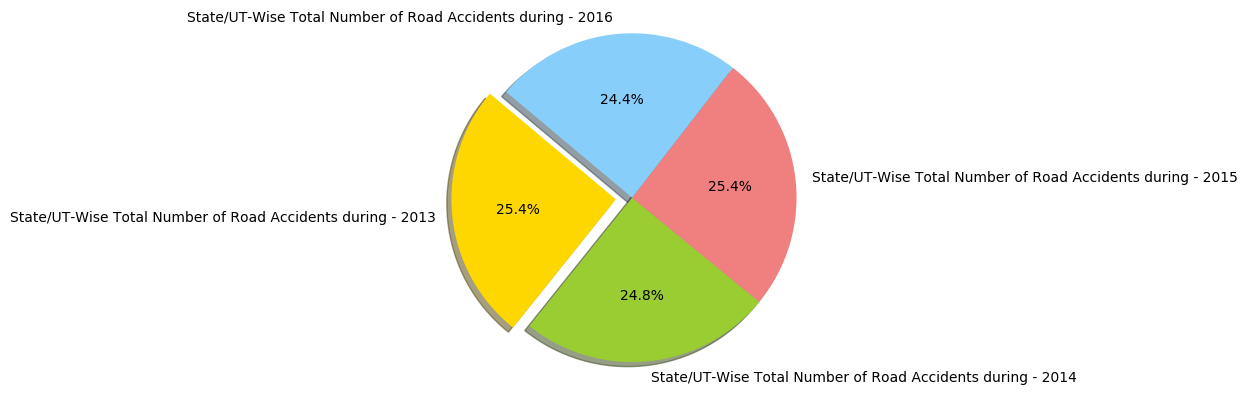

In [79]:
labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])),(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])),(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])),(np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016']))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [80]:
print(np.mean(df['Total Number of Accidents Per Lakh Population - 2013']))

41.91111111111111


In [81]:
print(np.mean(df['Total Number of Accidents Per Lakh Population - 2014']))

39.87777777777778


In [82]:
print(np.mean(df['Total Number of Accidents Per Lakh Population - 2015']))

40.83333333333333


In [83]:
print(np.mean(df['Total Number o Accidents Per Lakh Population - 2016']))

KeyError: 'Total Number o Accidents Per Lakh Population - 2016'

In [ ]:
objects = ('2013','2014','2015','2016')
y_pos = np.arange(len(objects))
performance = [(np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])),(np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])),(np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])),(np.mean(df['Total Number of Accidents Per Lakh Population - 2016']))]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total accidents')
plt.title('Accidents per lakh population')
 
plt.show()

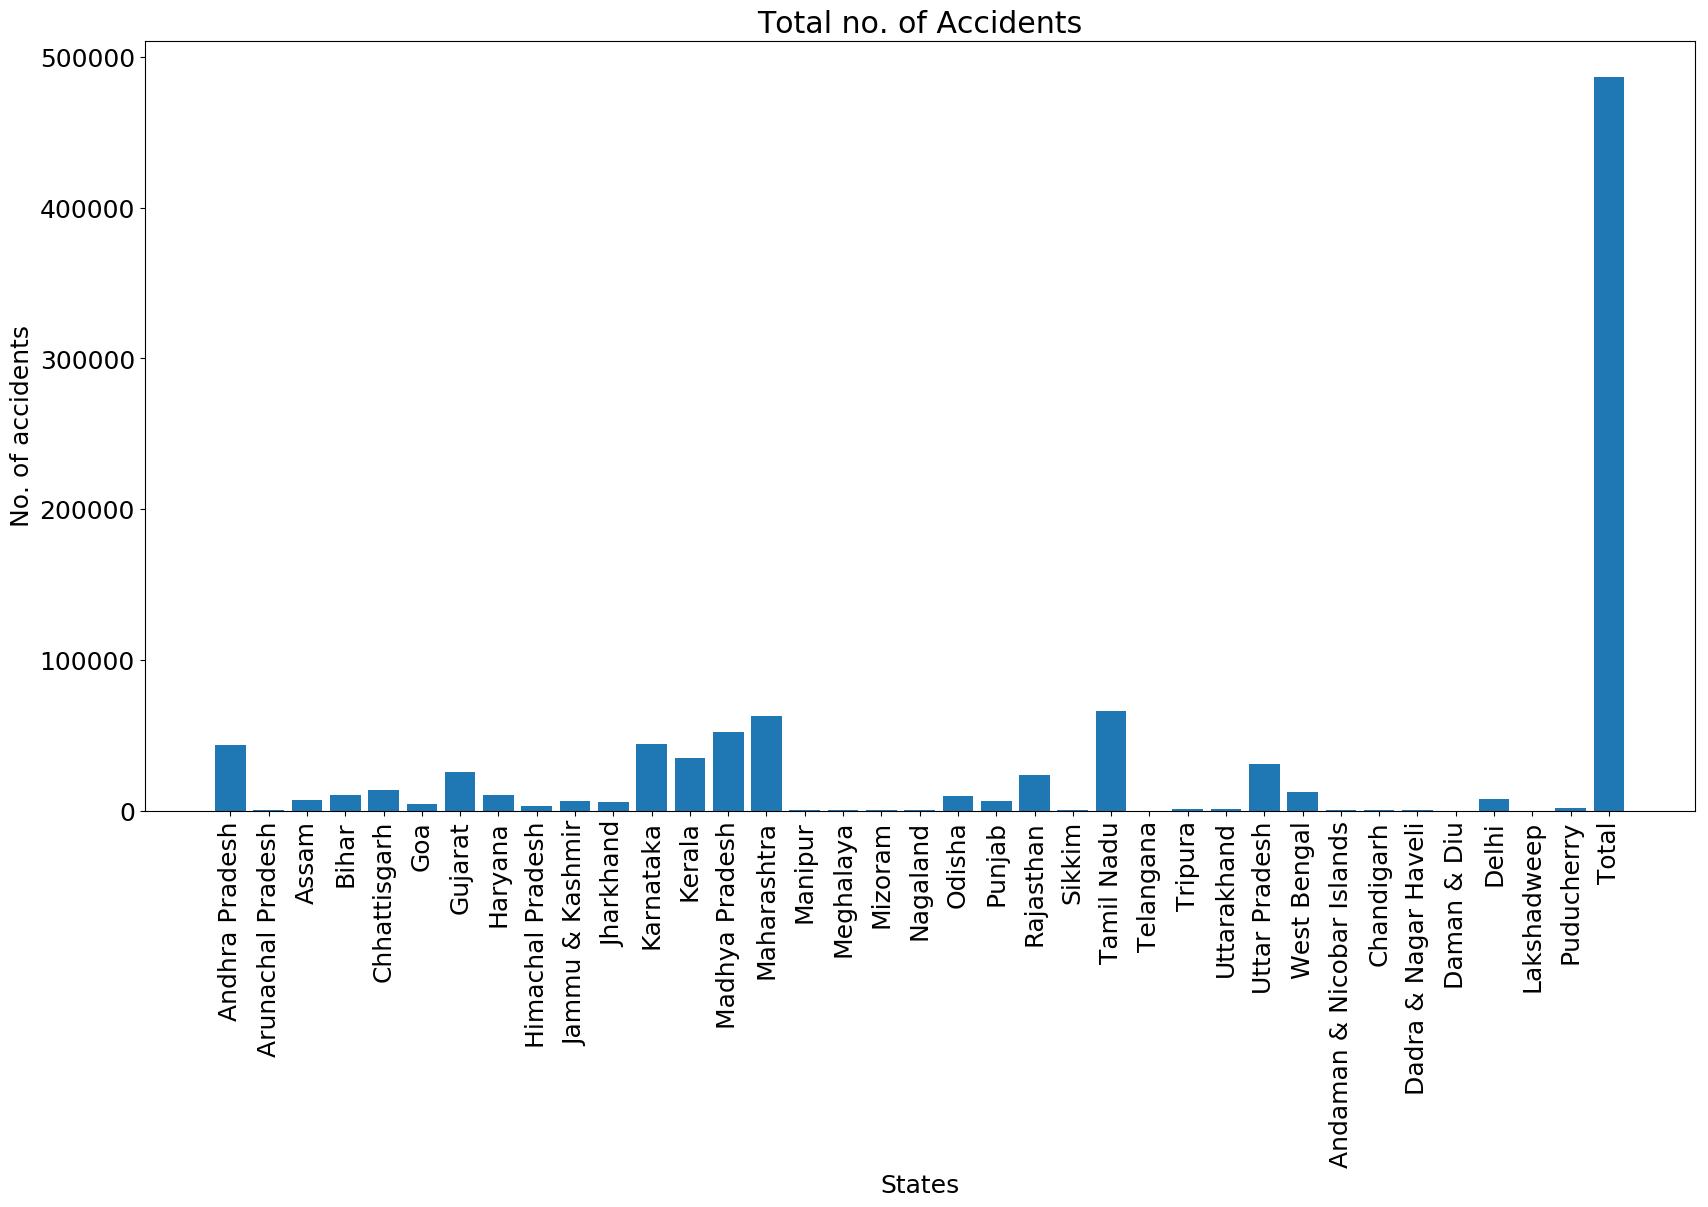

In [84]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
y=df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd=df['States/UTs']
p=df['States/UTs'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=90)
plt.xlabel('States')
plt.ylabel('No. of accidents')
plt.title('Total no. of Accidents')
plt.show()

In [85]:
print(np.min(df['Total Number of Accidents Per Lakh Population - 2013']))

1.3


In [86]:
print(np.min(df['Total Number of Accidents Per Lakh Population - 2014']))

1.3


In [87]:
print(np.min(df['Total Number of Accidents Per Lakh Population - 2015']))

2.3


In [88]:
print(np.min(df['Total Number of Accidents Per Lakh Population - 2016']))

1.2


In [89]:
print(np.max(df['Total Number of Accidents Per Lakh Population - 2013']))

229.9


In [90]:
print(np.max(df['Total Number of Accidents Per Lakh Population - 2014']))

220.8


In [91]:
print(np.max(df['Total Number of Accidents Per Lakh Population - 2015']))

222.1


In [92]:
print(np.max(df['Total Number of Accidents Per Lakh Population - 2016']))

217.7


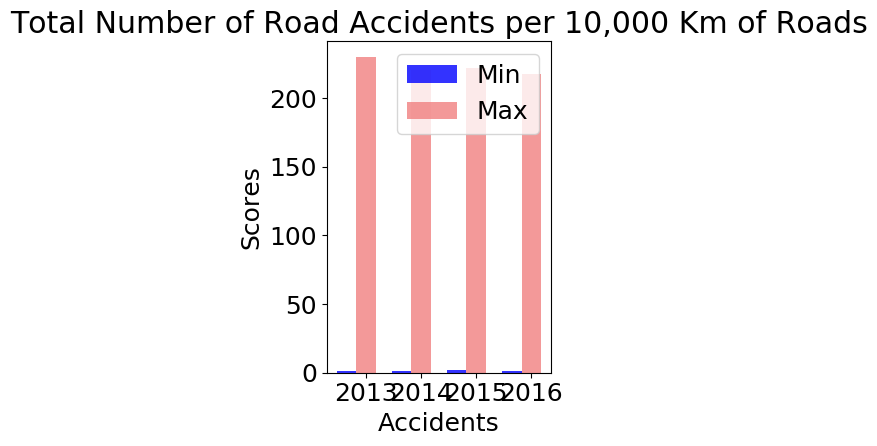

In [93]:
n = 4
min = ((np.min(df['Total Number of Accidents Per Lakh Population - 2013'])),(np.min(df['Total Number of Accidents Per Lakh Population - 2014'])),(np.min(df['Total Number of Accidents Per Lakh Population - 2015'])),(np.min(df['Total Number of Accidents Per Lakh Population - 2016'])))
max = ((np.max(df['Total Number of Accidents Per Lakh Population - 2013'])),(np.max(df['Total Number of Accidents Per Lakh Population - 2014'])),(np.max(df['Total Number of Accidents Per Lakh Population - 2015'])),(np.max(df['Total Number of Accidents Per Lakh Population - 2016'])))
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.8
r1 = plt.bar(index, min, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Min')
r2 = plt.bar(index + bar_width, max, bar_width,
                 alpha=opacity,
                 color='lightcoral',
                 label='Max')

plt.xlabel('Accidents')
plt.ylabel('Scores')
plt.title('Total Number of Road Accidents per 10,000 Km of Roads')
plt.xticks(index + bar_width, ('2013', '2014', '2015', '2016'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [94]:
print(np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

251.59251559251558


In [ ]:
print(np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [95]:
print(np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))

0.0


Offenders died according to gender

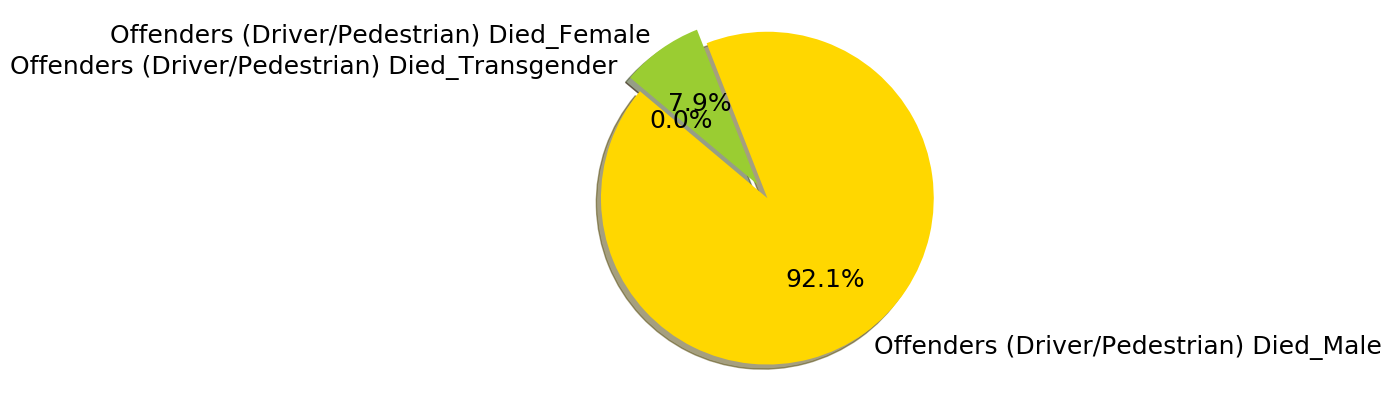

In [96]:
labels = 'Offenders (Driver/Pedestrian) Died_Male','Offenders (Driver/Pedestrian) Died_Female','Offenders (Driver/Pedestrian) Died_Transgender'
sizes = [(np.mean(df1['Offenders (Driver/Pedestrian) Died_Male'])),(np.mean(df1['Offenders (Driver/Pedestrian) Died_Female'])),(np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Victims died according to gender

In [97]:
print(np.mean(df1['Victims Died_Male']))

705.8731808731809


In [98]:
print(np.mean(df1['Victims Died_Female']))

138.59667359667358


In [99]:
print(np.mean(df1['Victims Died_Transgender']))

0.13513513513513514


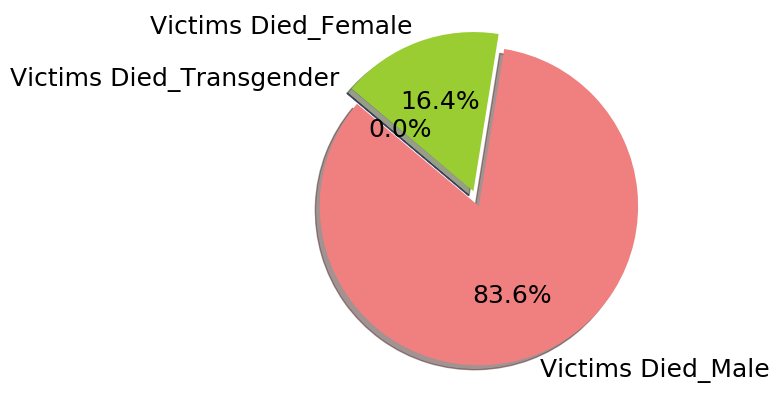

In [100]:
labels = 'Victims Died_Male','Victims Died_Female','Victims Died_Transgender'
sizes = [(np.mean(df1['Victims Died_Male'])),(np.mean(df1['Victims Died_Female'])),(np.mean(df1['Victims Died_Transgender']))]
colors = ['lightcoral', 'yellowgreen', 'blue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [101]:
print(np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))

273.3097713097713


In [102]:
print(np.mean(df1['Victims Died_Total']))

844.6049896049896


Offender's death and Victim's death is being visualized here

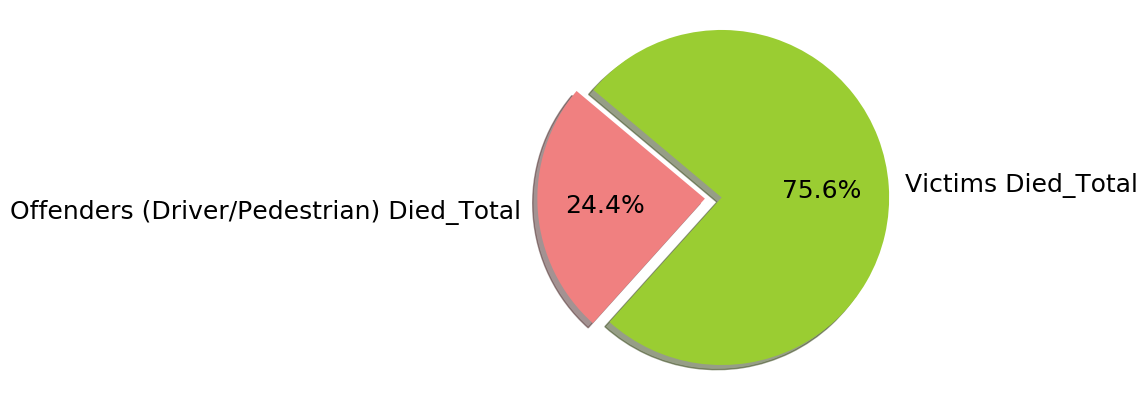

In [103]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [(np.mean(df1['Offenders (Driver/Pedestrian) Died_Total'])),(np.mean(df1['Victims Died_Total']))]
colors = ['lightcoral', 'yellowgreen']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [104]:
print(np.mean(df2['Non-wearing of Helmet - Male']))

465.72972972972974


In [105]:
print(np.mean(df2['Non-wearing of Helmet - Female']))

82.10810810810811


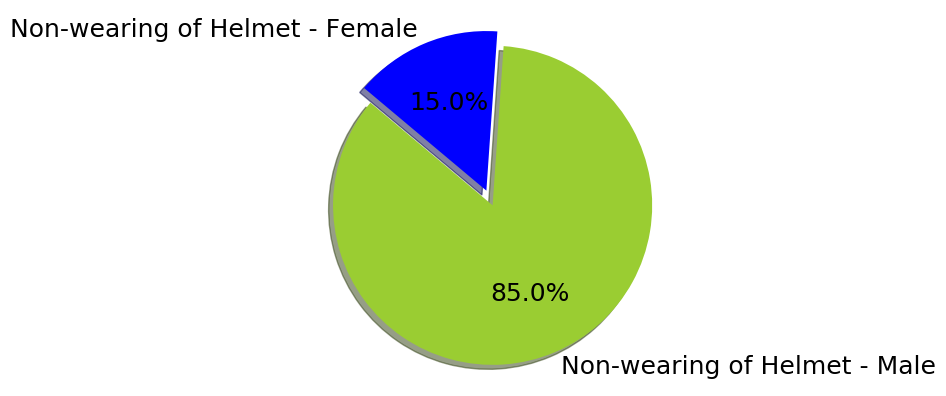

In [106]:
labels = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [(np.mean(df2['Non-wearing of Helmet - Male'])),(np.mean(df2['Non-wearing of Helmet - Female']))]
colors = ['yellowgreen', 'blue']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.show()

In [107]:
xs = [486476,489400,501423,480652]
ys = [2013,2014,2015,2016]
len(xs),len(ys)

(4, 4)

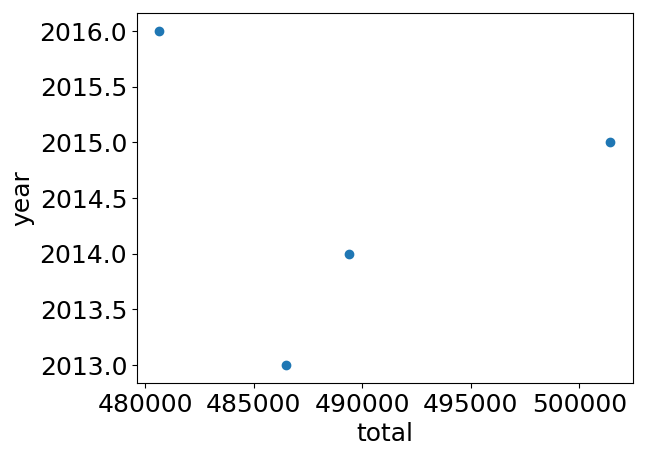

In [108]:
plt.scatter(xs,ys)
plt.ylabel("year")
plt.xlabel("total")
plt.show()

In [109]:
df = pd.read_csv("/home/abhay/laneAccidents.csv",index_col=0)
df.dropna(axis=0,how='any',inplace=True)

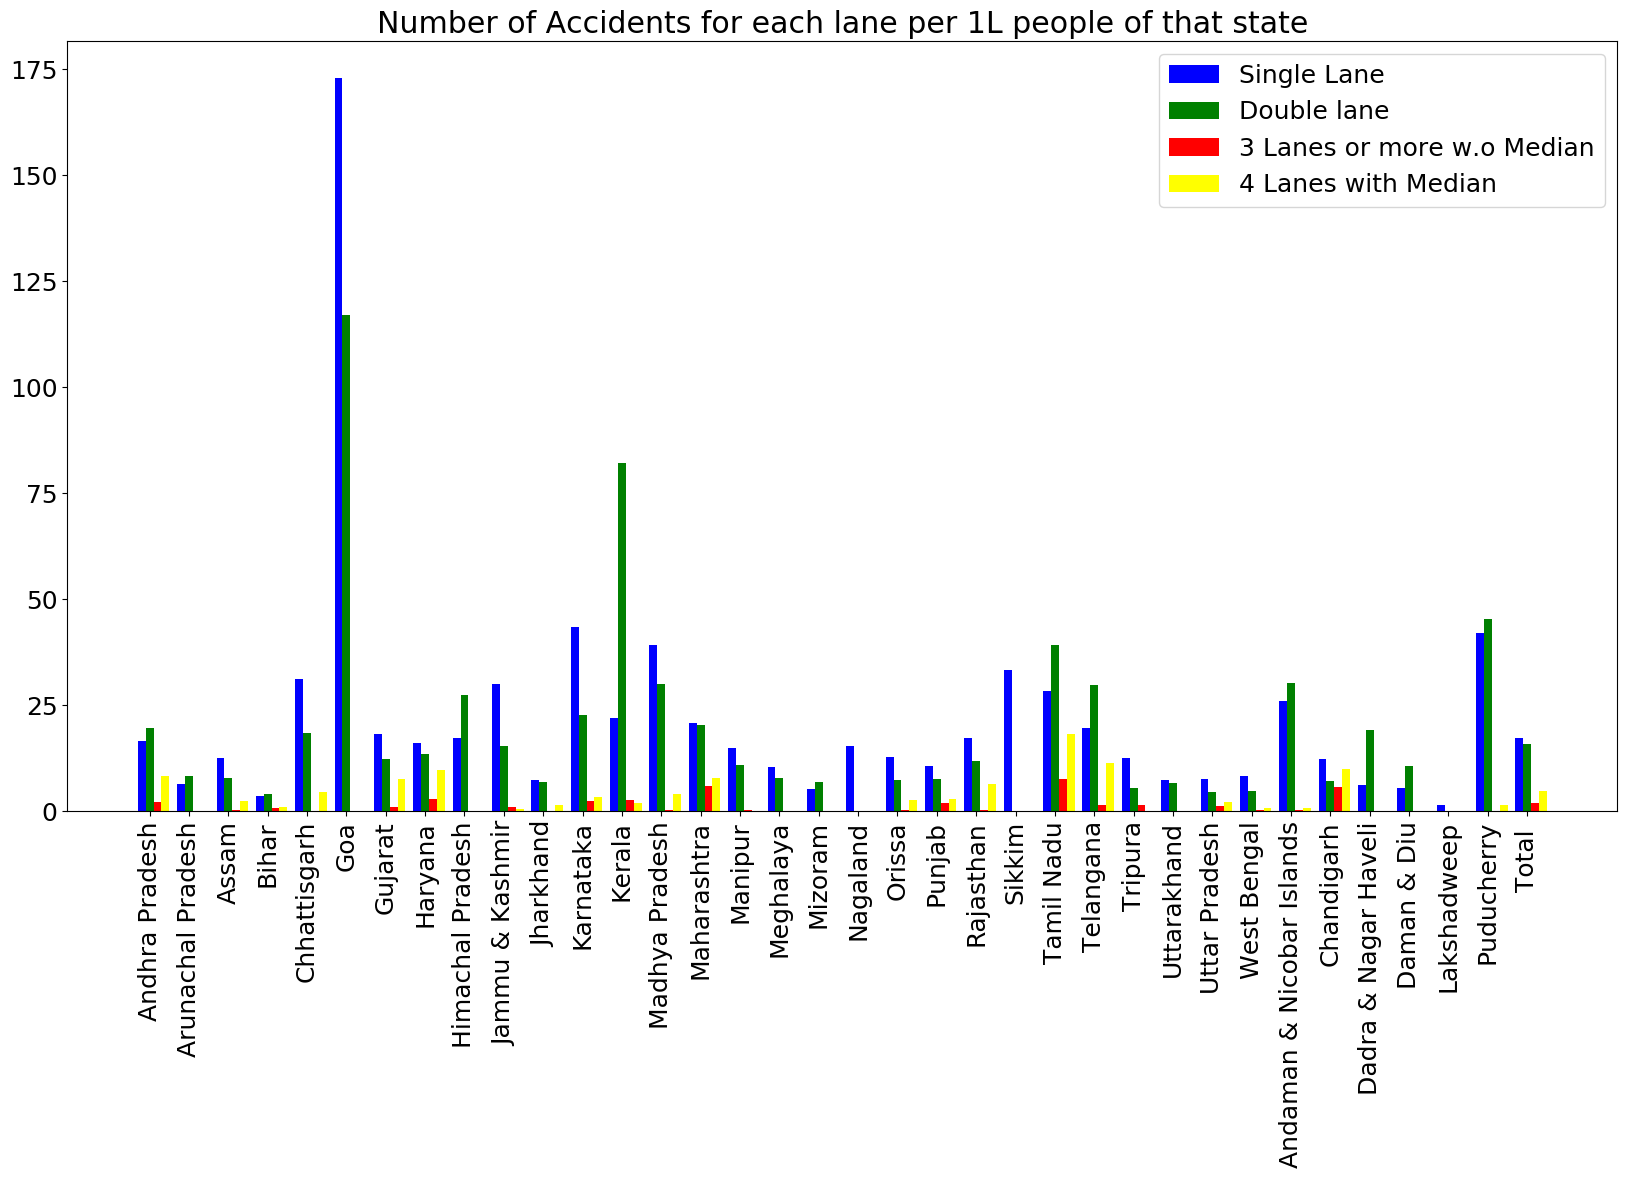

In [110]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.bar(UT-0.2,df['Single Lane - Accident - 2014 per 1L people'],width=0.2,color='b',align='center',label='Single Lane')
plt.bar(UT,df['Two Lanes - Accident - 2014 per 1L people'],width=0.2,color='g',align='center',label='Double lane')
plt.bar(UT+0.2,df['3 Lanes or more w.o Median - Accident - 2014 per 1L people'],width=0.2,color='r',align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4,df['4 Lanes with Median - Accident - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='4 Lanes with Median')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Accidents for each lane per 1L people of that state")
plt.legend(loc="best")
plt.show()

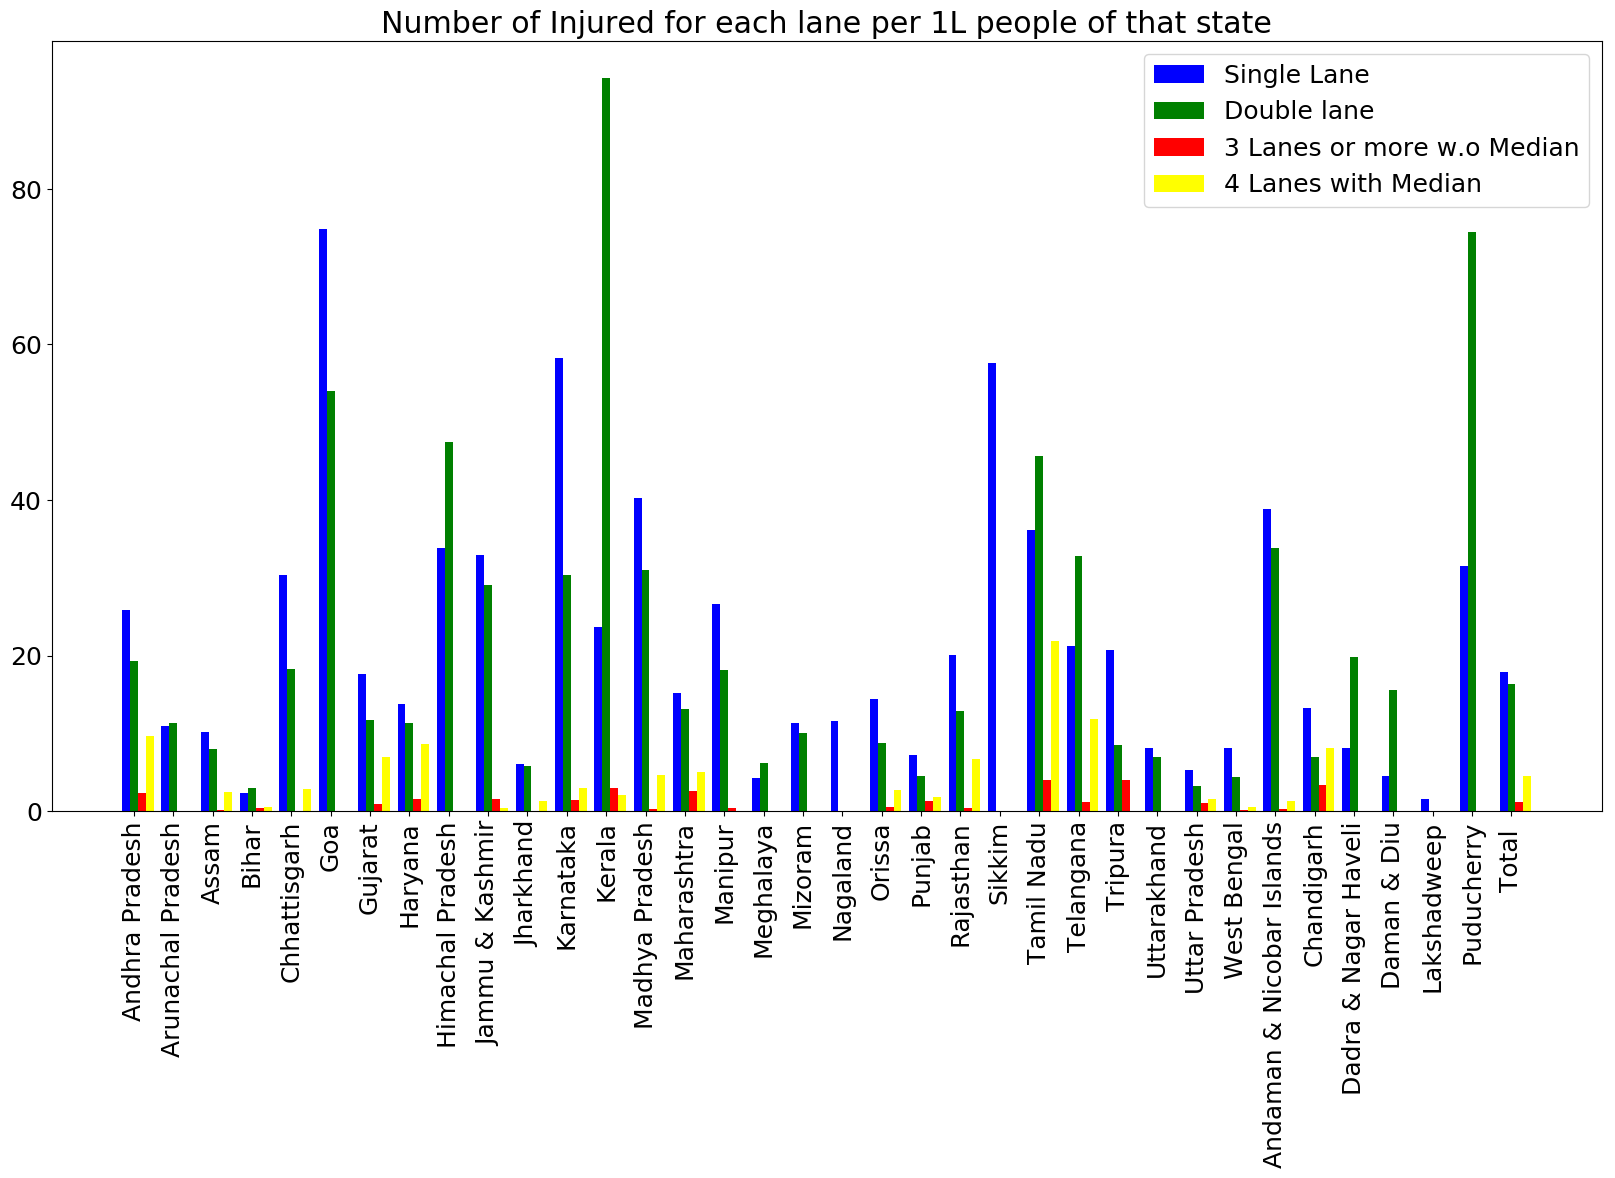

In [111]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Single Lane - Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Single Lane')
plt.bar(UT,df['Two Lanes - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Double lane')
plt.bar(UT+0.2,df['3 Lanes or more w.o Median - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4,df['4 Lanes with Median - Injured - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='4 Lanes with Median')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Injured for each lane per 1L people of that state")
plt.legend(loc="best")
plt.show()

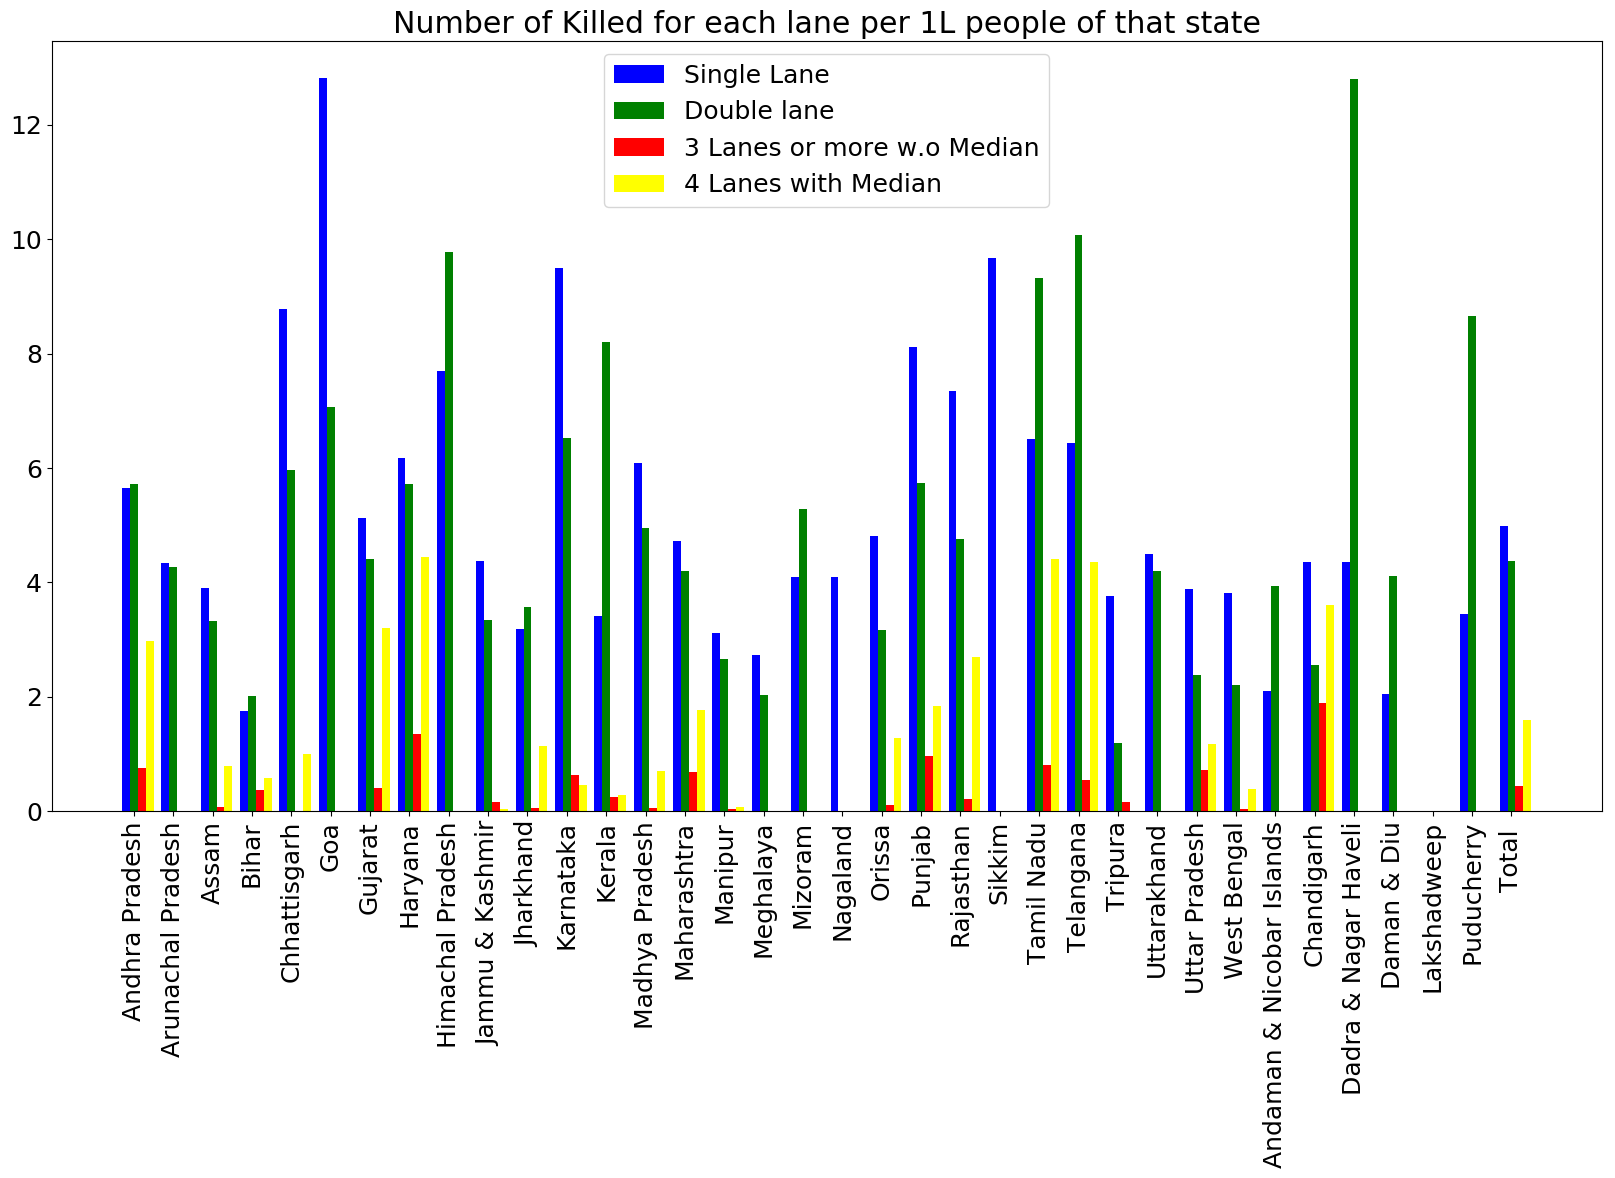

In [112]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Single Lane - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Single Lane')
plt.bar(UT,df['Two Lanes - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Double lane')
plt.bar(UT+0.2,df['3 Lanes or more w.o Median - Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4,df['4 Lanes with Median - Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='4 Lanes with Median')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Killed for each lane per 1L people of that state")
plt.show()

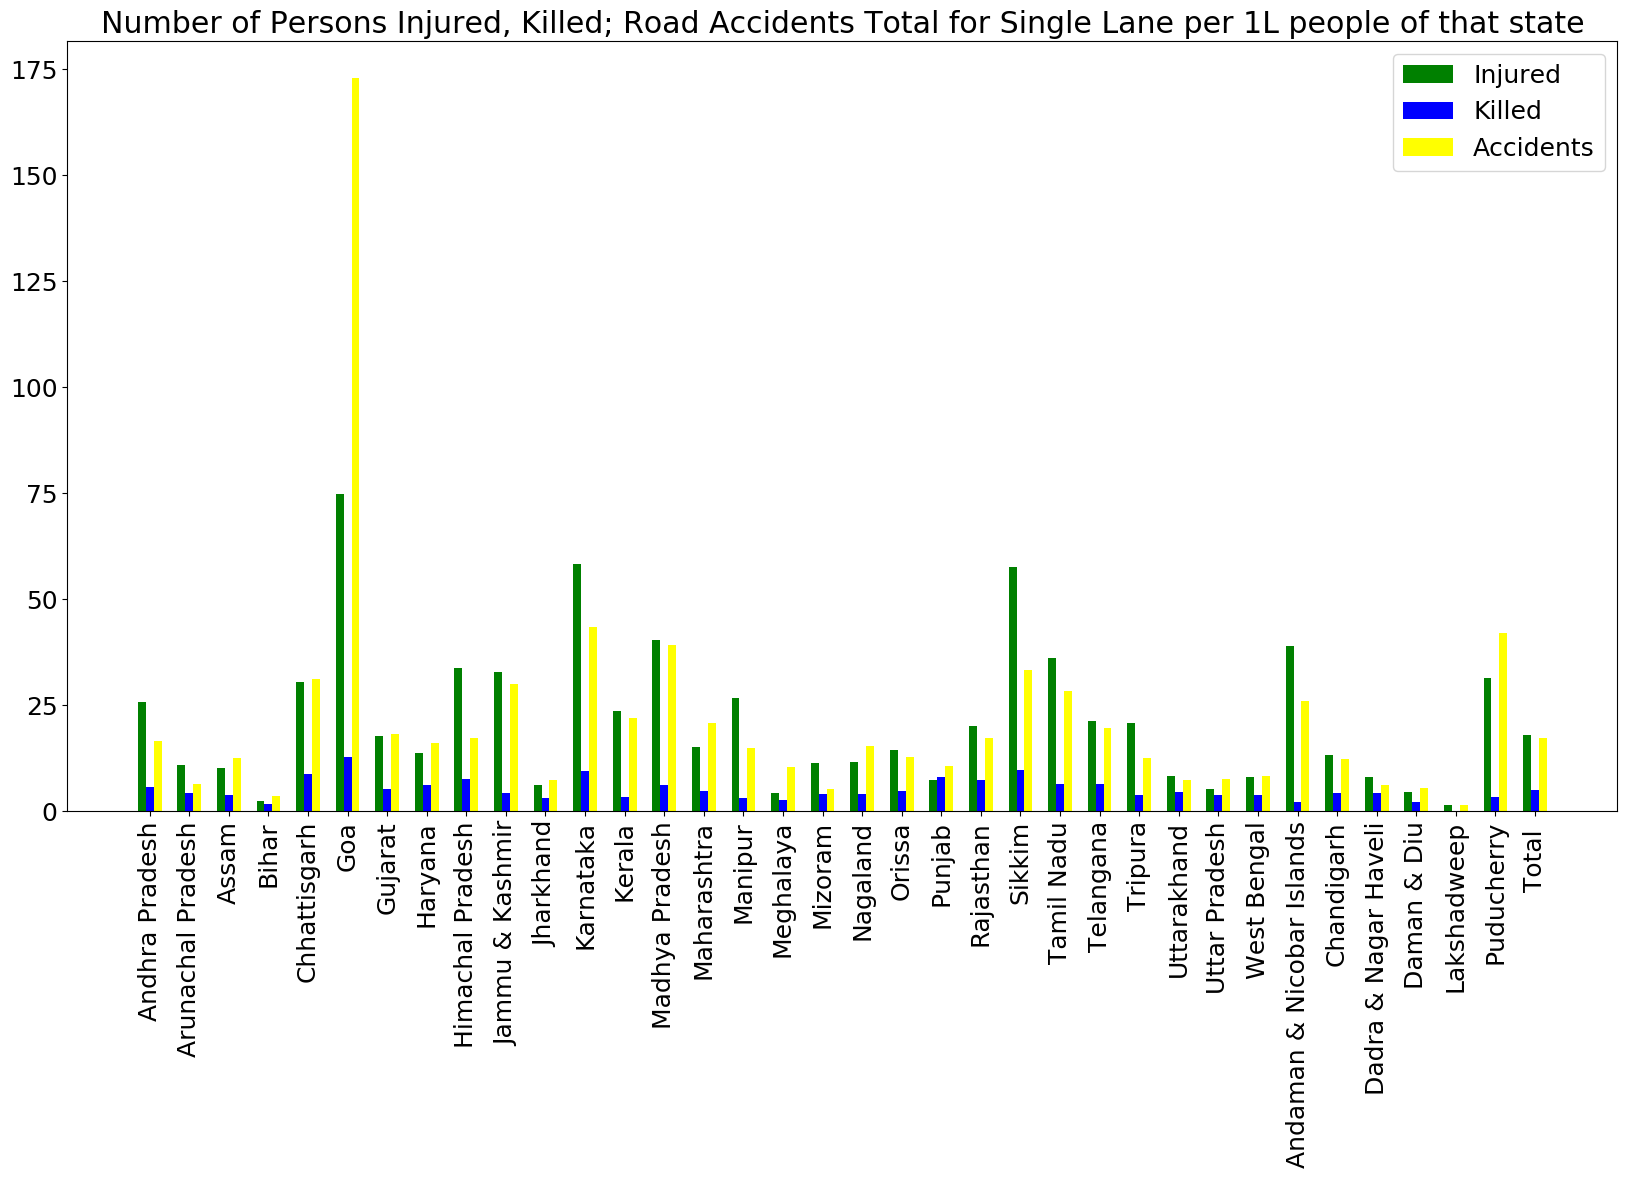

In [113]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Single Lane - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Injured')
plt.bar(UT,df['Single Lane - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Killed')
plt.bar(UT+0.2,df['Single Lane - Accident - 2014 per 1L people'],width=0.2,color='yellow',align='center',label="Accidents")
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Persons Injured, Killed; Road Accidents Total for Single Lane per 1L people of that state")
plt.legend(loc="best")
plt.show()

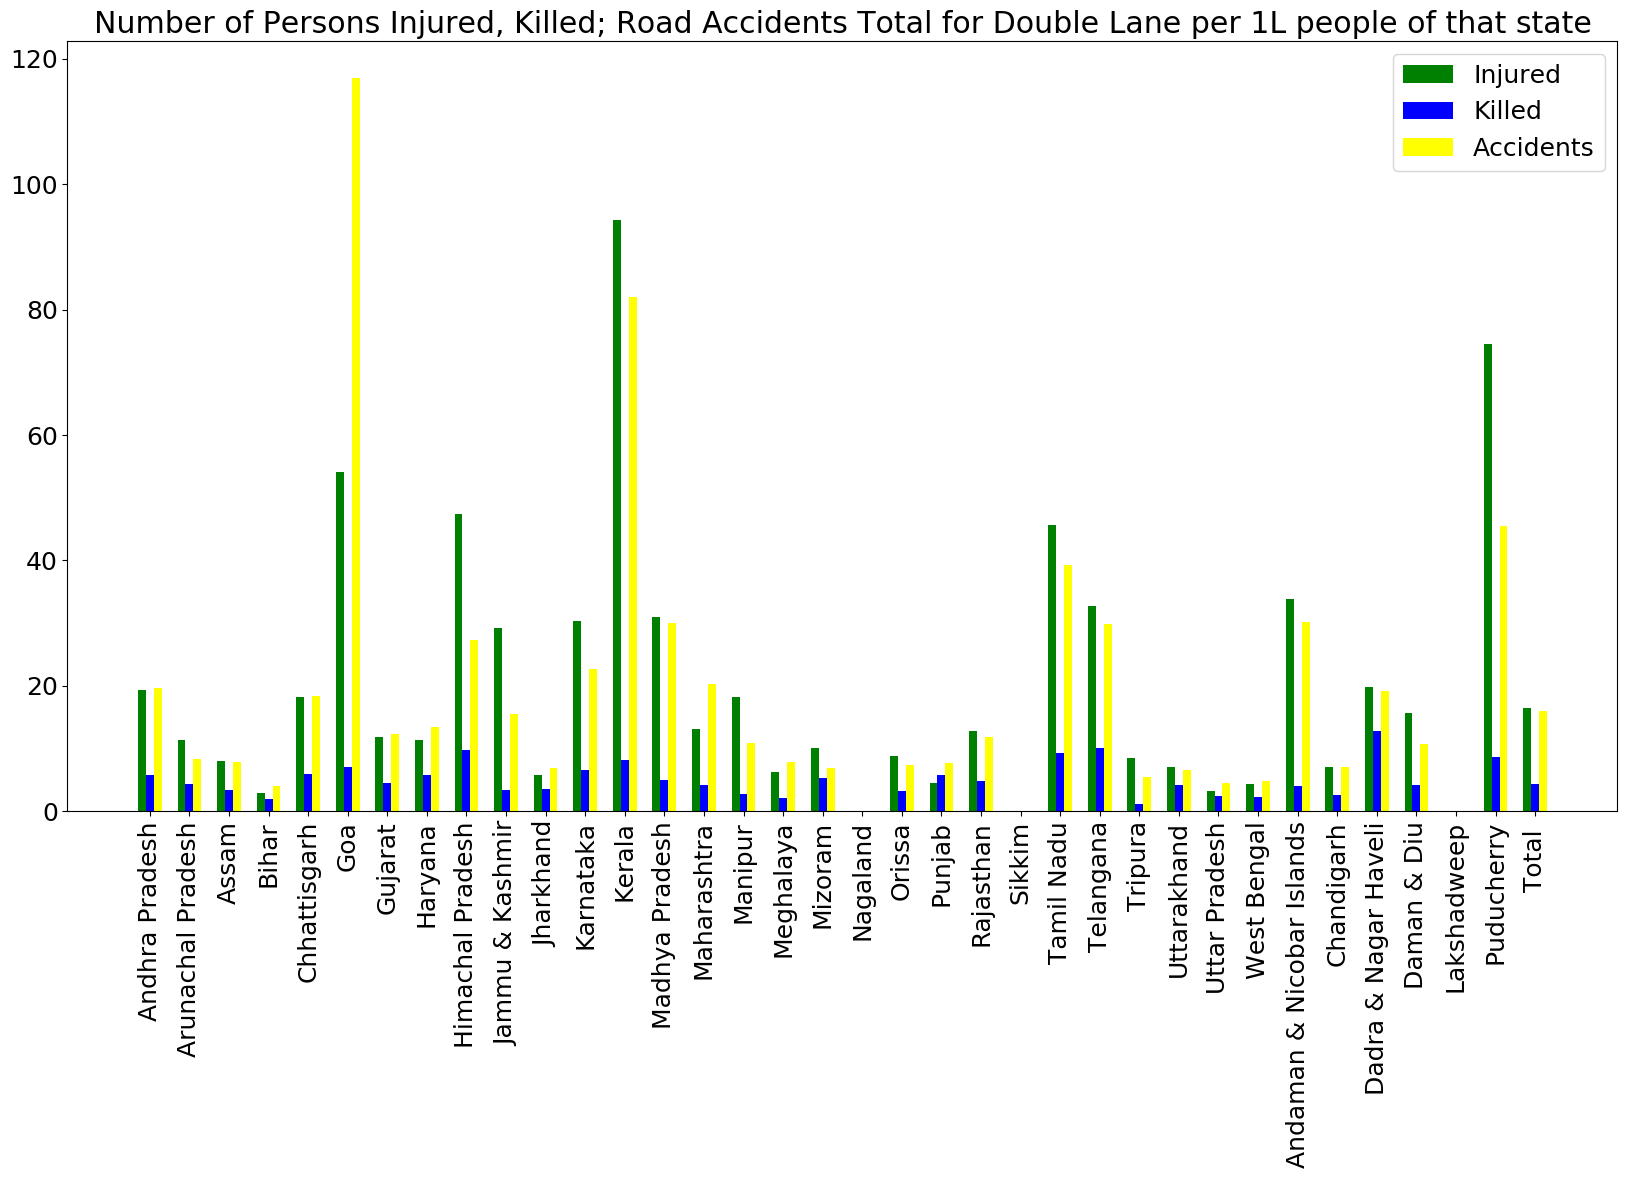

In [114]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Two Lanes - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Injured')
plt.bar(UT,df['Two Lanes - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Killed')
plt.bar(UT+0.2,df['Two Lanes - Accident - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Accidents')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Persons Injured, Killed; Road Accidents Total for Double Lane per 1L people of that state")
plt.legend(loc="best")
plt.show()


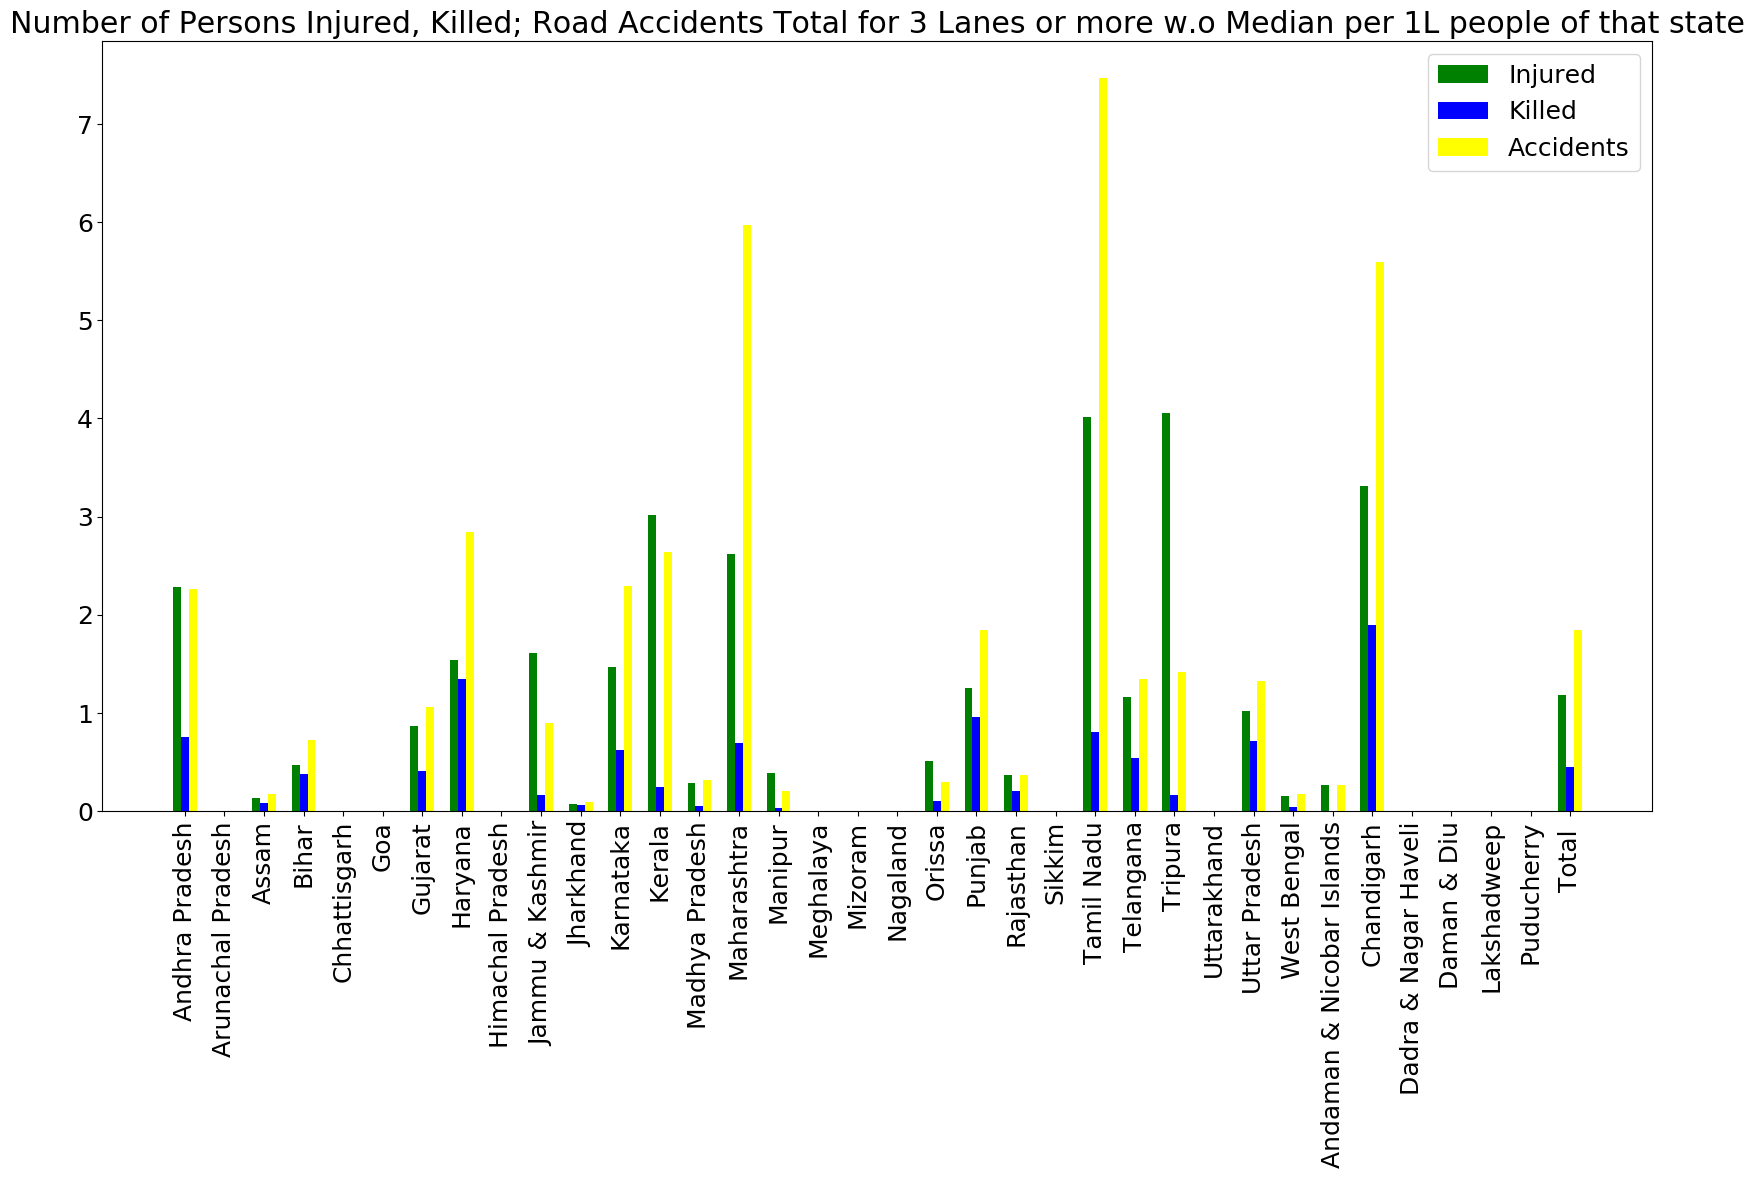

In [115]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['3 Lanes or more w.o Median - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Injured')
plt.bar(UT,df['3 Lanes or more w.o Median - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Killed')
plt.bar(UT+0.2,df['3 Lanes or more w.o Median - Accident - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Accidents')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Persons Injured, Killed; Road Accidents Total for 3 Lanes or more w.o Median per 1L people of that state")
plt.legend(loc="best")
plt.show()

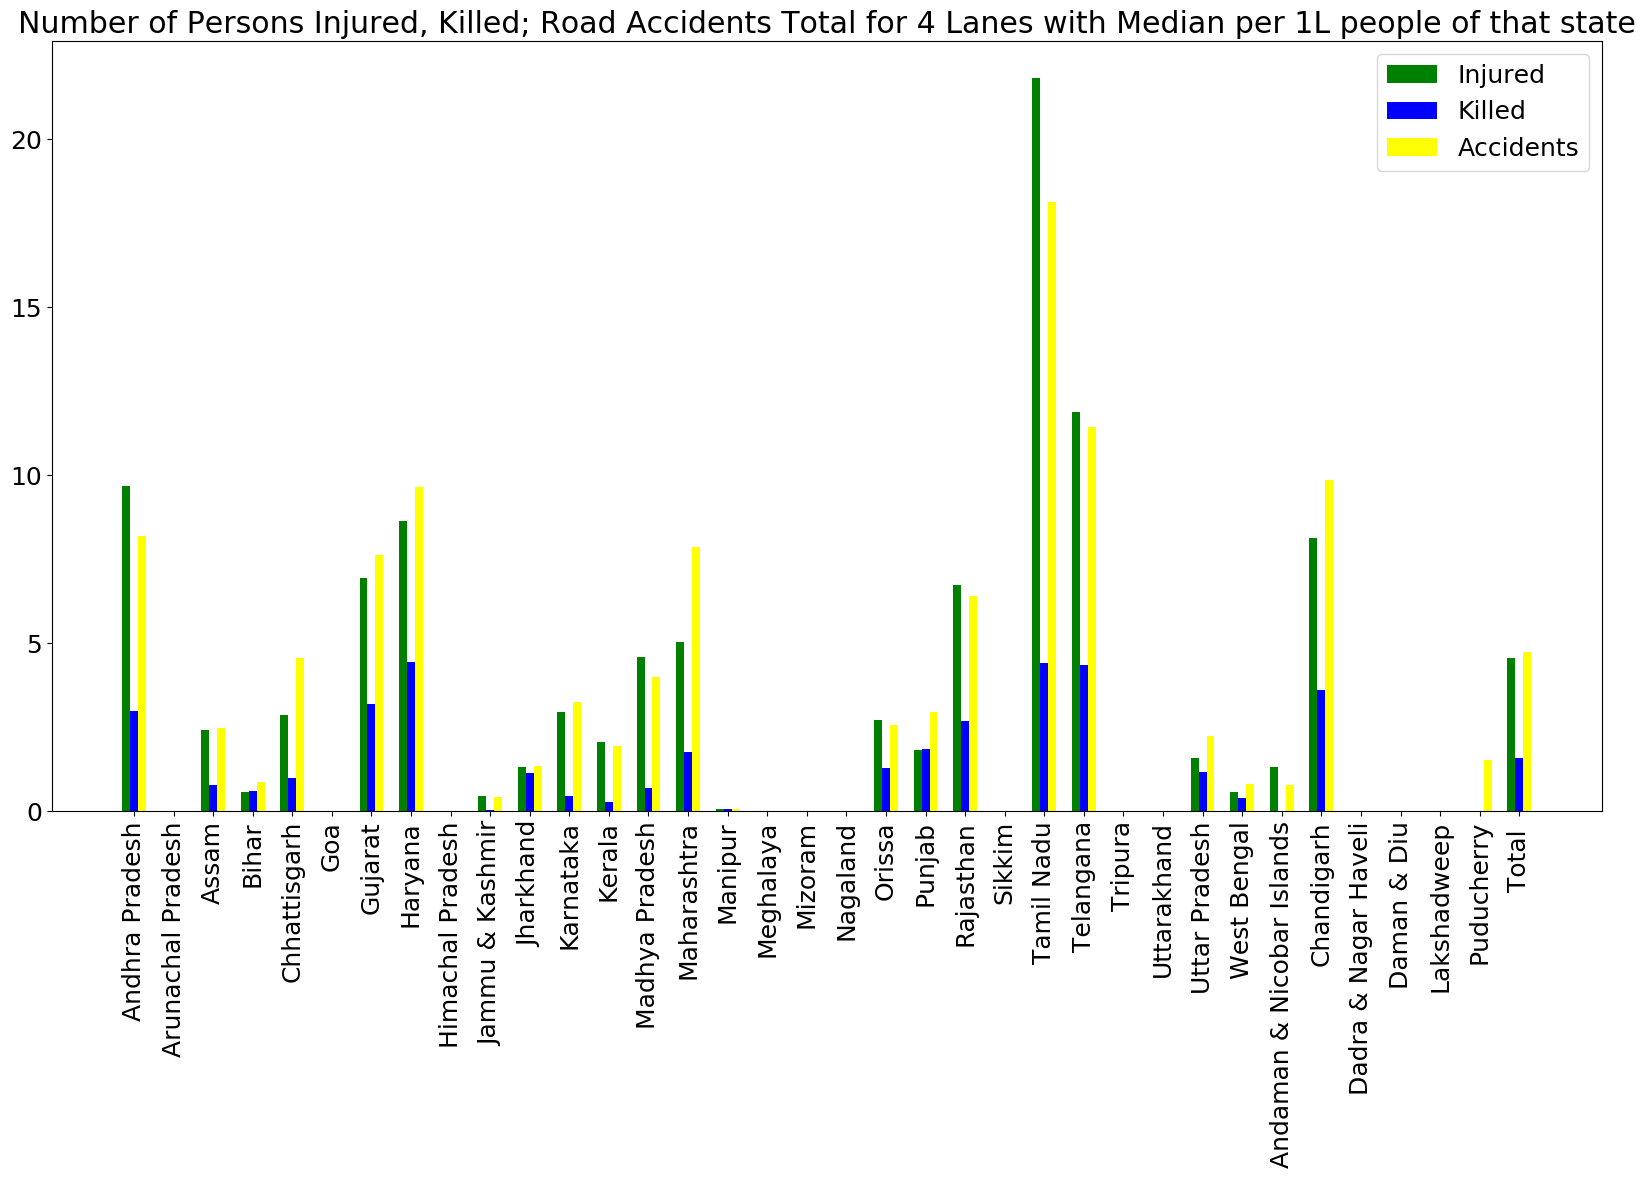

In [116]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['4 Lanes with Median - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Injured')
plt.bar(UT,df['4 Lanes with Median - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Killed')
plt.bar(UT+0.2,df['4 Lanes with Median - Accident - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Accidents')

plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Number of Persons Injured, Killed; Road Accidents Total for 4 Lanes with Median per 1L people of that state")
plt.legend(loc="best")
plt.show()

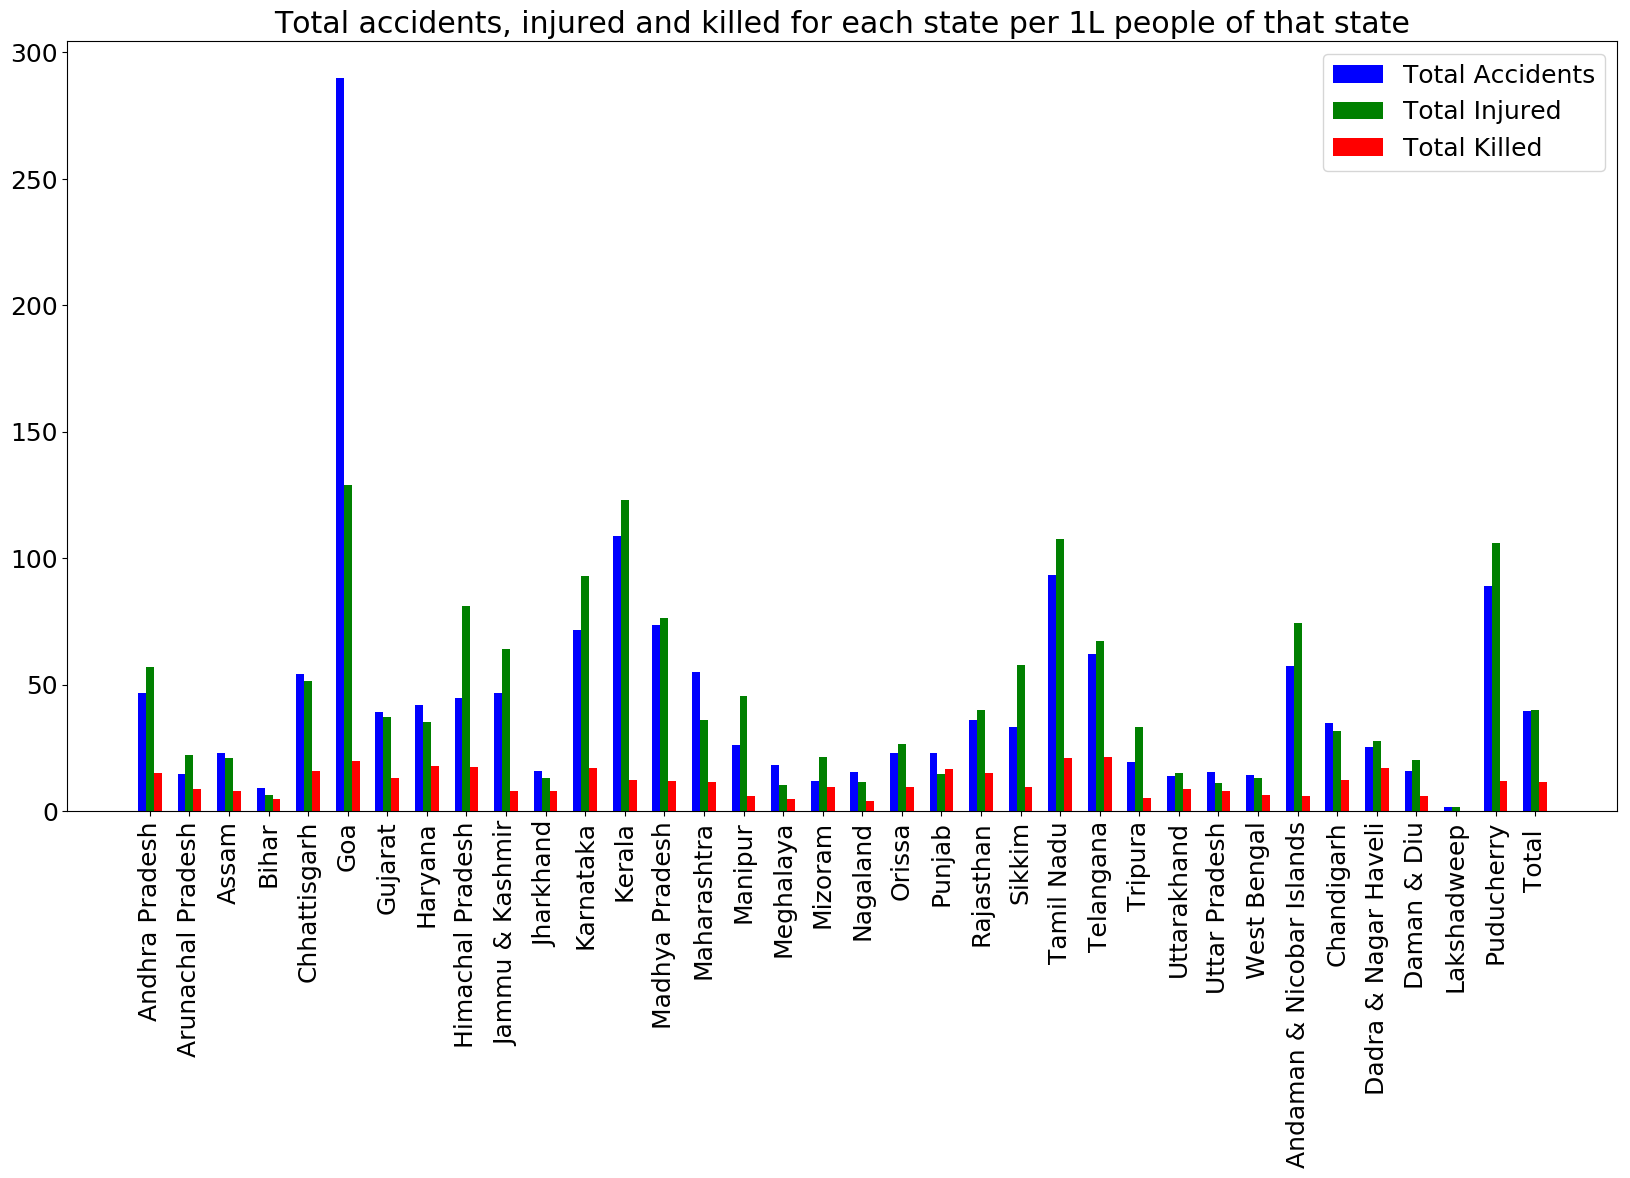

In [117]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
df['Sum Total Number of Persons Killed - 2014 per 1L people']=df['Single Lane - Killed - 2014 per 1L people']+df['Two Lanes - Killed - 2014 per 1L people']+df['3 Lanes or more w.o Median - Killed - 2014 per 1L people']+df['4 Lanes with Median - Killed - 2014 per 1L people']
df['Sum Total Number of Persons Injured - 2014 per 1L people']=df['Single Lane - Injured - 2014 per 1L people']+df['Two Lanes - Injured - 2014 per 1L people']+df['3 Lanes or more w.o Median - Injured - 2014 per 1L people']+df['4 Lanes with Median - Injured - 2014 per 1L people']
df['Sum Total Road Accidents - 2014 per 1L people']=df['Single Lane - Accident - 2014 per 1L people']+df['Two Lanes - Accident - 2014 per 1L people']+df['3 Lanes or more w.o Median - Accident - 2014 per 1L people']+df['4 Lanes with Median - Accident - 2014 per 1L people']

plt.bar(UT-0.2,df['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT,df['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Injured')
plt.bar(UT+0.2,df['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Killed')
plt.xticks(UT,df['State/UT'],rotation='vertical')
plt.title("Total accidents, injured and killed for each state per 1L people of that state")
plt.legend(loc="best")
plt.show()

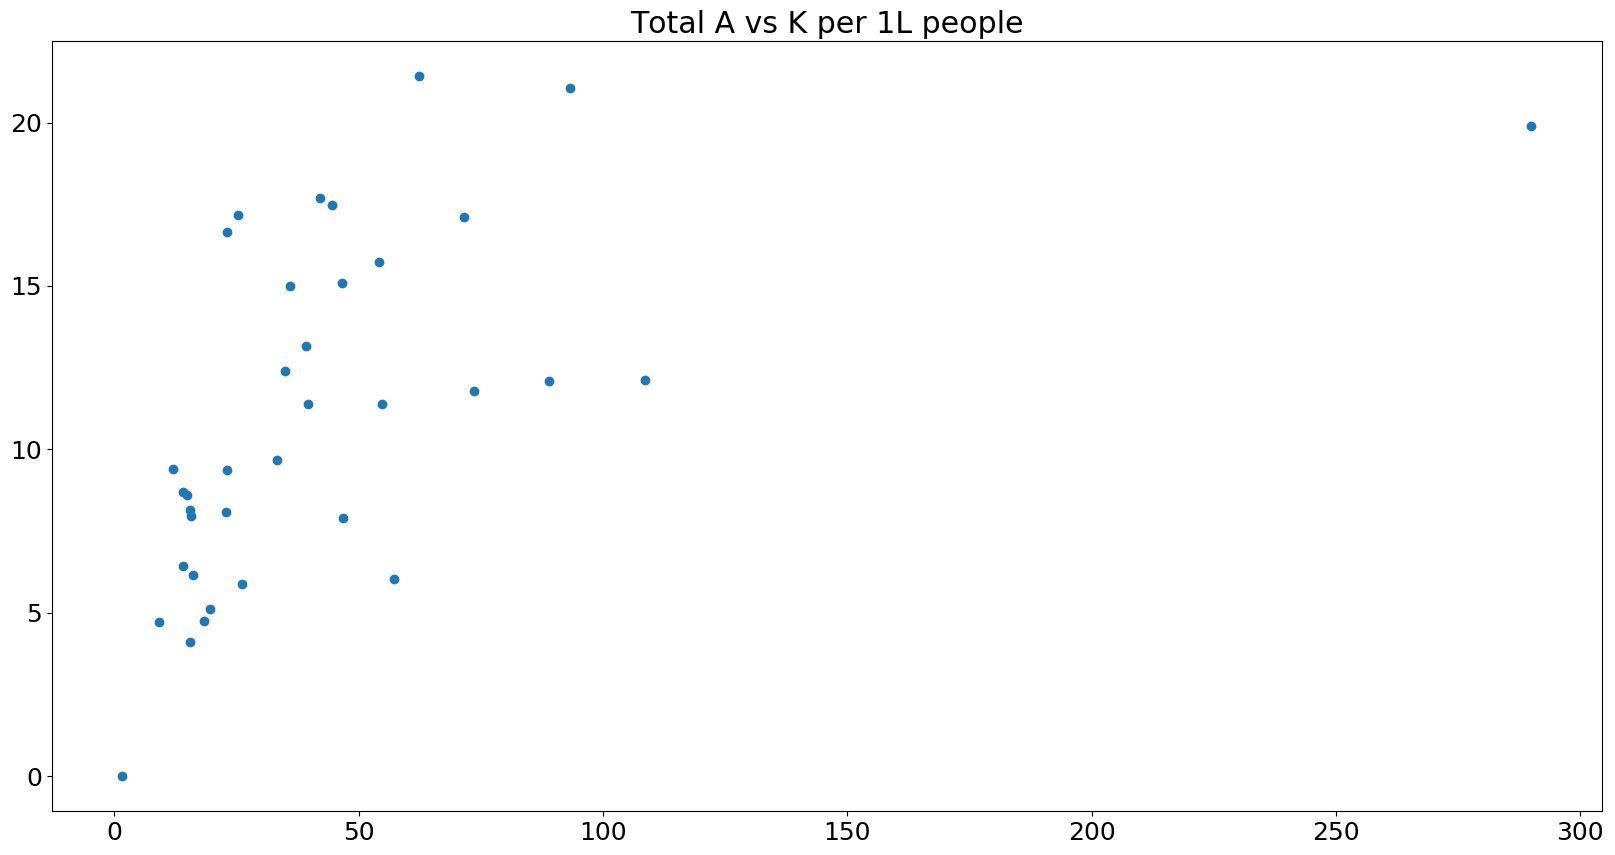

In [118]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.scatter(df['Sum Total Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total A vs K per 1L people")
plt.show()


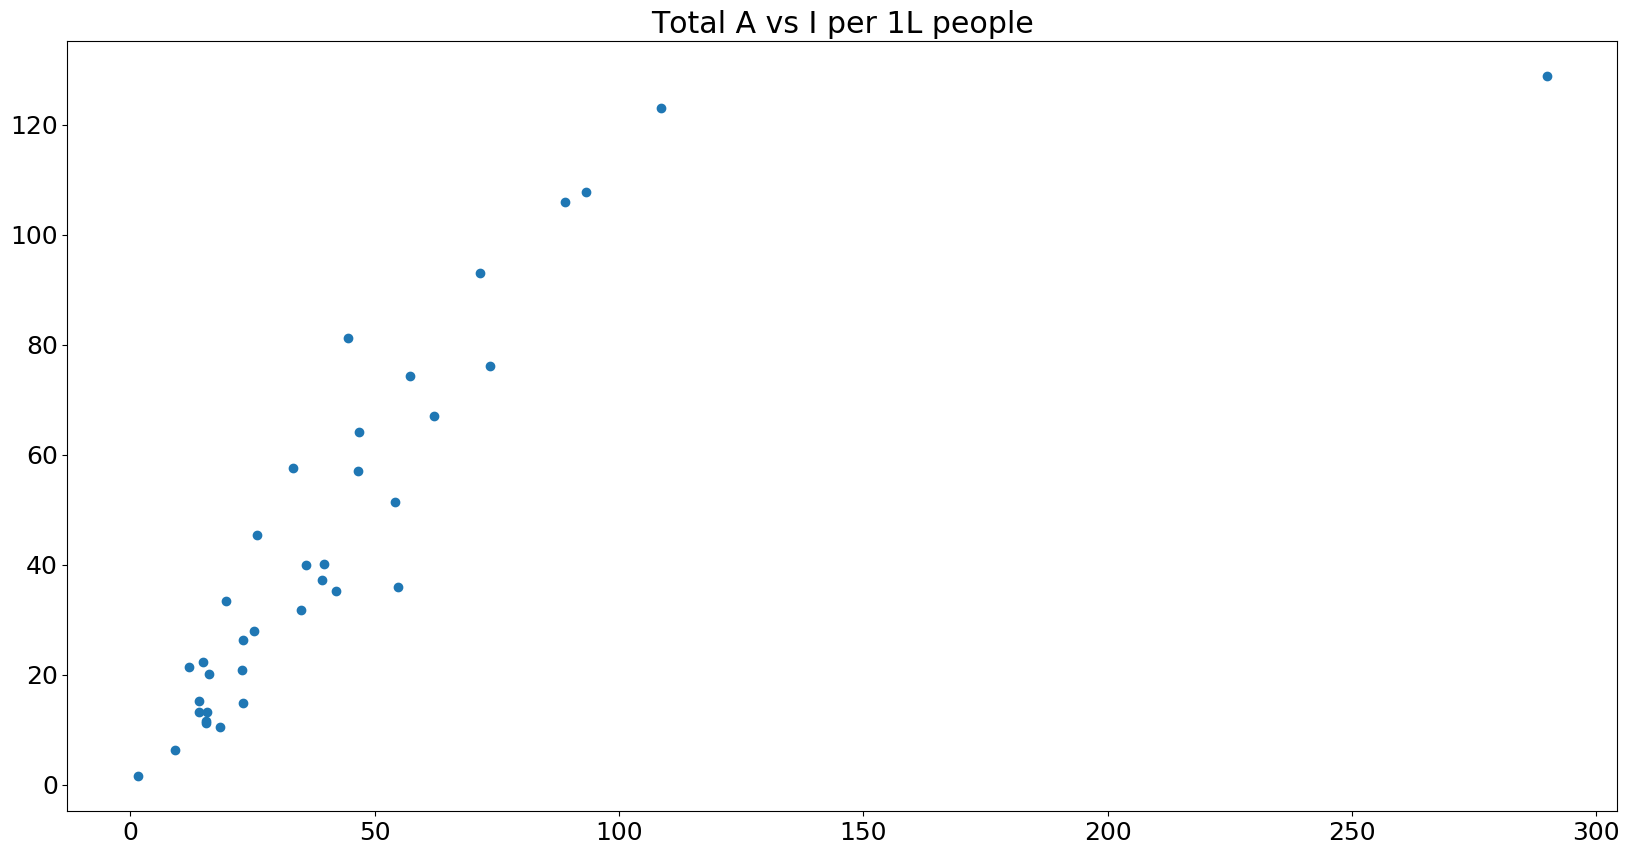

In [119]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.scatter(df['Sum Total Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Injured - 2014 per 1L people'])
plt.title("Total A vs I per 1L people")
plt.show()

In [120]:
df = pd.read_csv("/home/abhay/reasonOfAccident.csv",index_col=0)
df.dropna(axis=0,how='any',inplace=True)

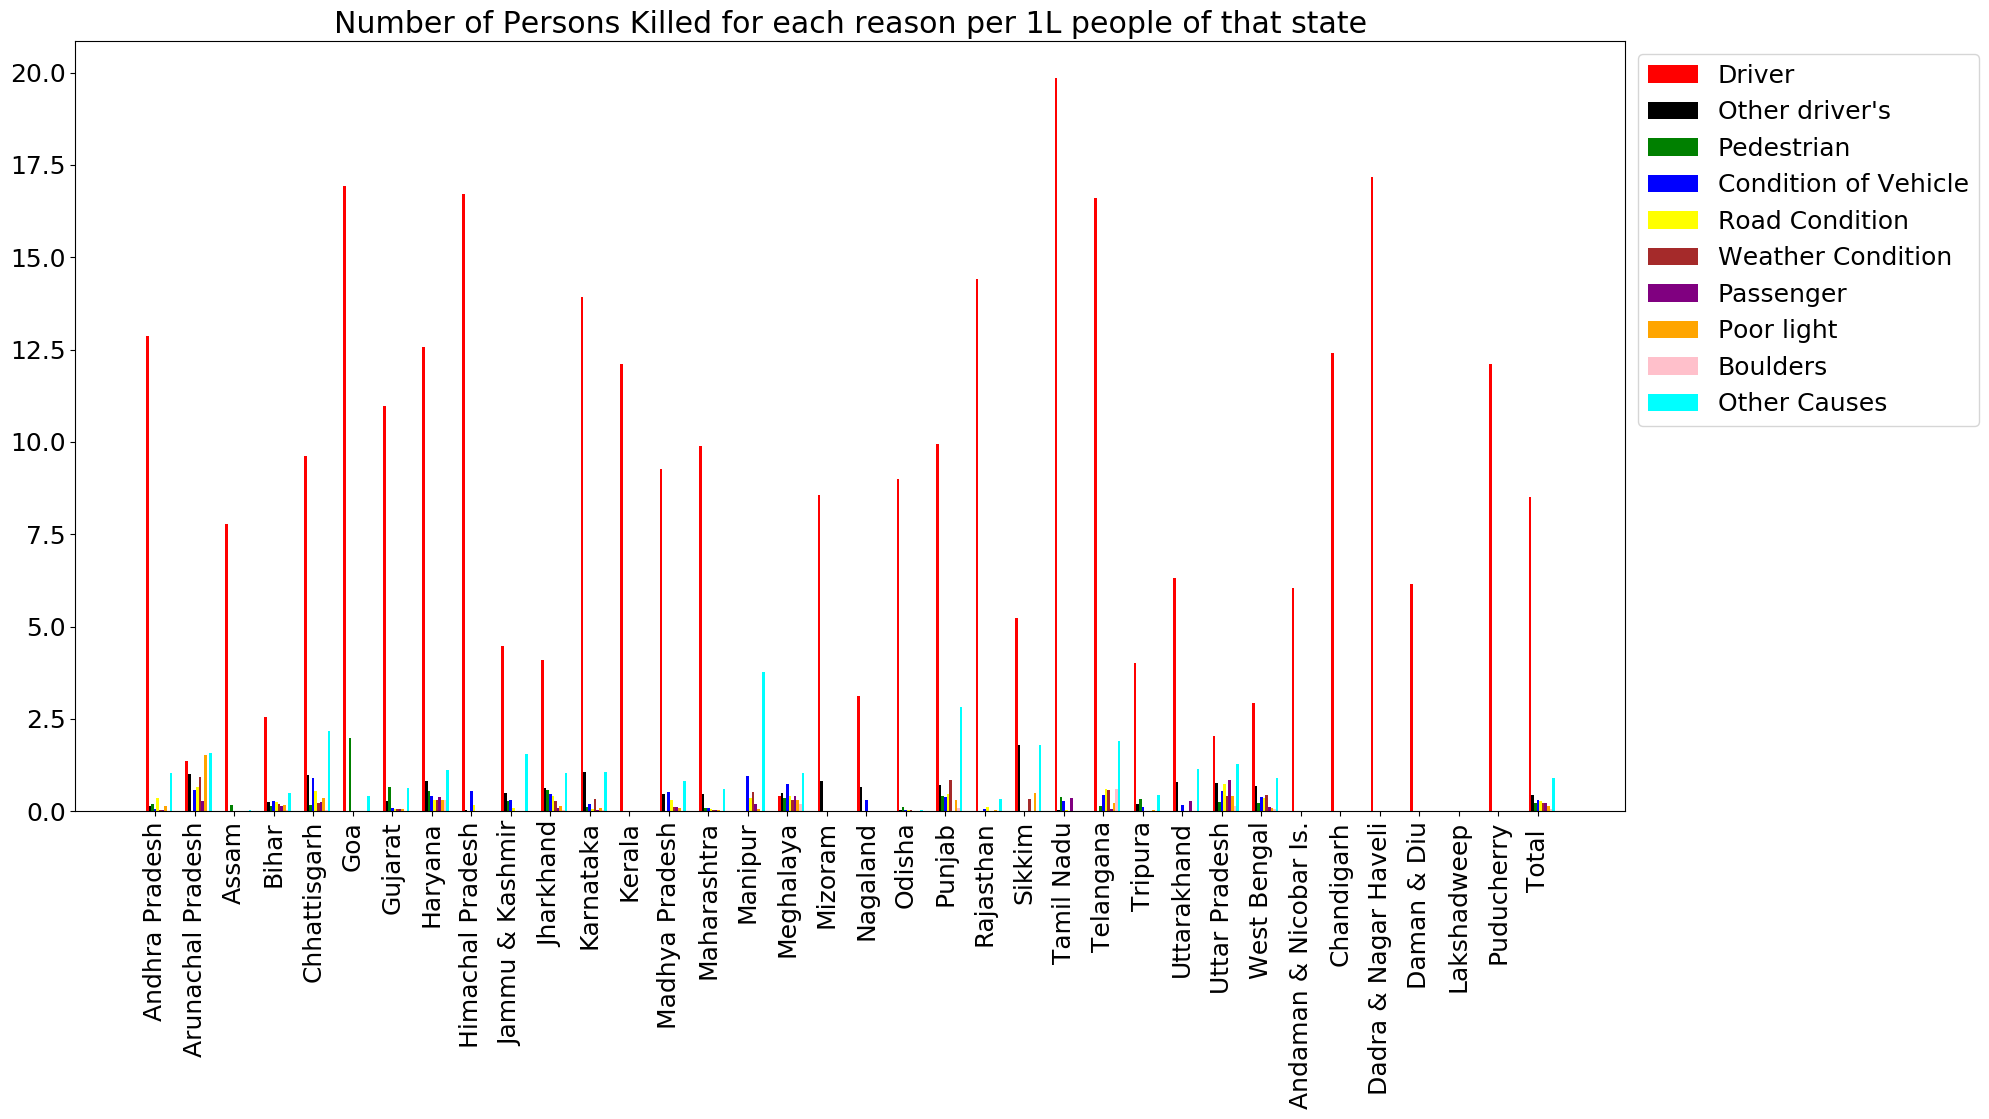

In [121]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
UT=UT*3
plt.bar(UT-0.6,df['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df['Poor light-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of Persons Killed for each reason per 1L people of that state")
plt.show()

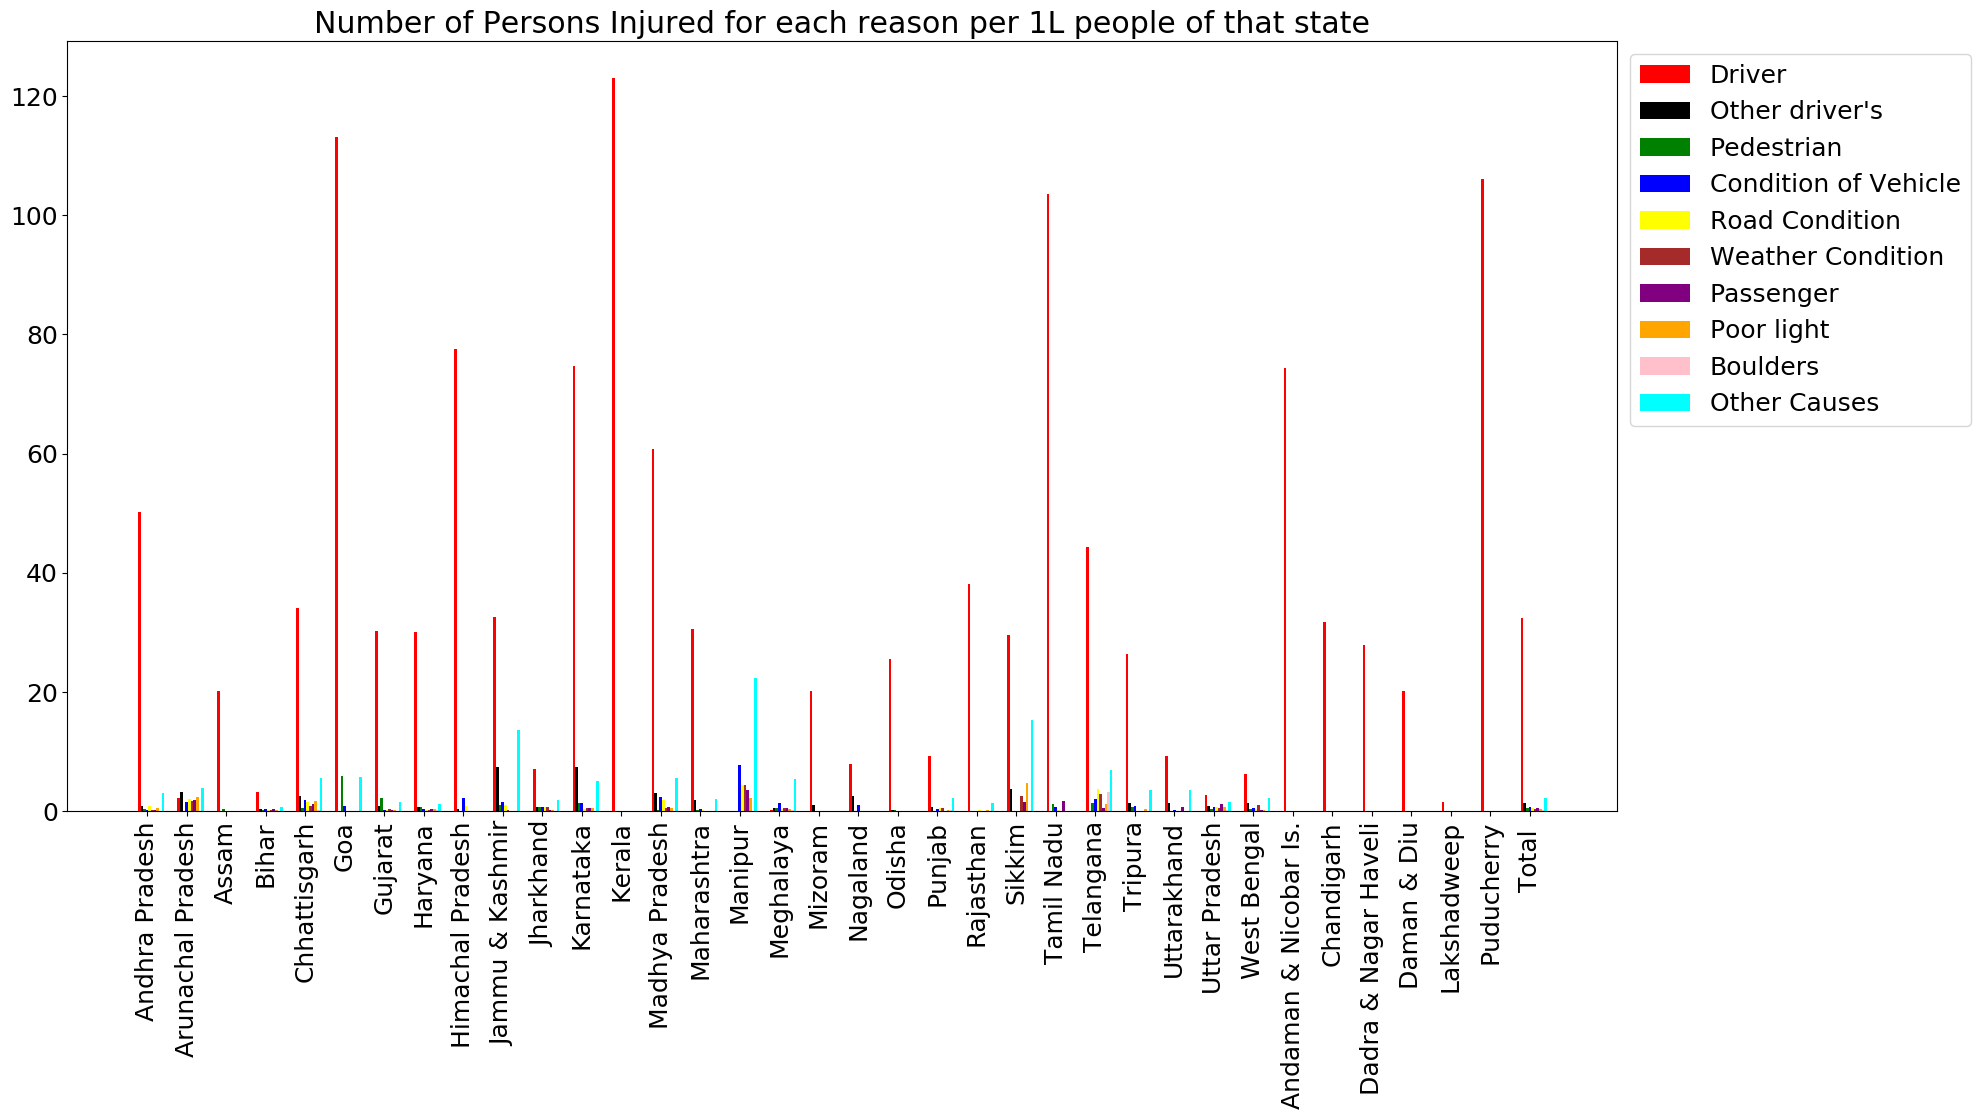

In [122]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df['Poor light-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of Persons Injured for each reason per 1L people of that state")
plt.show()

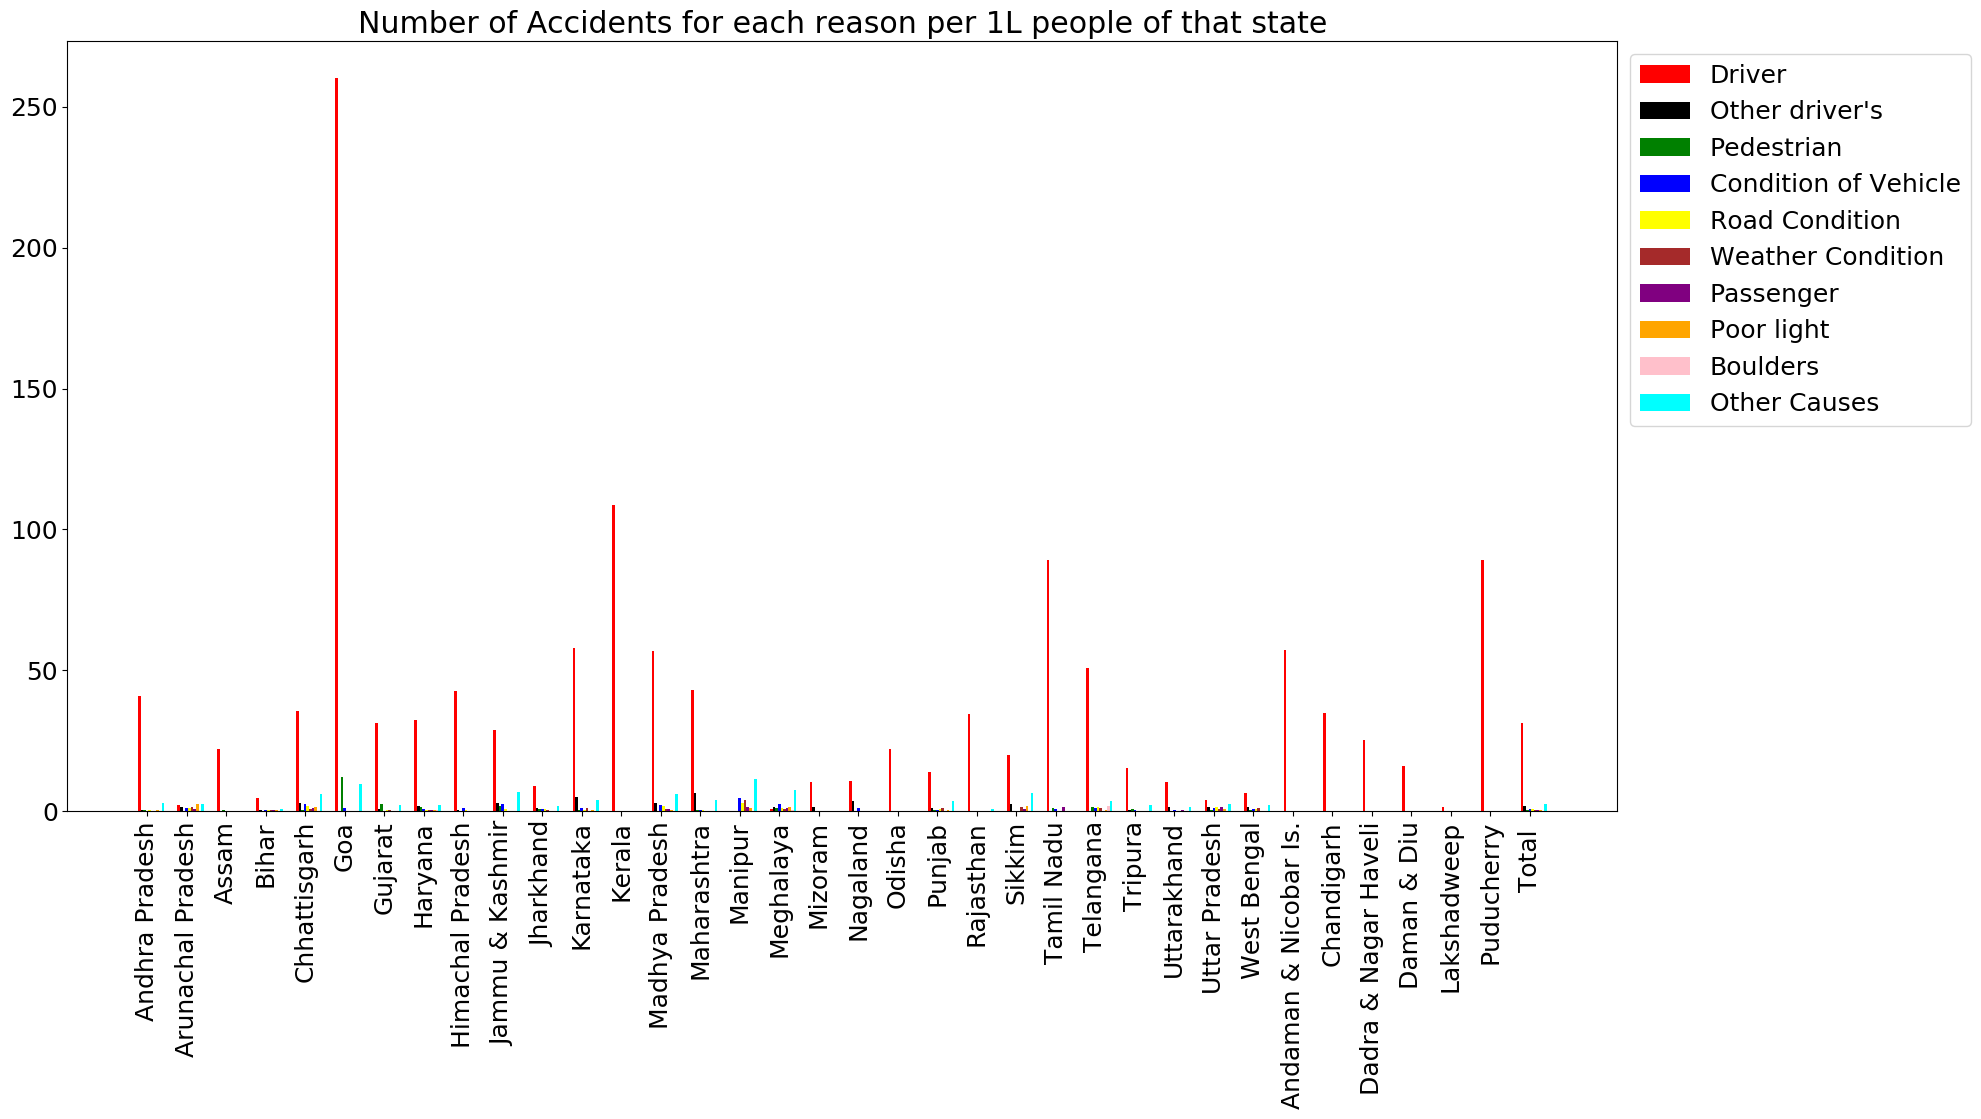

In [123]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of Accidents for each reason per 1L people of that state")
plt.show()

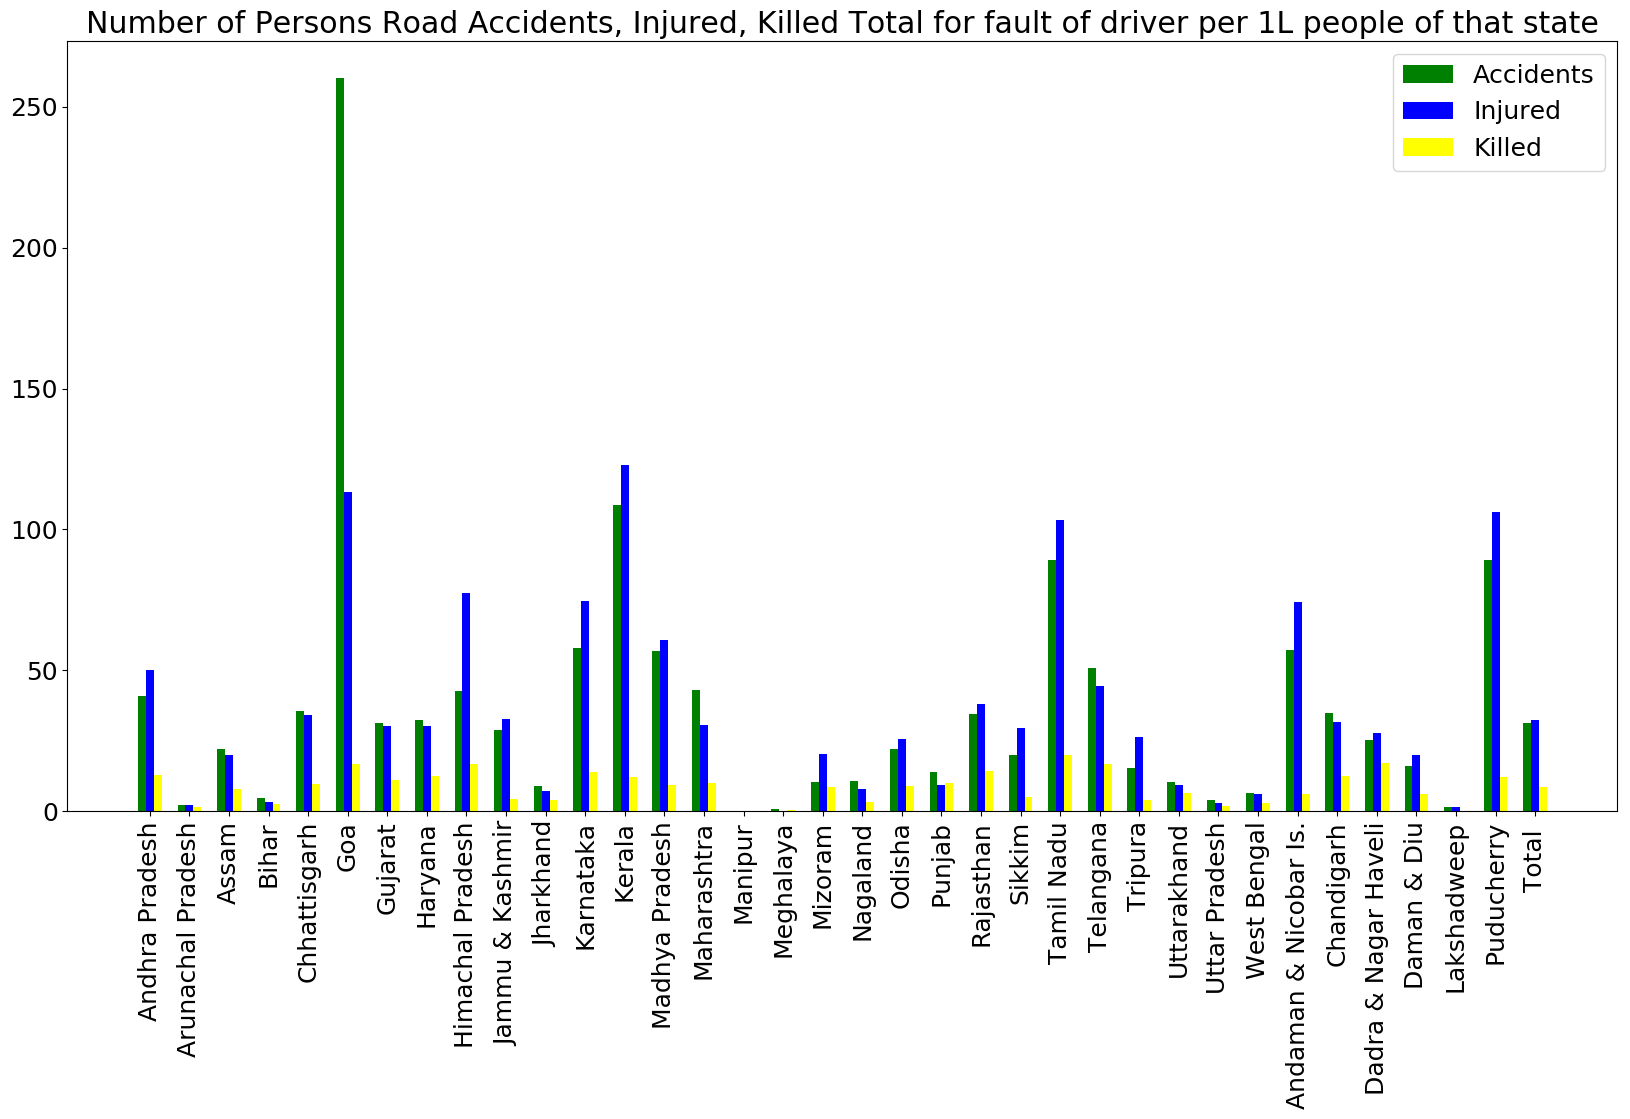

In [124]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.bar(UT-0.2,df['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for fault of driver per 1L people of that state")
plt.show()


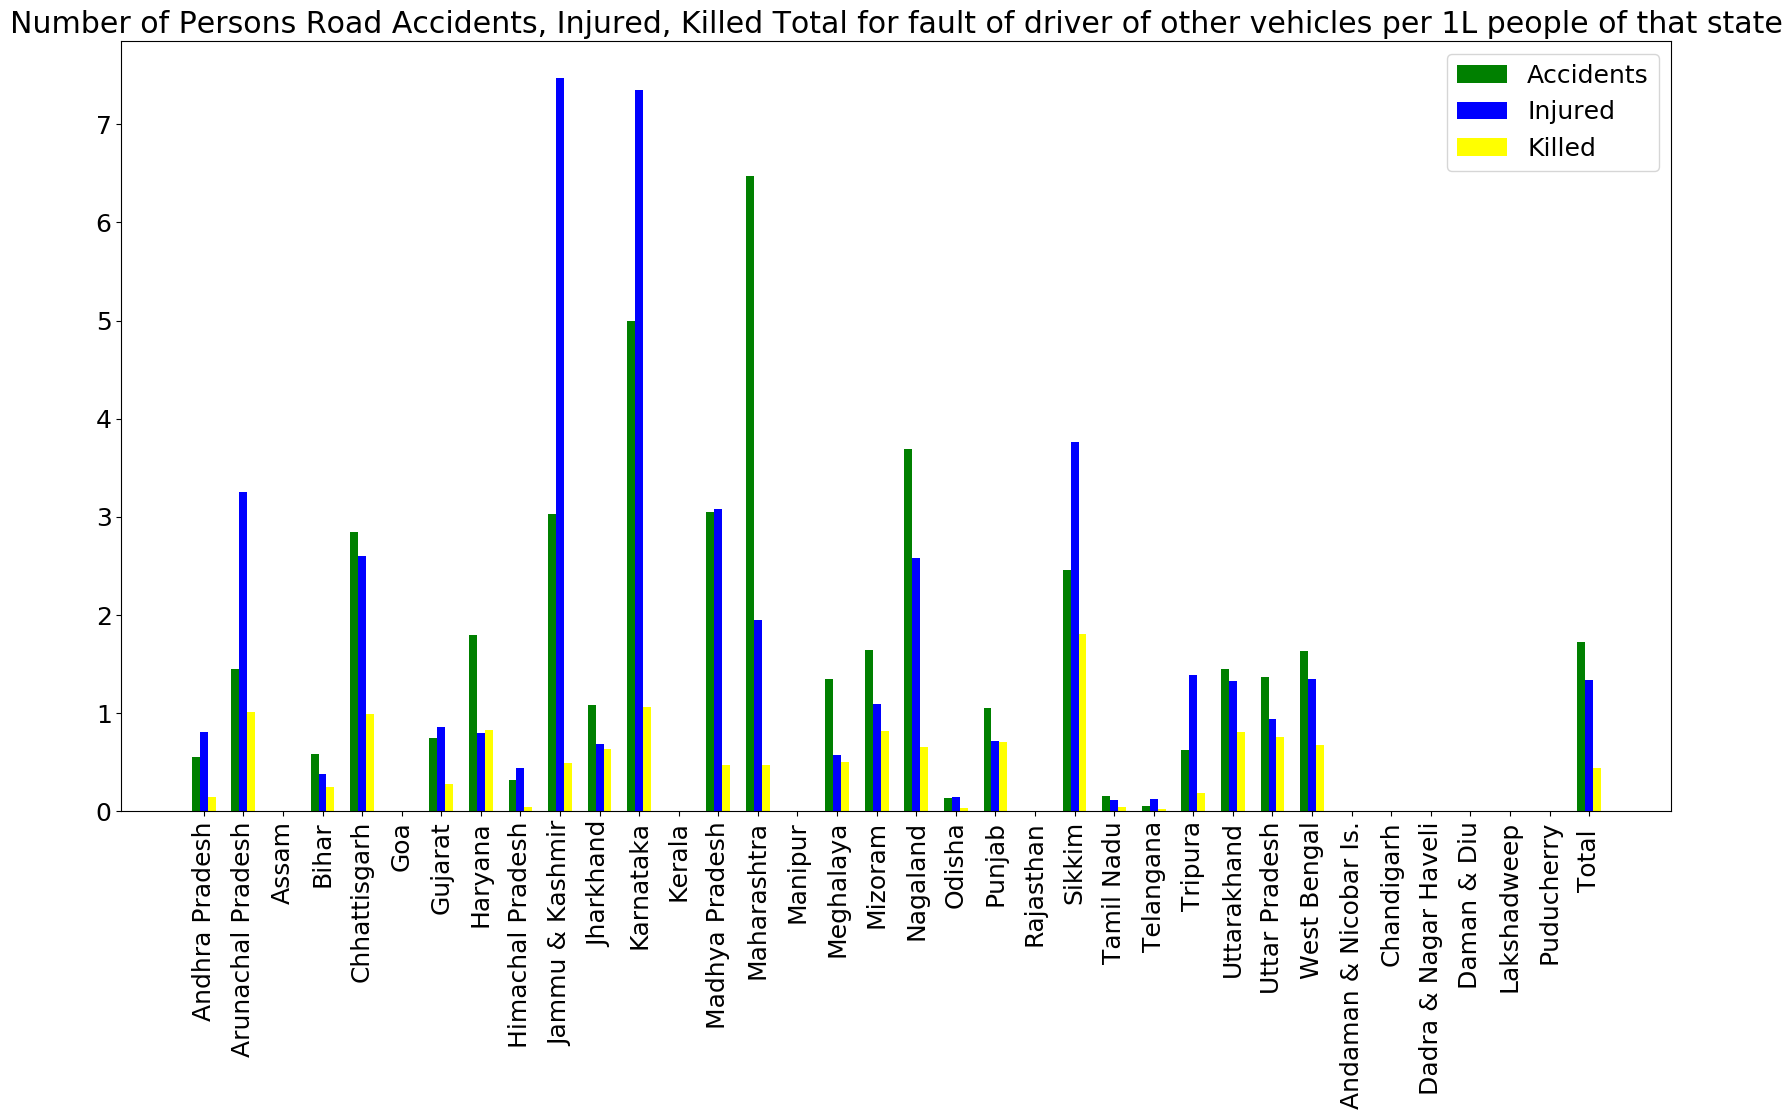

In [125]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for fault of driver of other vehicles per 1L people of that state")
plt.show()

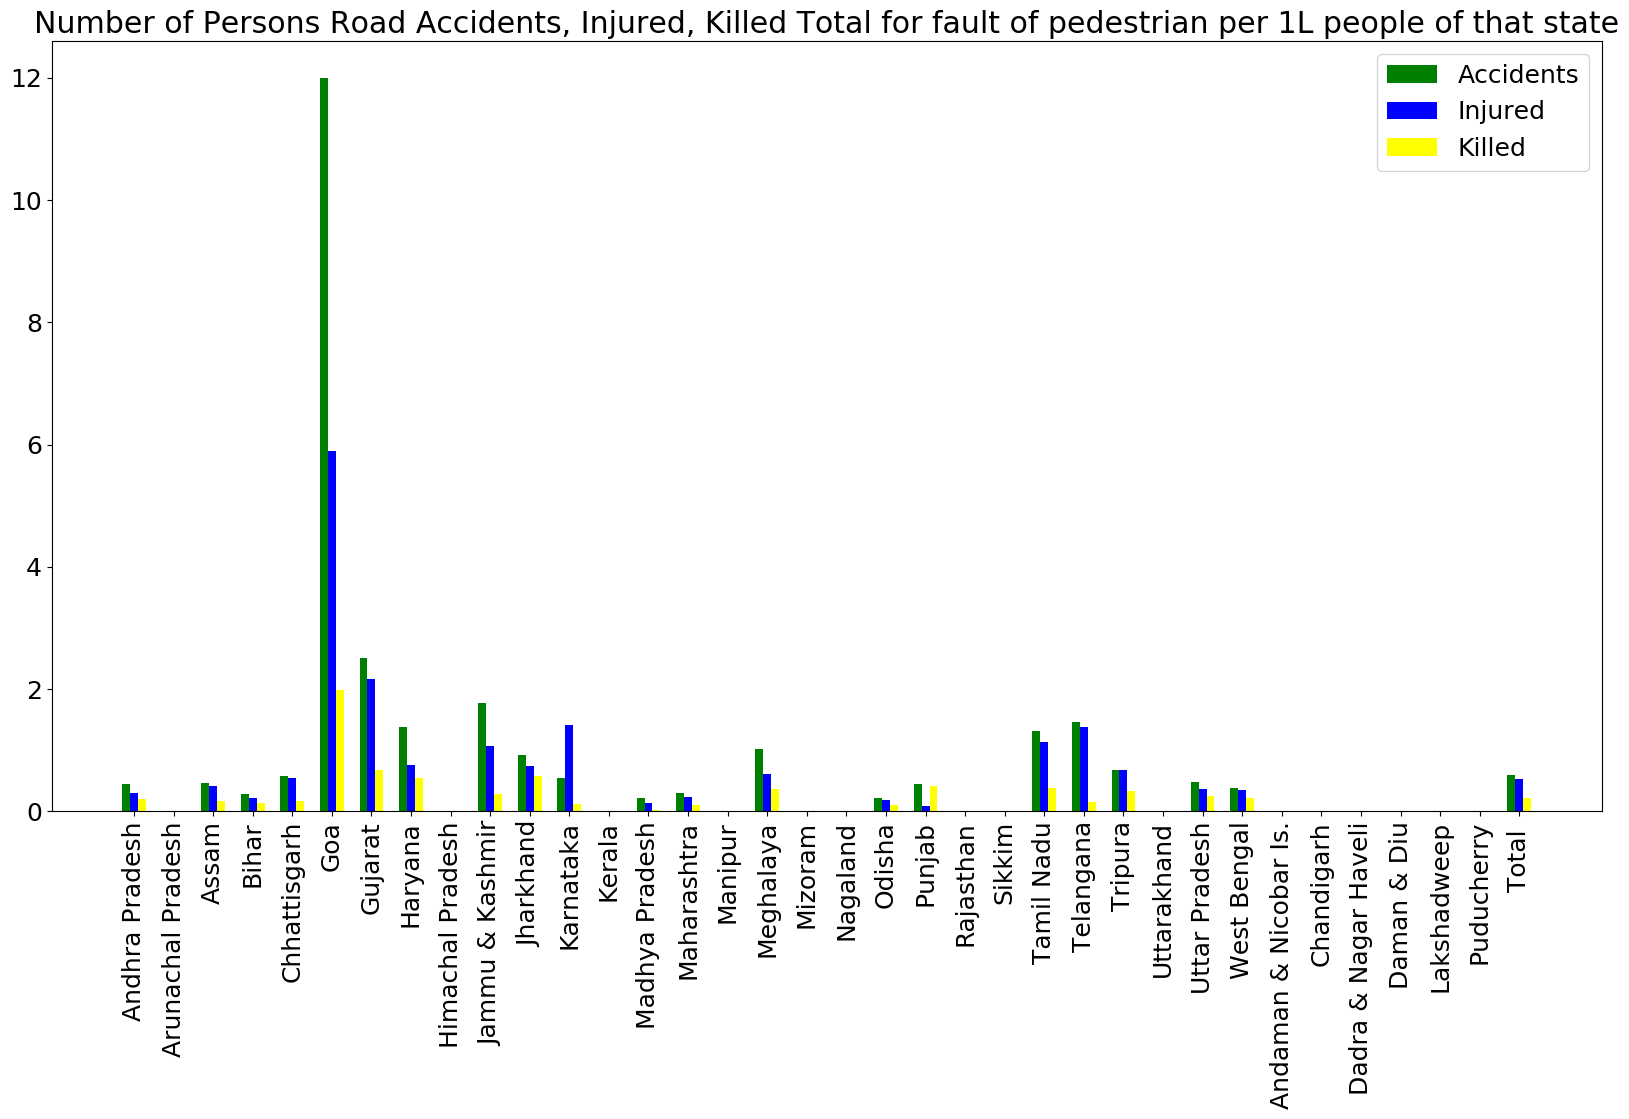

In [126]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for fault of pedestrian per 1L people of that state")
plt.show()

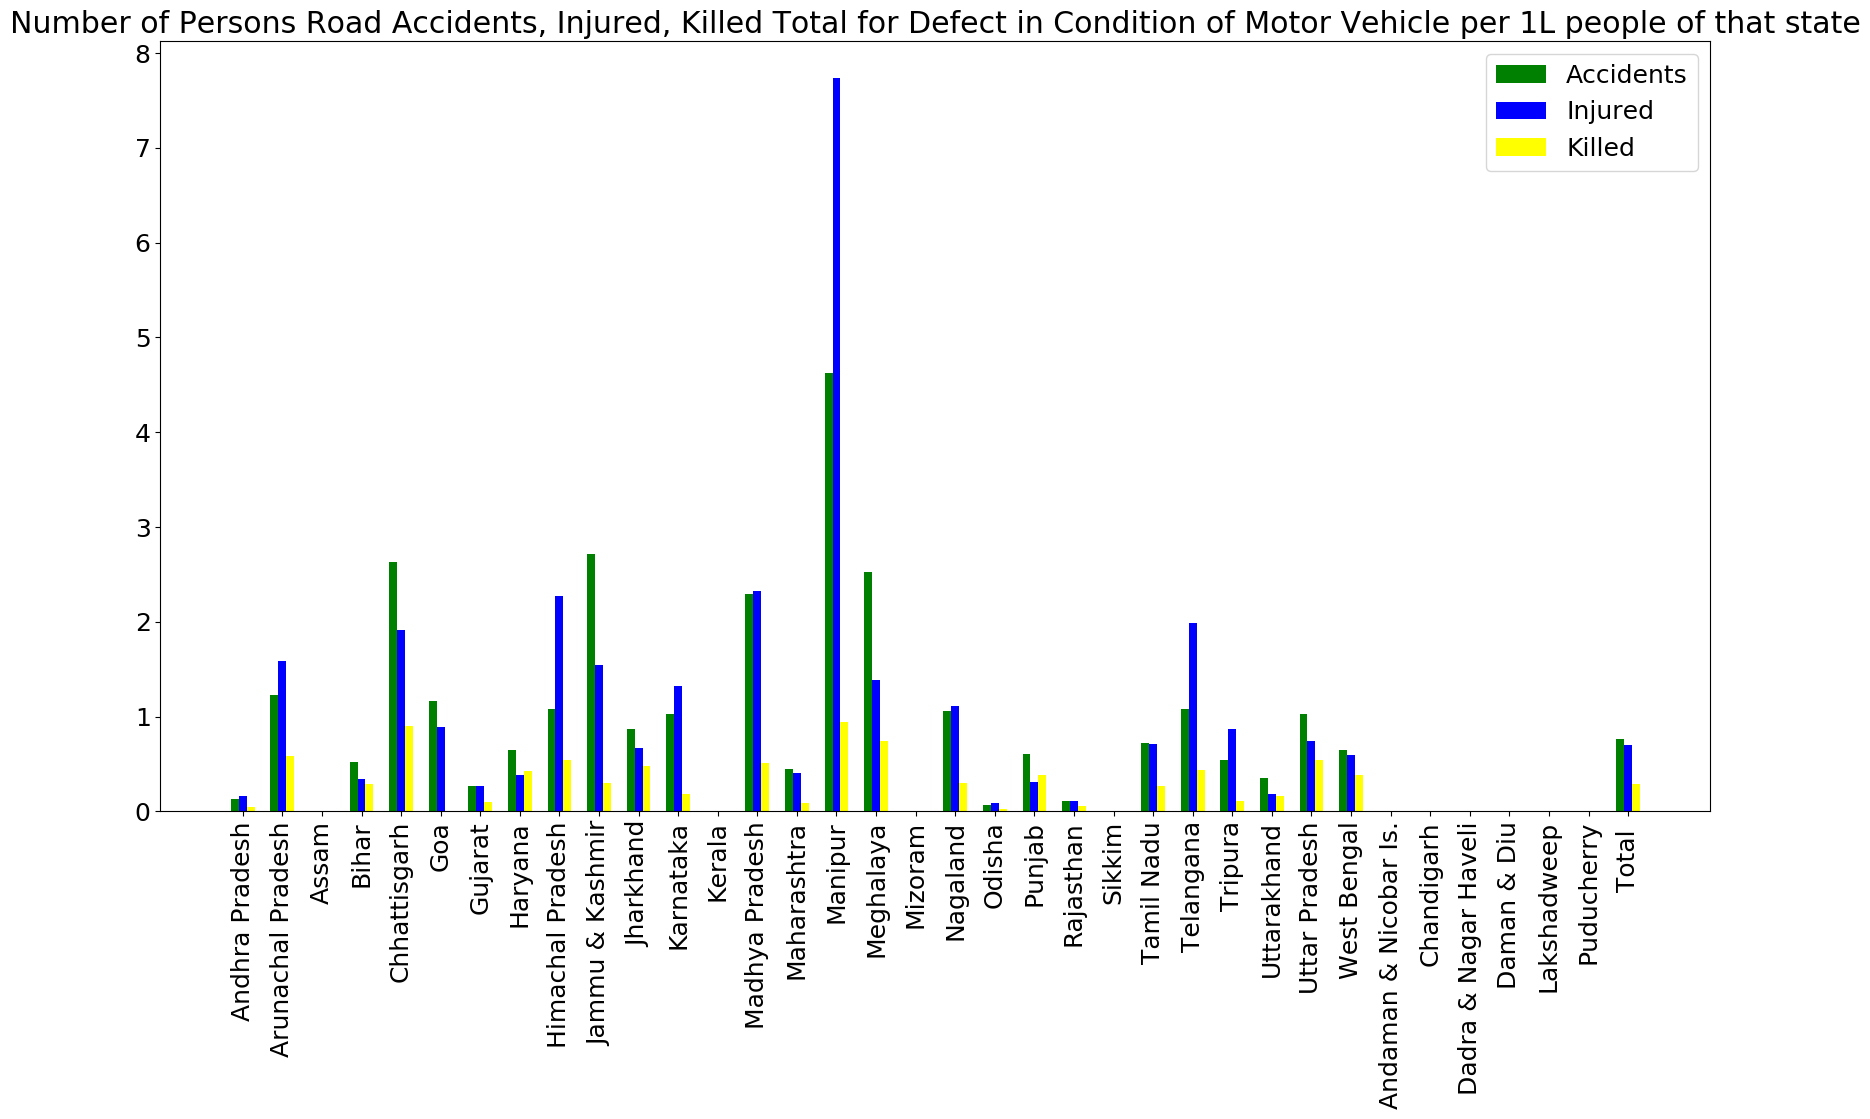

In [127]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Defect in Condition of Motor Vehicle per 1L people of that state")
plt.show()

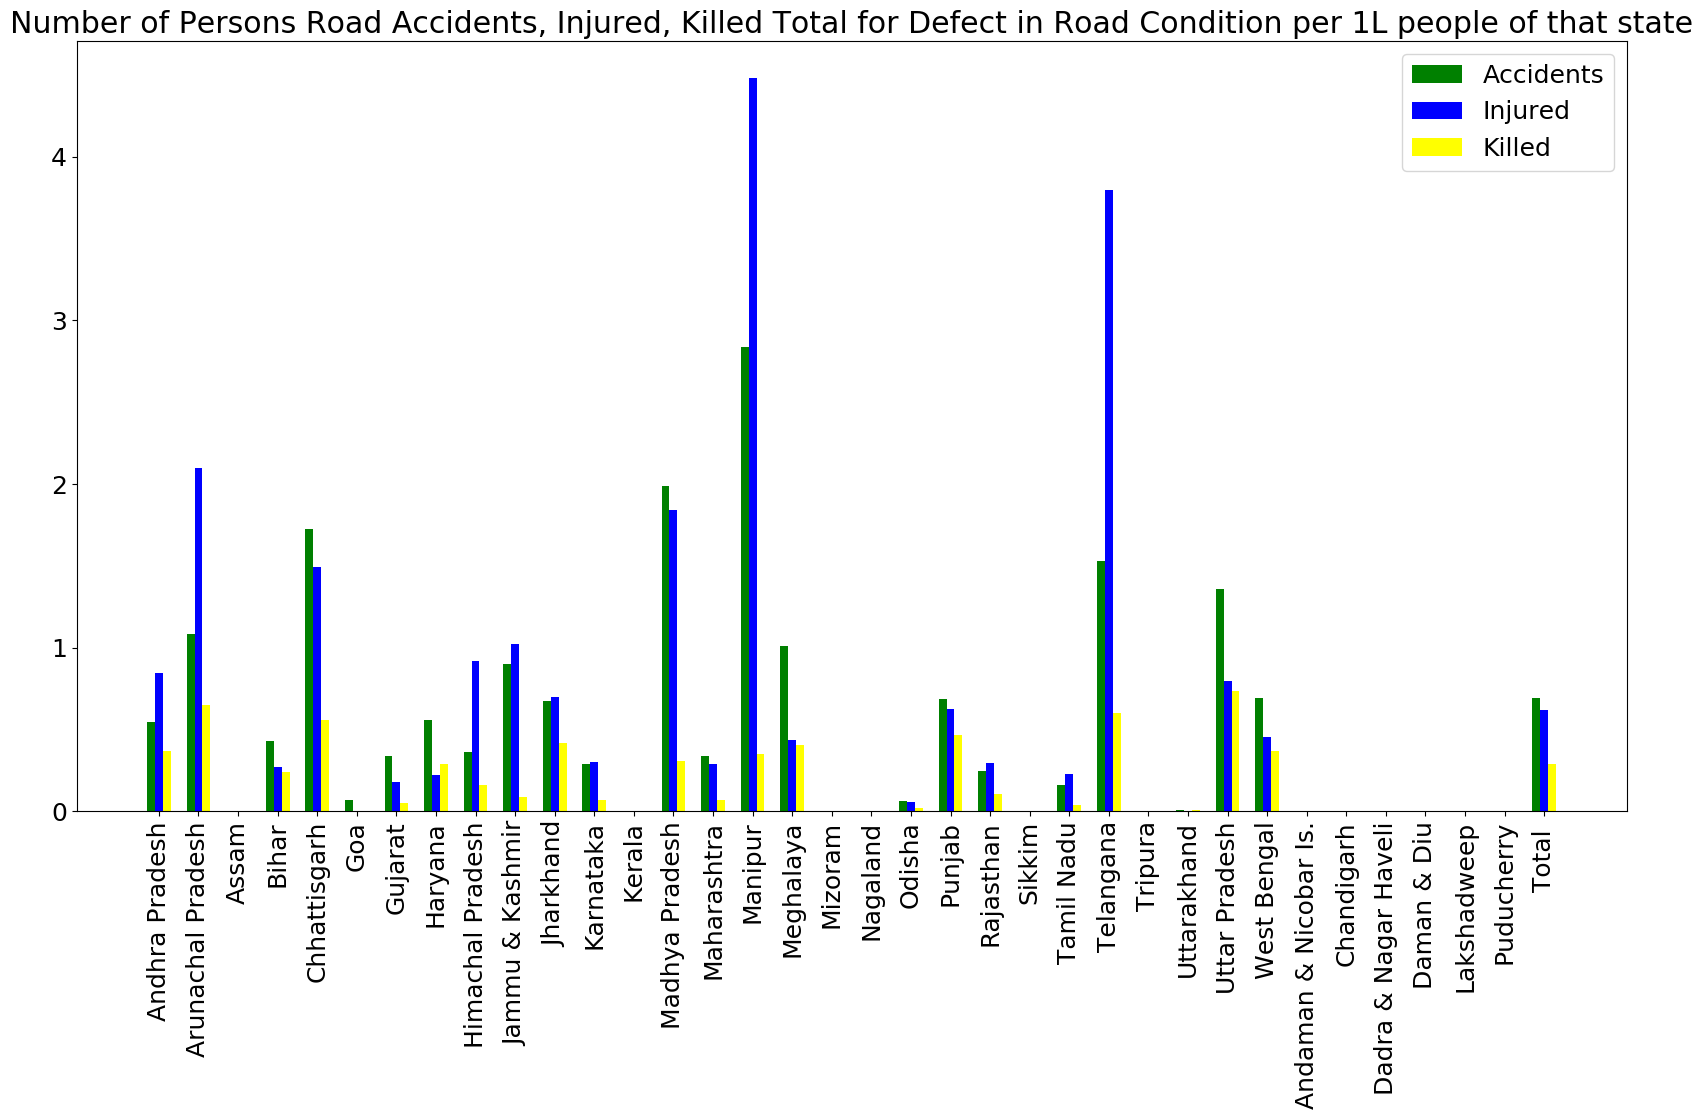

In [128]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Defect in Road Condition per 1L people of that state")
plt.show()


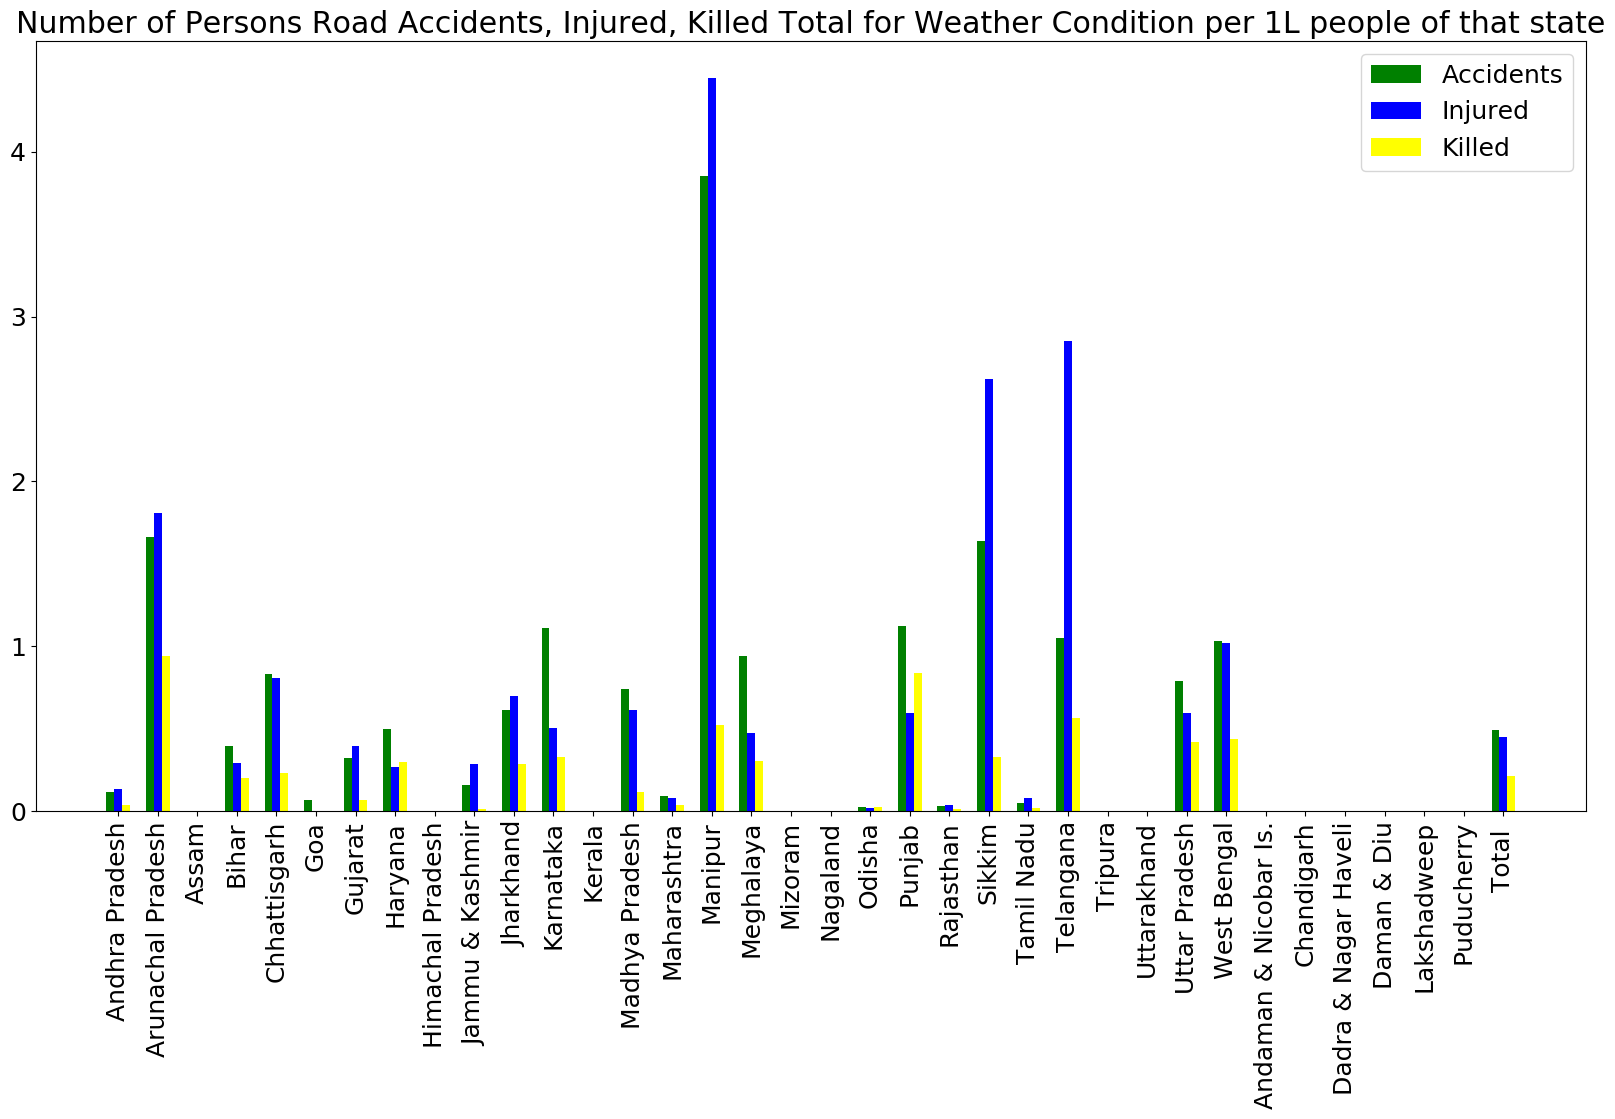

In [129]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Weather Condition per 1L people of that state")
plt.show()

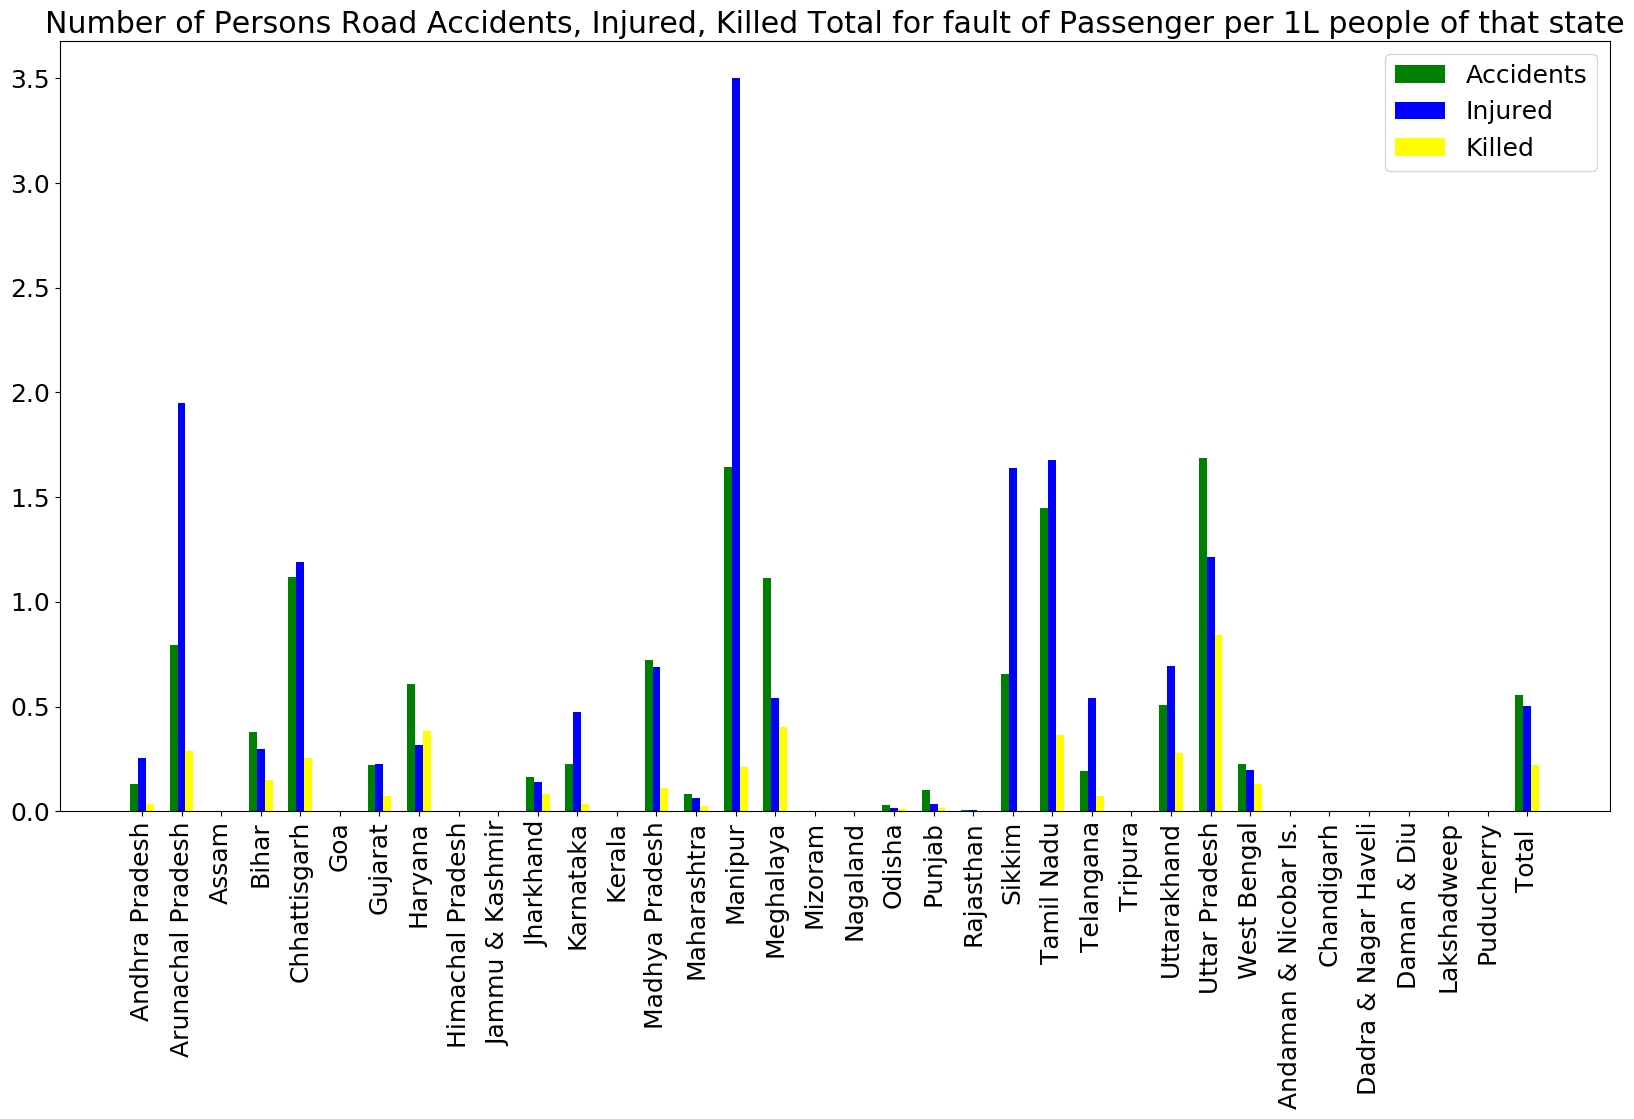

In [130]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for fault of Passenger per 1L people of that state")
plt.show()

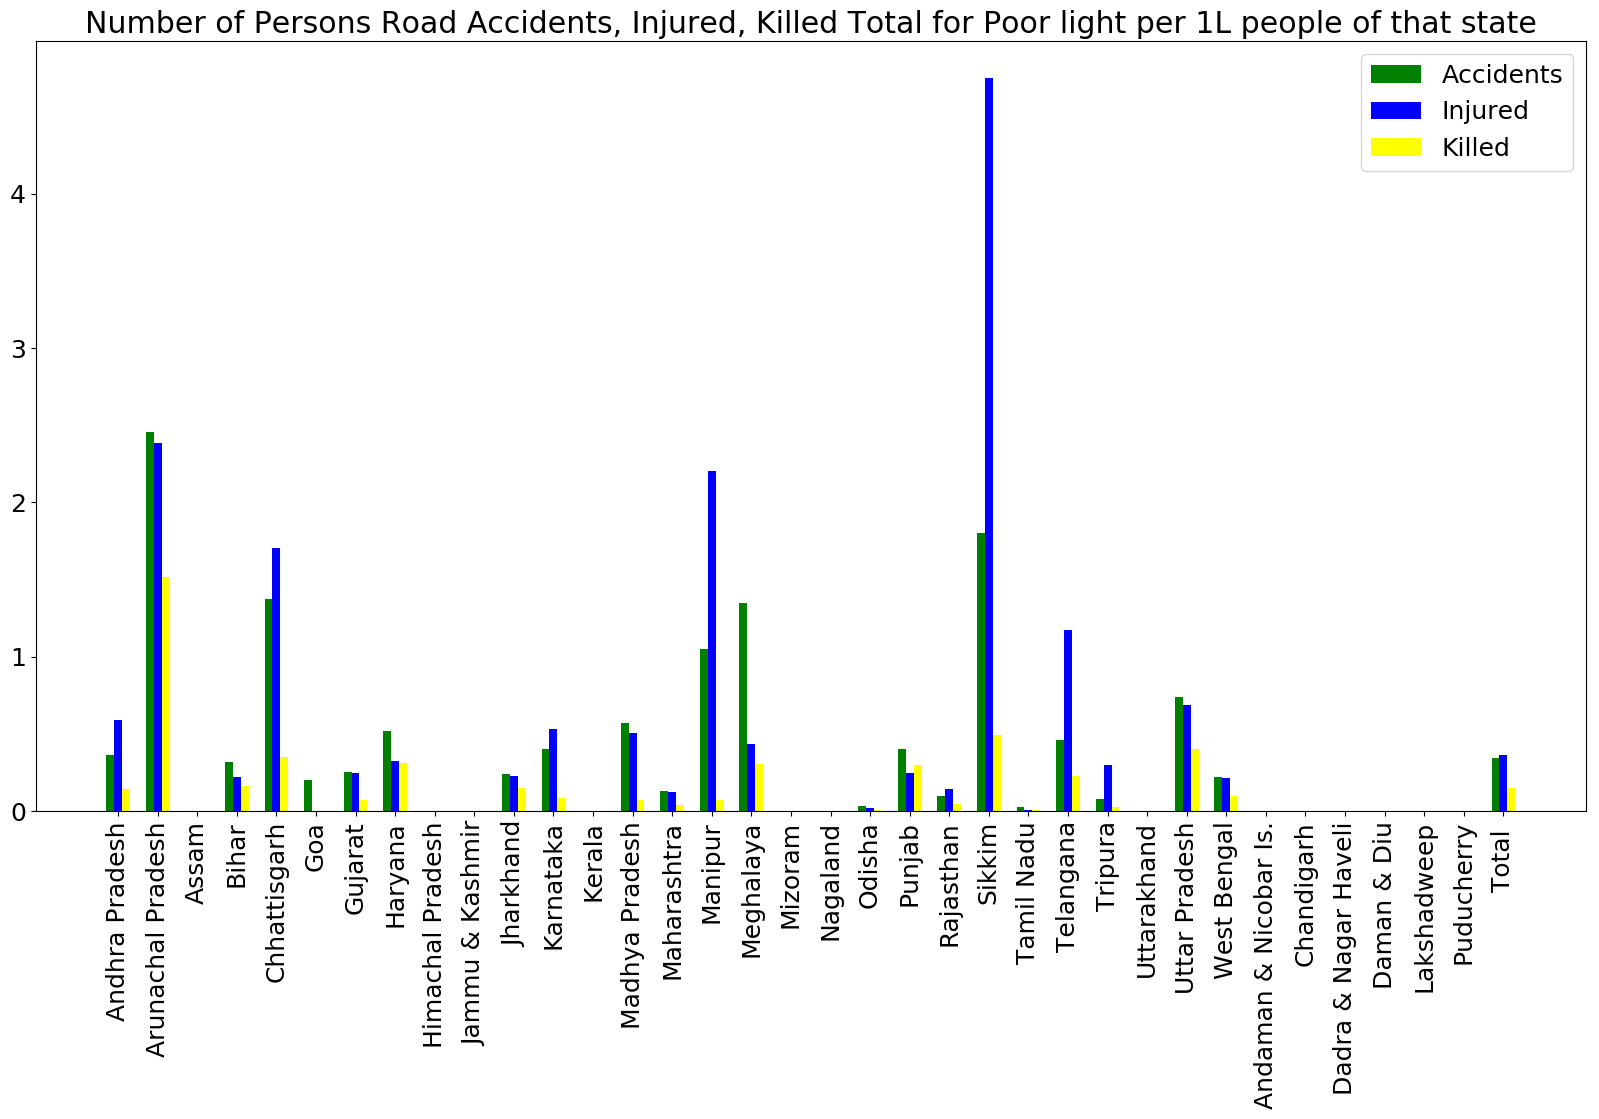

In [131]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Poor light-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Poor light-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Poor light per 1L people of that state")
plt.show()

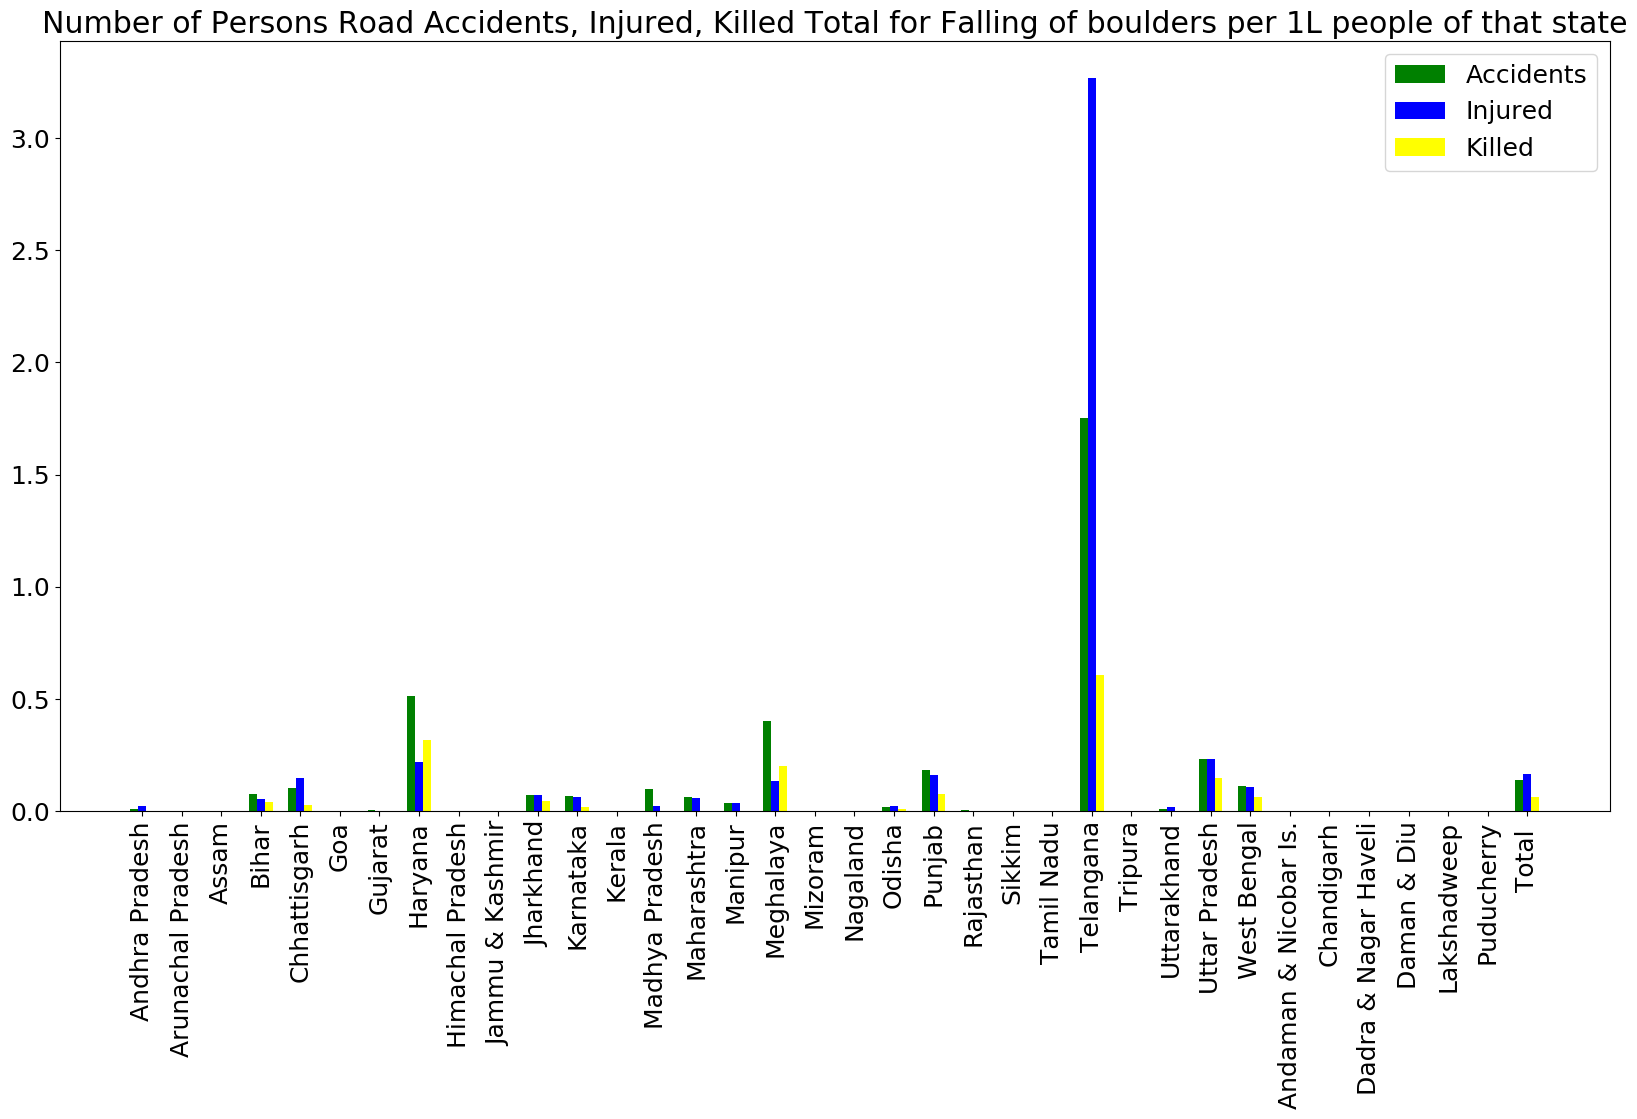

In [132]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Falling of boulders per 1L people of that state")
plt.show()

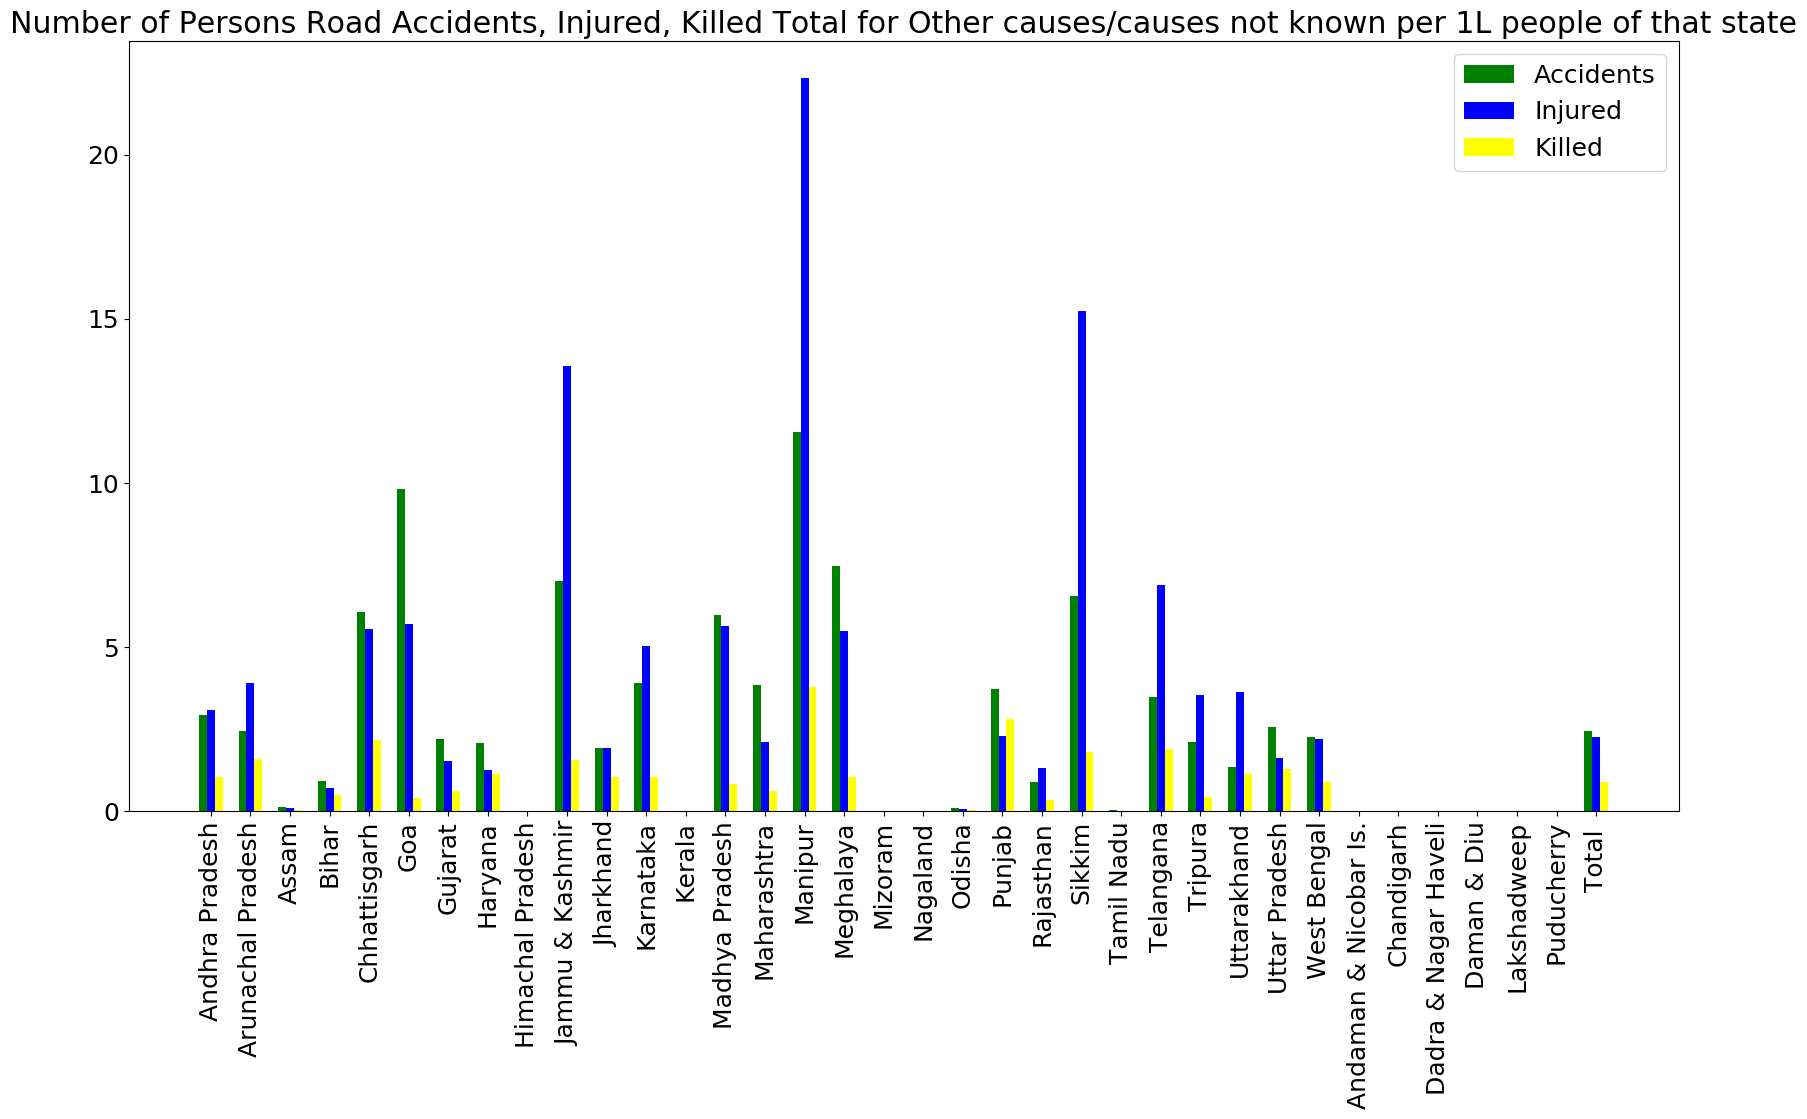

In [133]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Road Accidents, Injured, Killed Total for Other causes/causes not known per 1L people of that state")
plt.show()


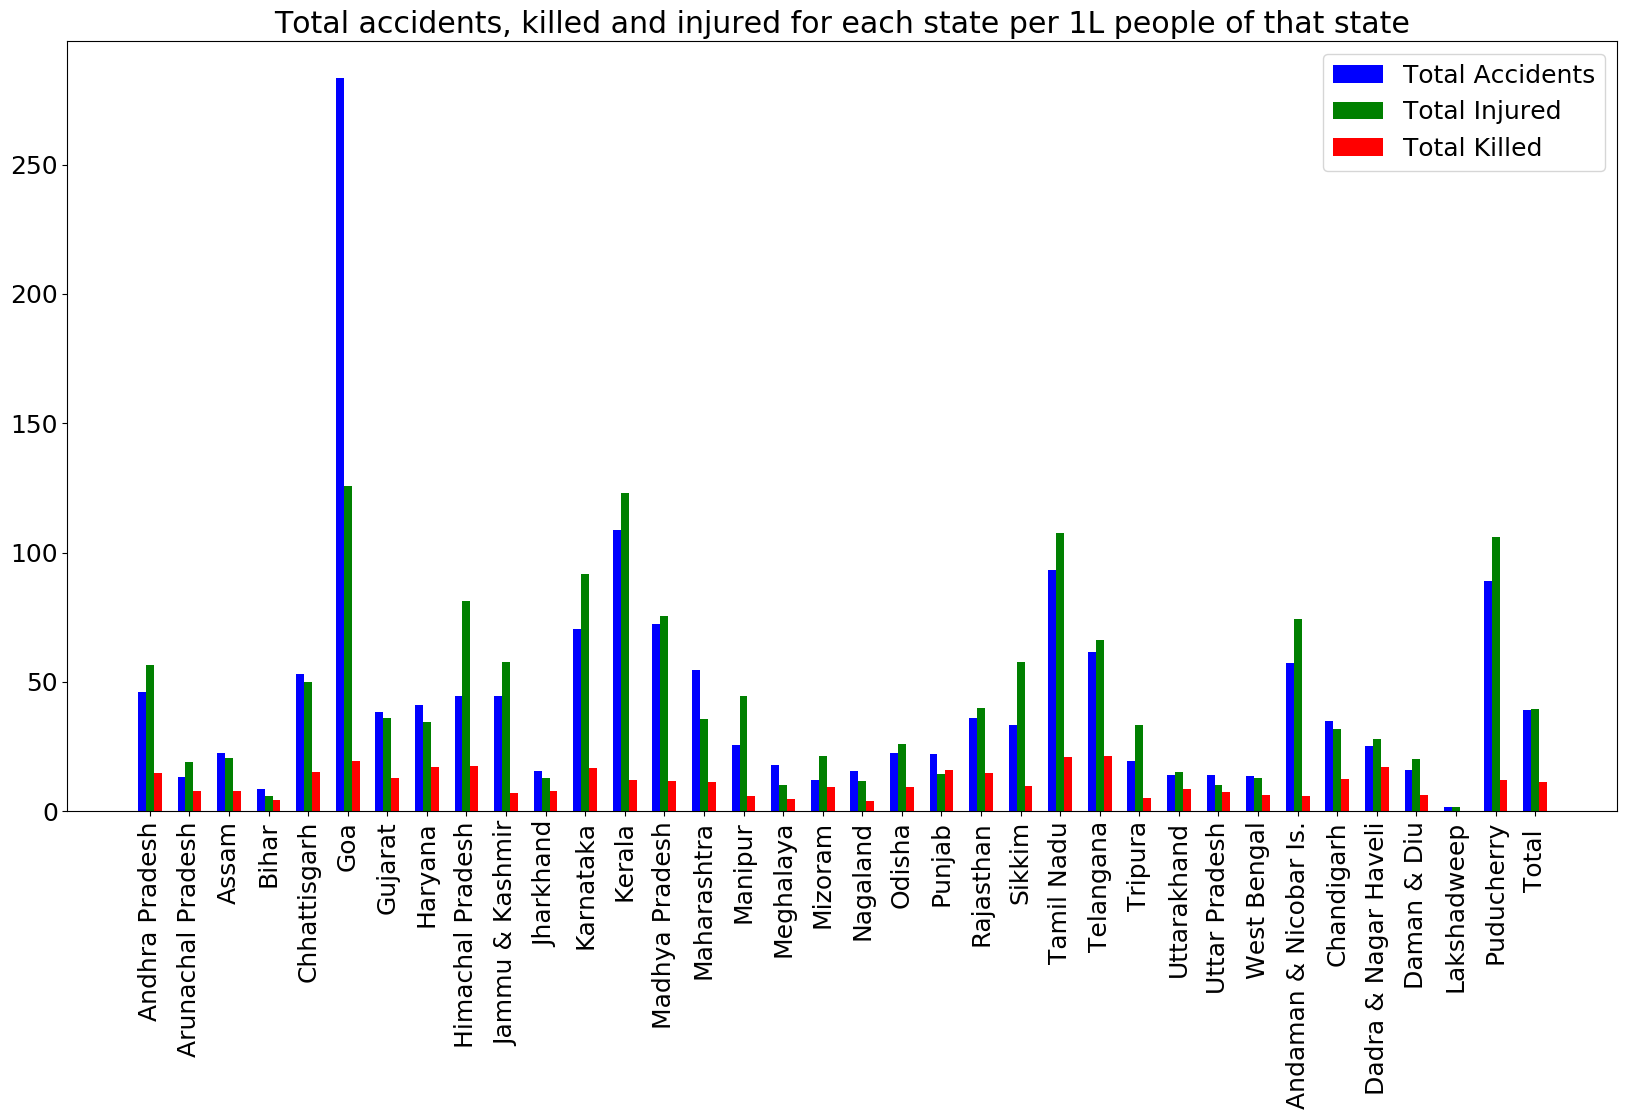

In [134]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
df['Sum Total Road Accidents - 2014 per 1L people']=df['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']+df['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']+df['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']+\
    df['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']+df['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']+df['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']+\
    df['Poor light-Total No. of Road Accidents - 2014 per 1L people']+df['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']+df['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']+\
    df['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']

df['Sum Total Number of Persons Killed - 2014 per 1L people']=df['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']+df['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']+df['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']+\
    df['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']+df['Weather Condition-Number of Persons-Killed - 2014 per 1L people']+df['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']+\
    df['Poor light-Number of Persons-Killed - 2014 per 1L people']+df['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']+df['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']+\
    df['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']

df['Sum Total Number of Persons Injured - 2014 per 1L people']=df['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']+df['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']+df['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']+\
    df['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']+df['Weather Condition-Number of Persons-Injured - 2014 per 1L people']+df['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']+\
    df['Poor light-Number of Persons-Injured - 2014 per 1L people']+df['Falling of boulders-Number of Persons-Injured - 2014 per 1L people']+df['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']+\
    df['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']

plt.bar(UT-0.2,df['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT,df['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Injured')
plt.bar(UT+0.2,df['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Killed')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.title("Total accidents, killed and injured for each state per 1L people of that state")
plt.legend(loc="best")
plt.show()

In [135]:
df = pd.read_csv("/home/abhay/typeOfVehicle.csv",index_col=0)
df.dropna(axis=0,how='any',inplace=True)

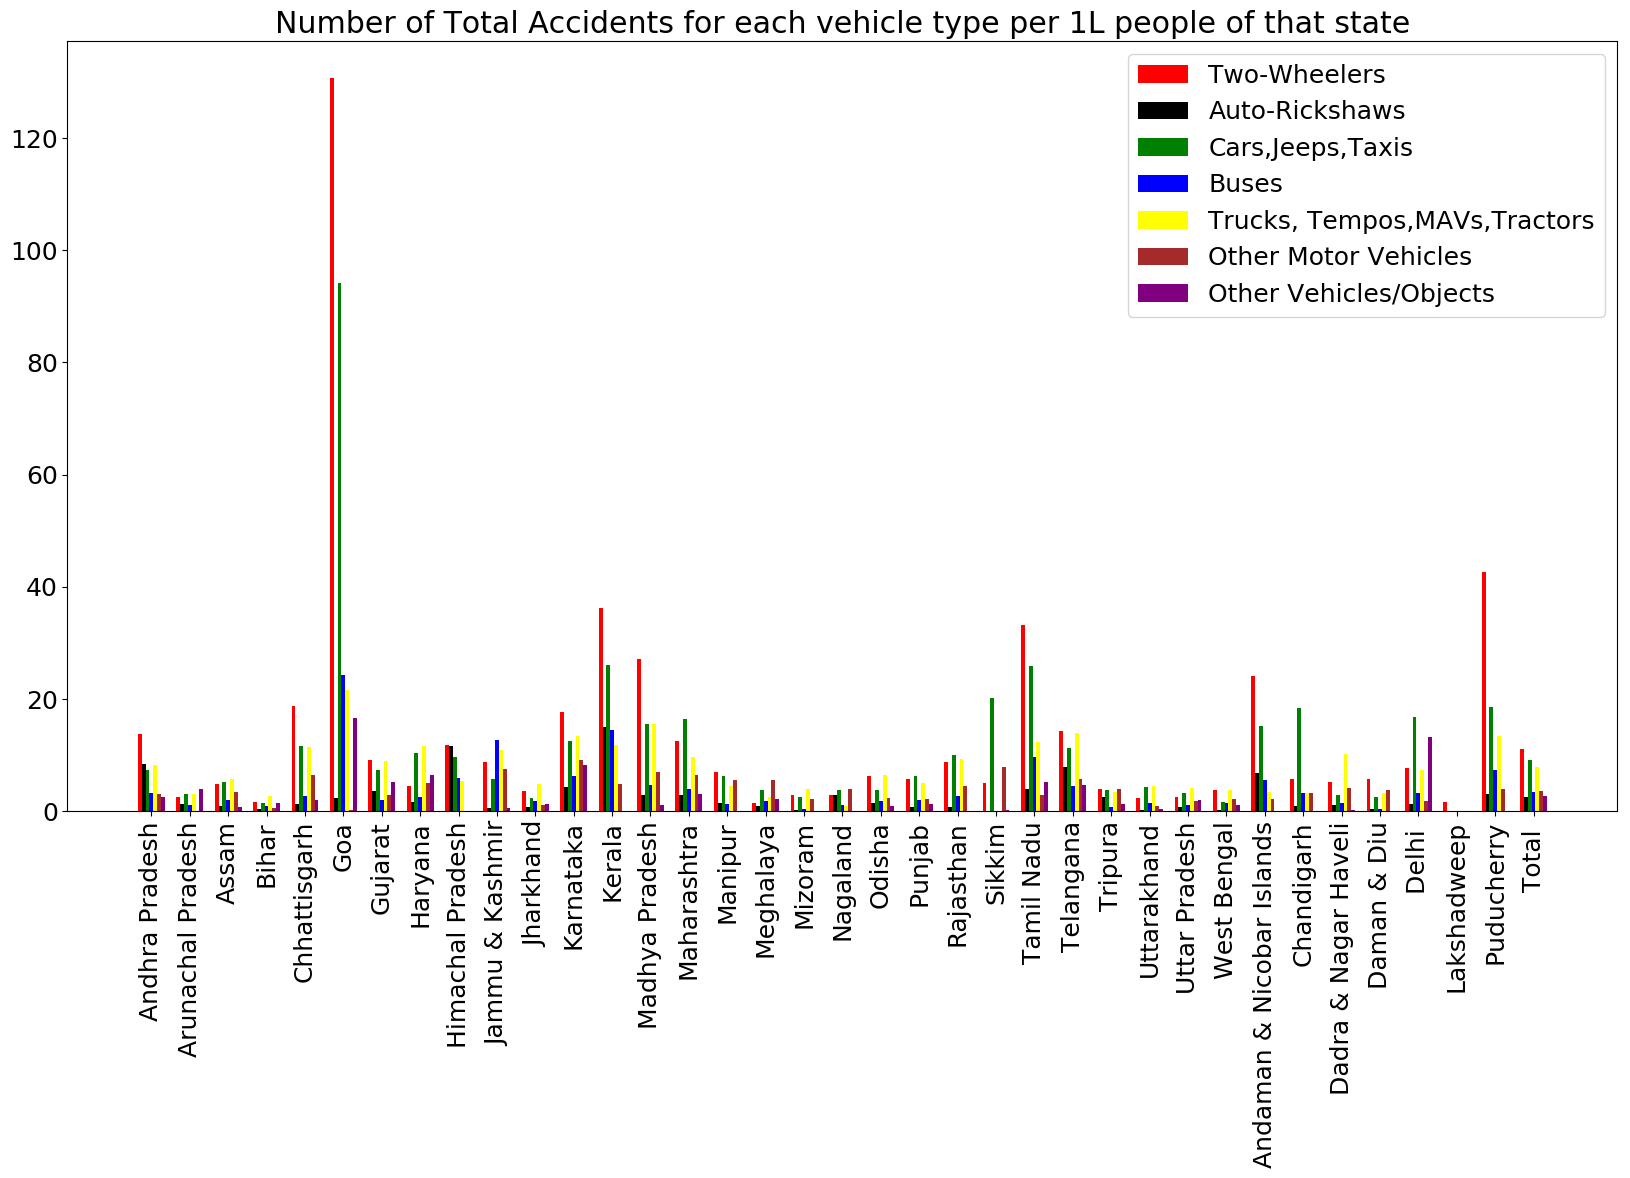

In [136]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*2
plt.bar(UT-0.6,df['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Total Accidents for each vehicle type per 1L people of that state")
plt.show()


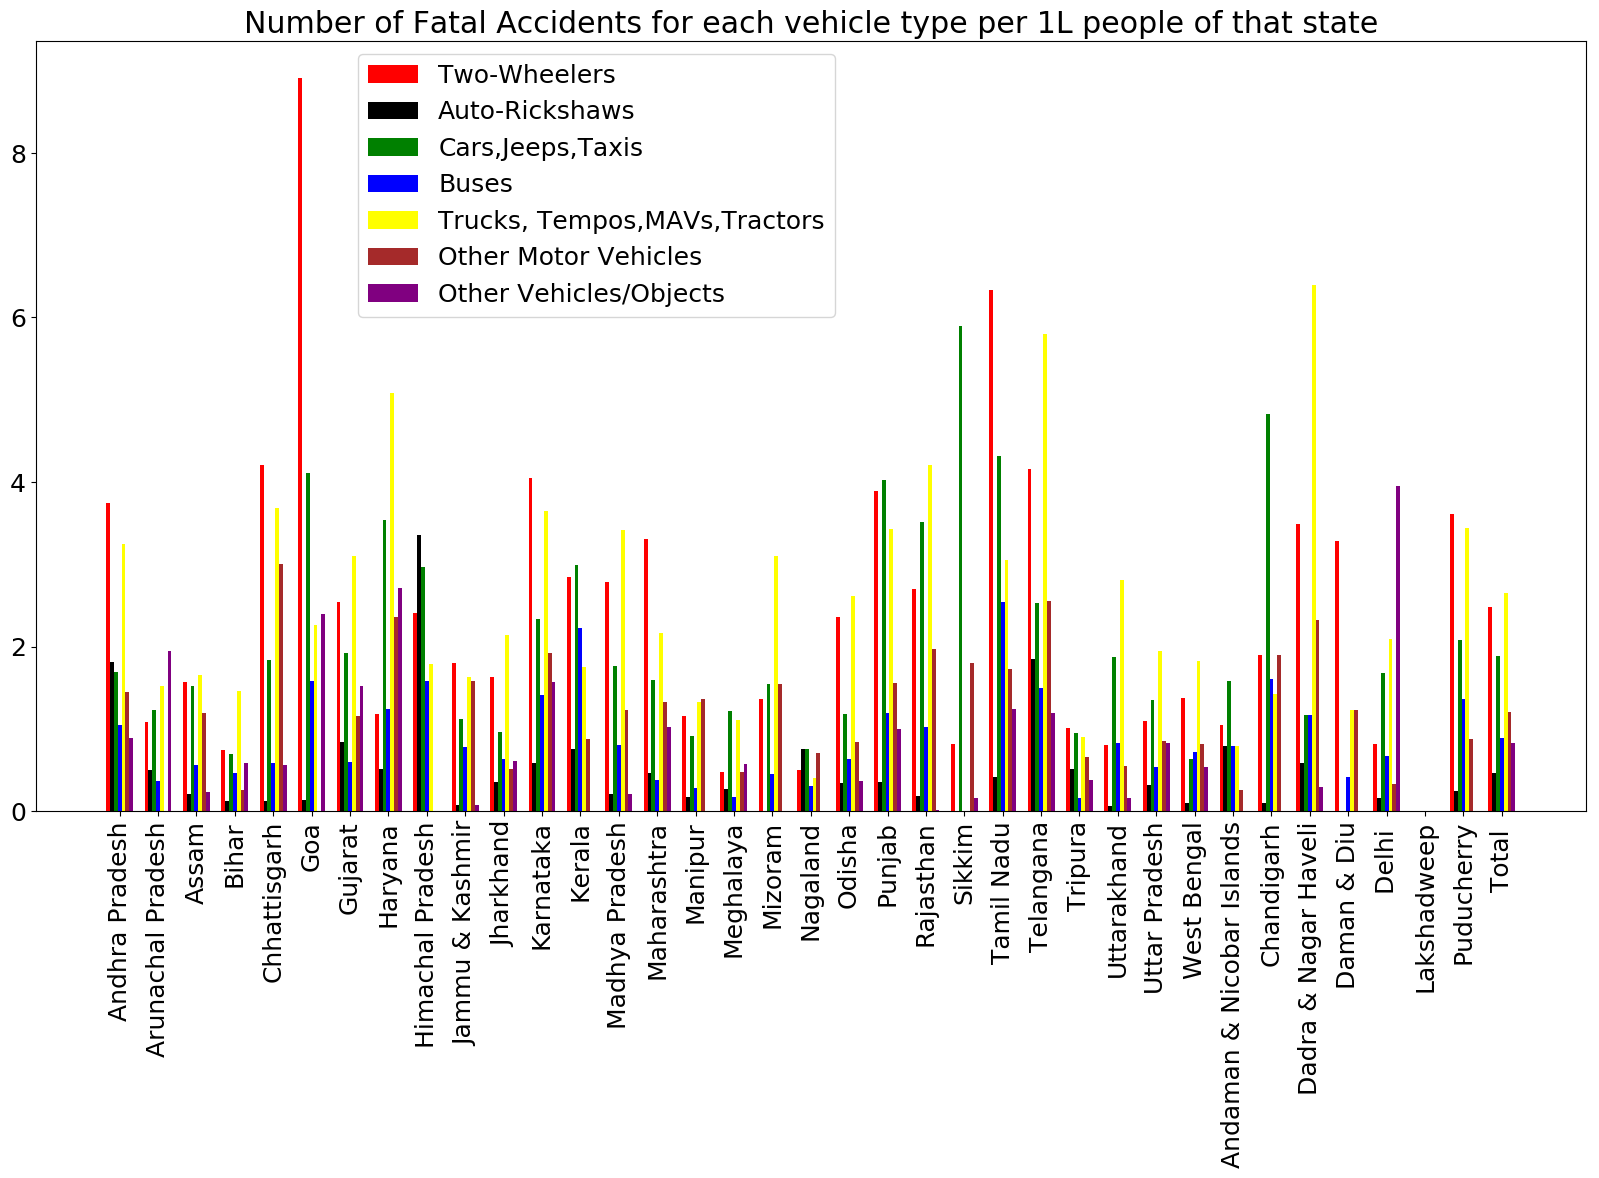

In [137]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df['Buses - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.2,1))
plt.title("Number of Fatal Accidents for each vehicle type per 1L people of that state")
plt.show()


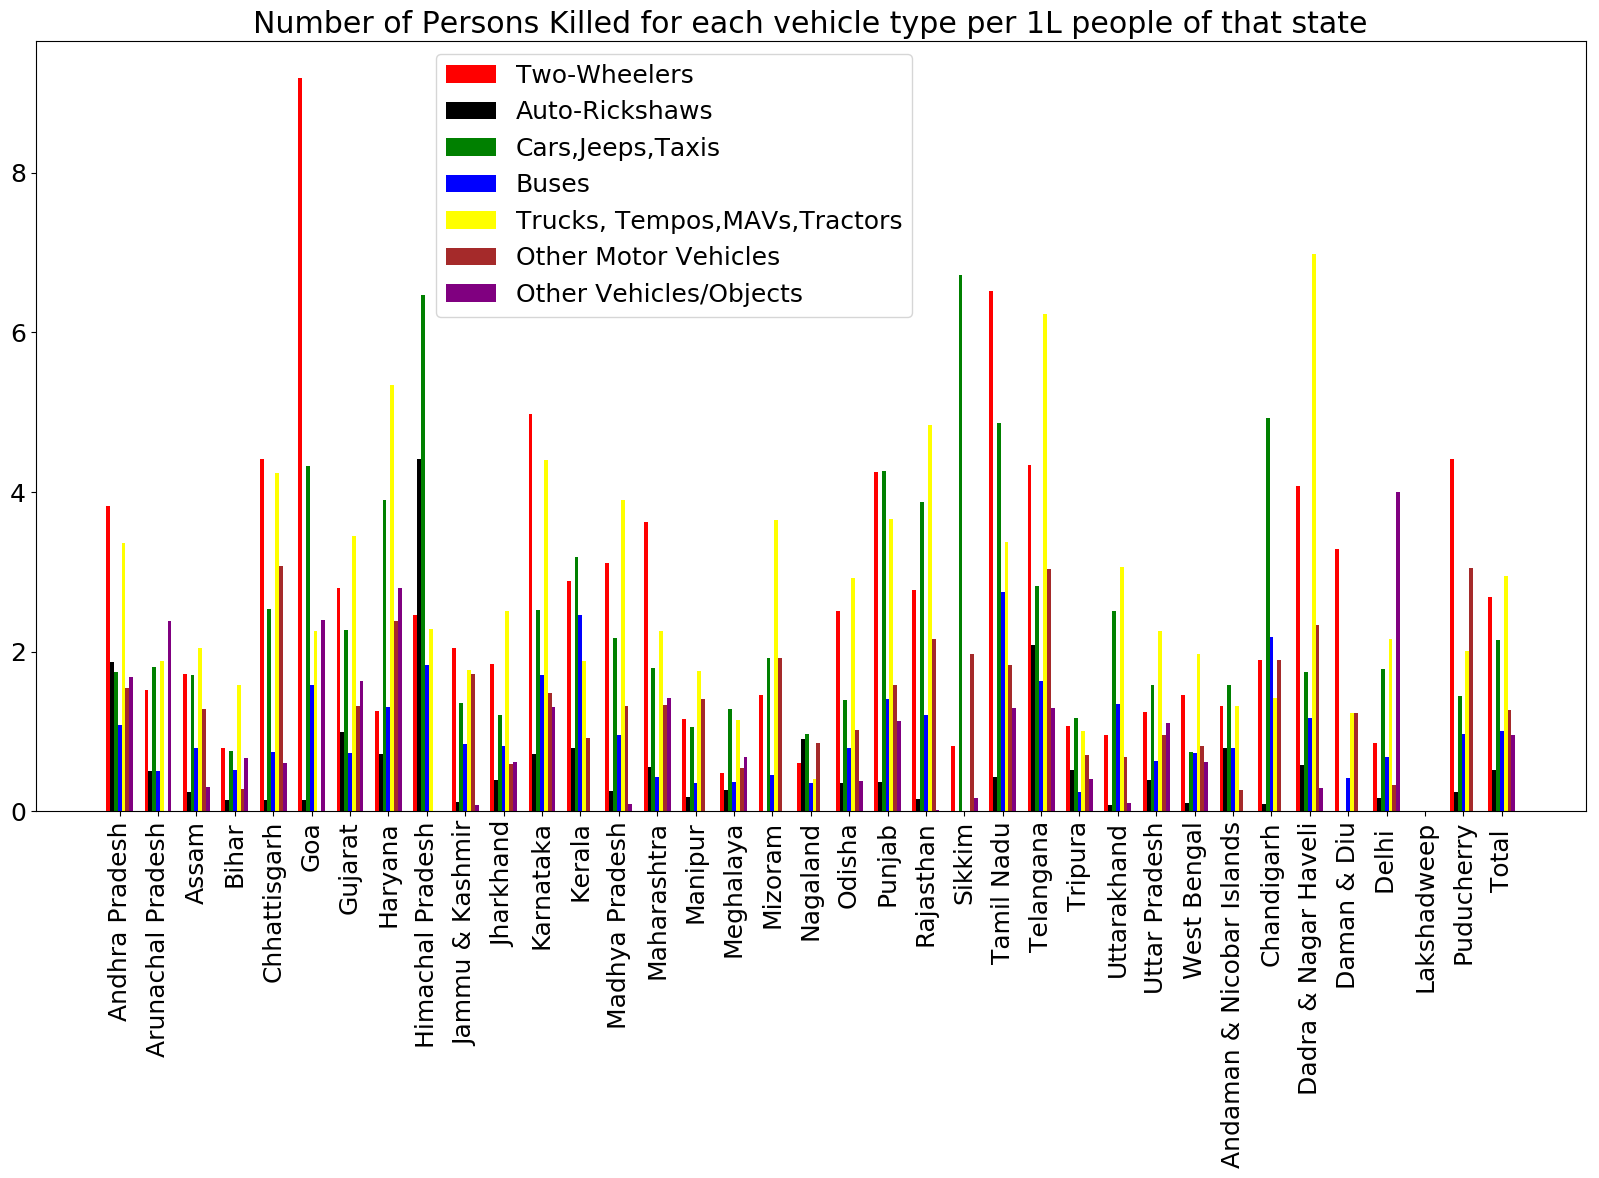

In [138]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.25,1))
plt.title("Number of Persons Killed for each vehicle type per 1L people of that state")
plt.show()

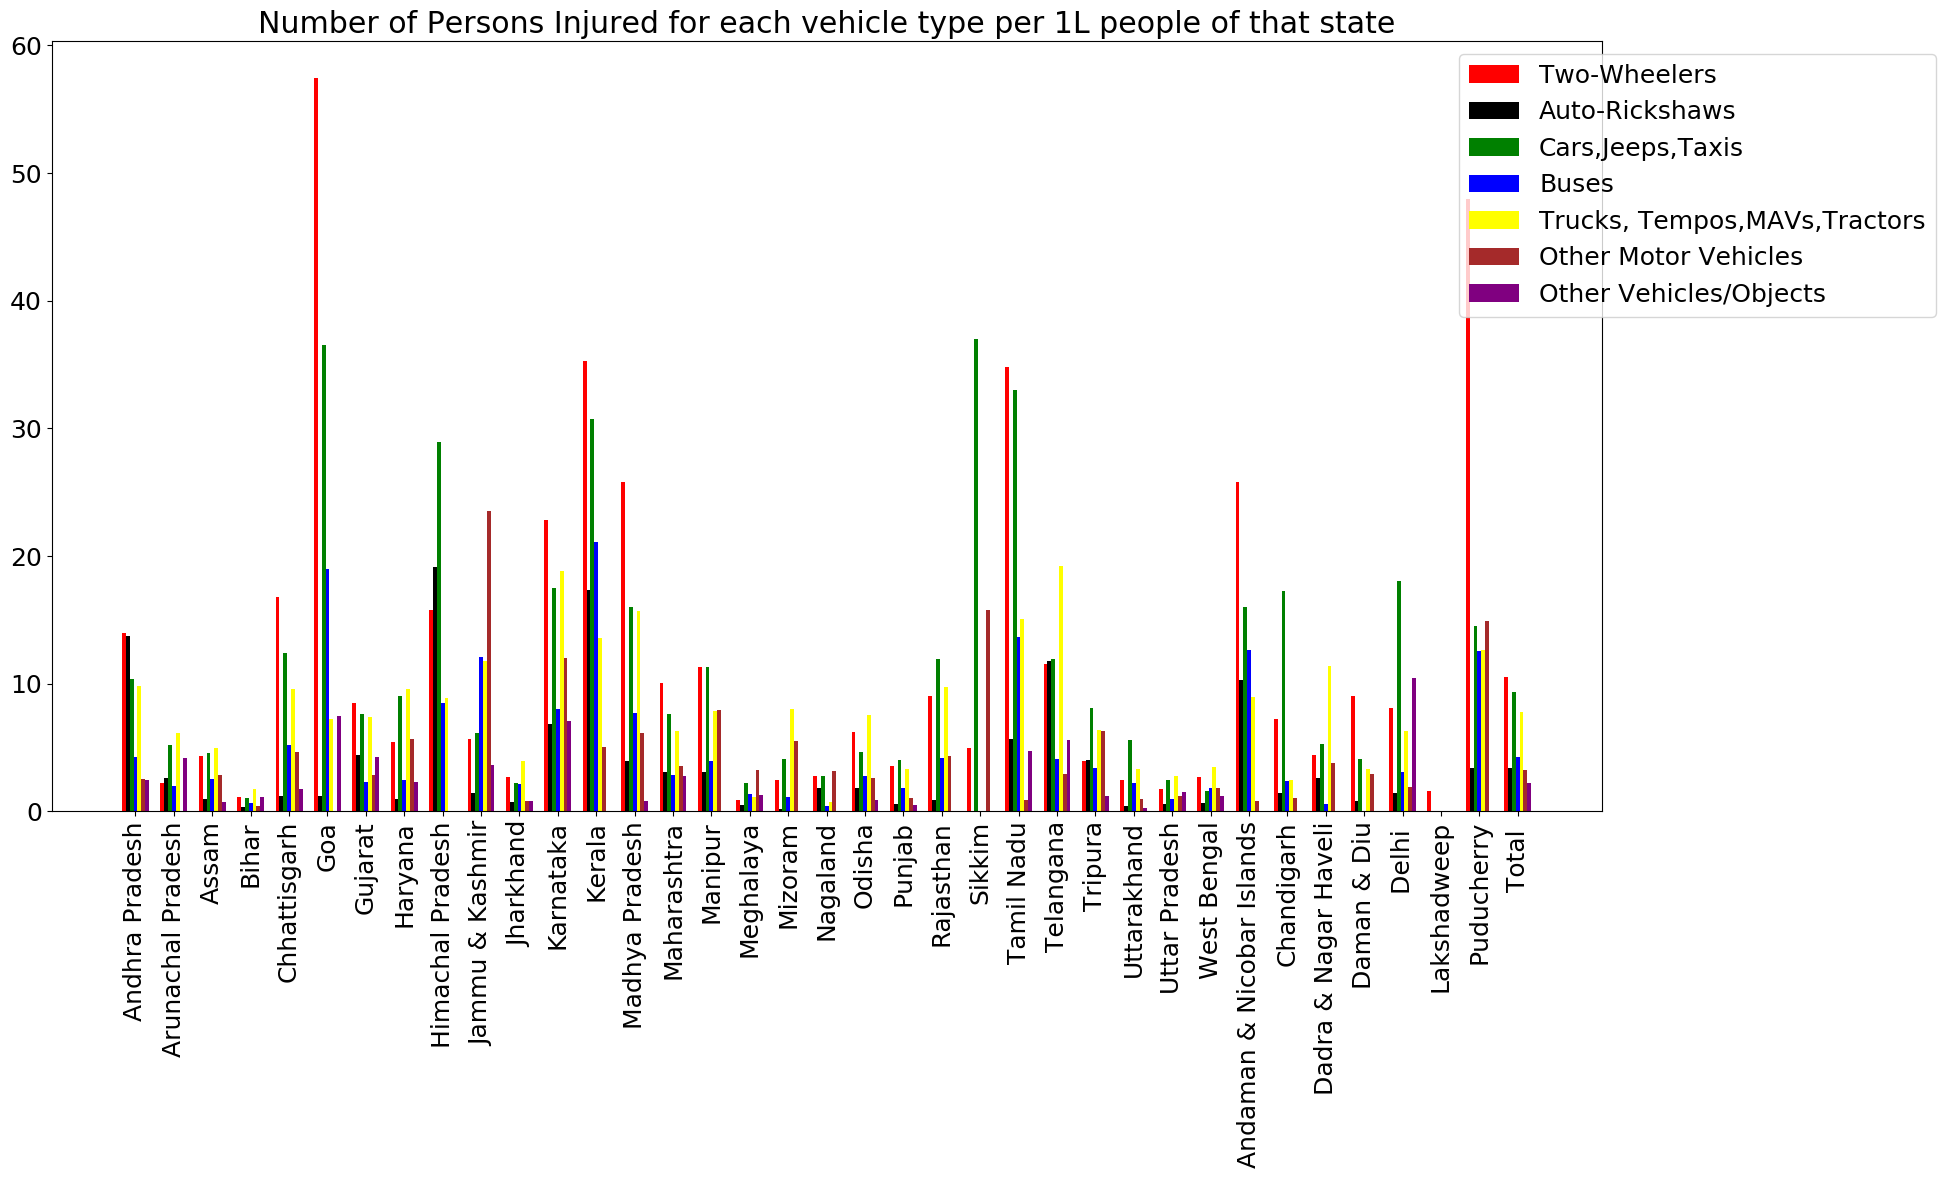

In [139]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.6,df['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df['Buses - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.9,1))
plt.title("Number of Persons Injured for each vehicle type per 1L people of that state")
plt.show()

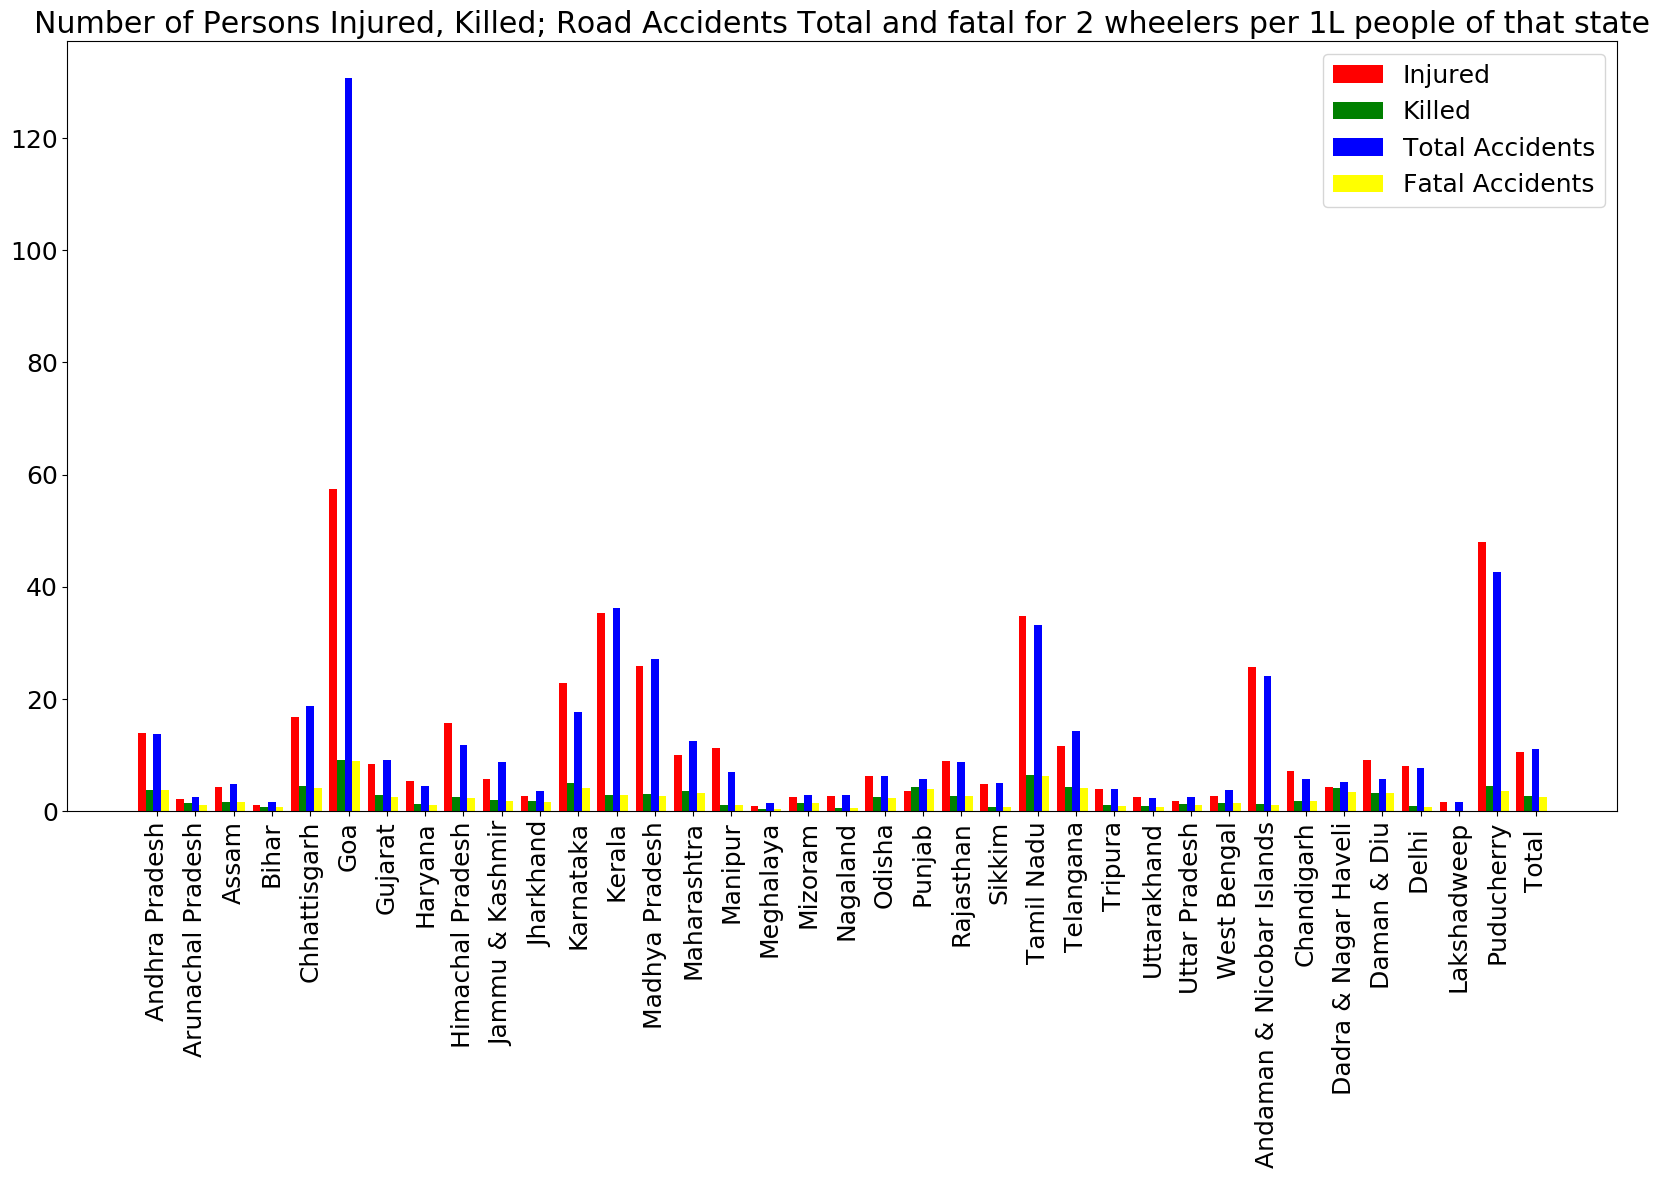

In [140]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
plt.bar(UT-0.4,df['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for 2 wheelers per 1L people of that state")
plt.show()

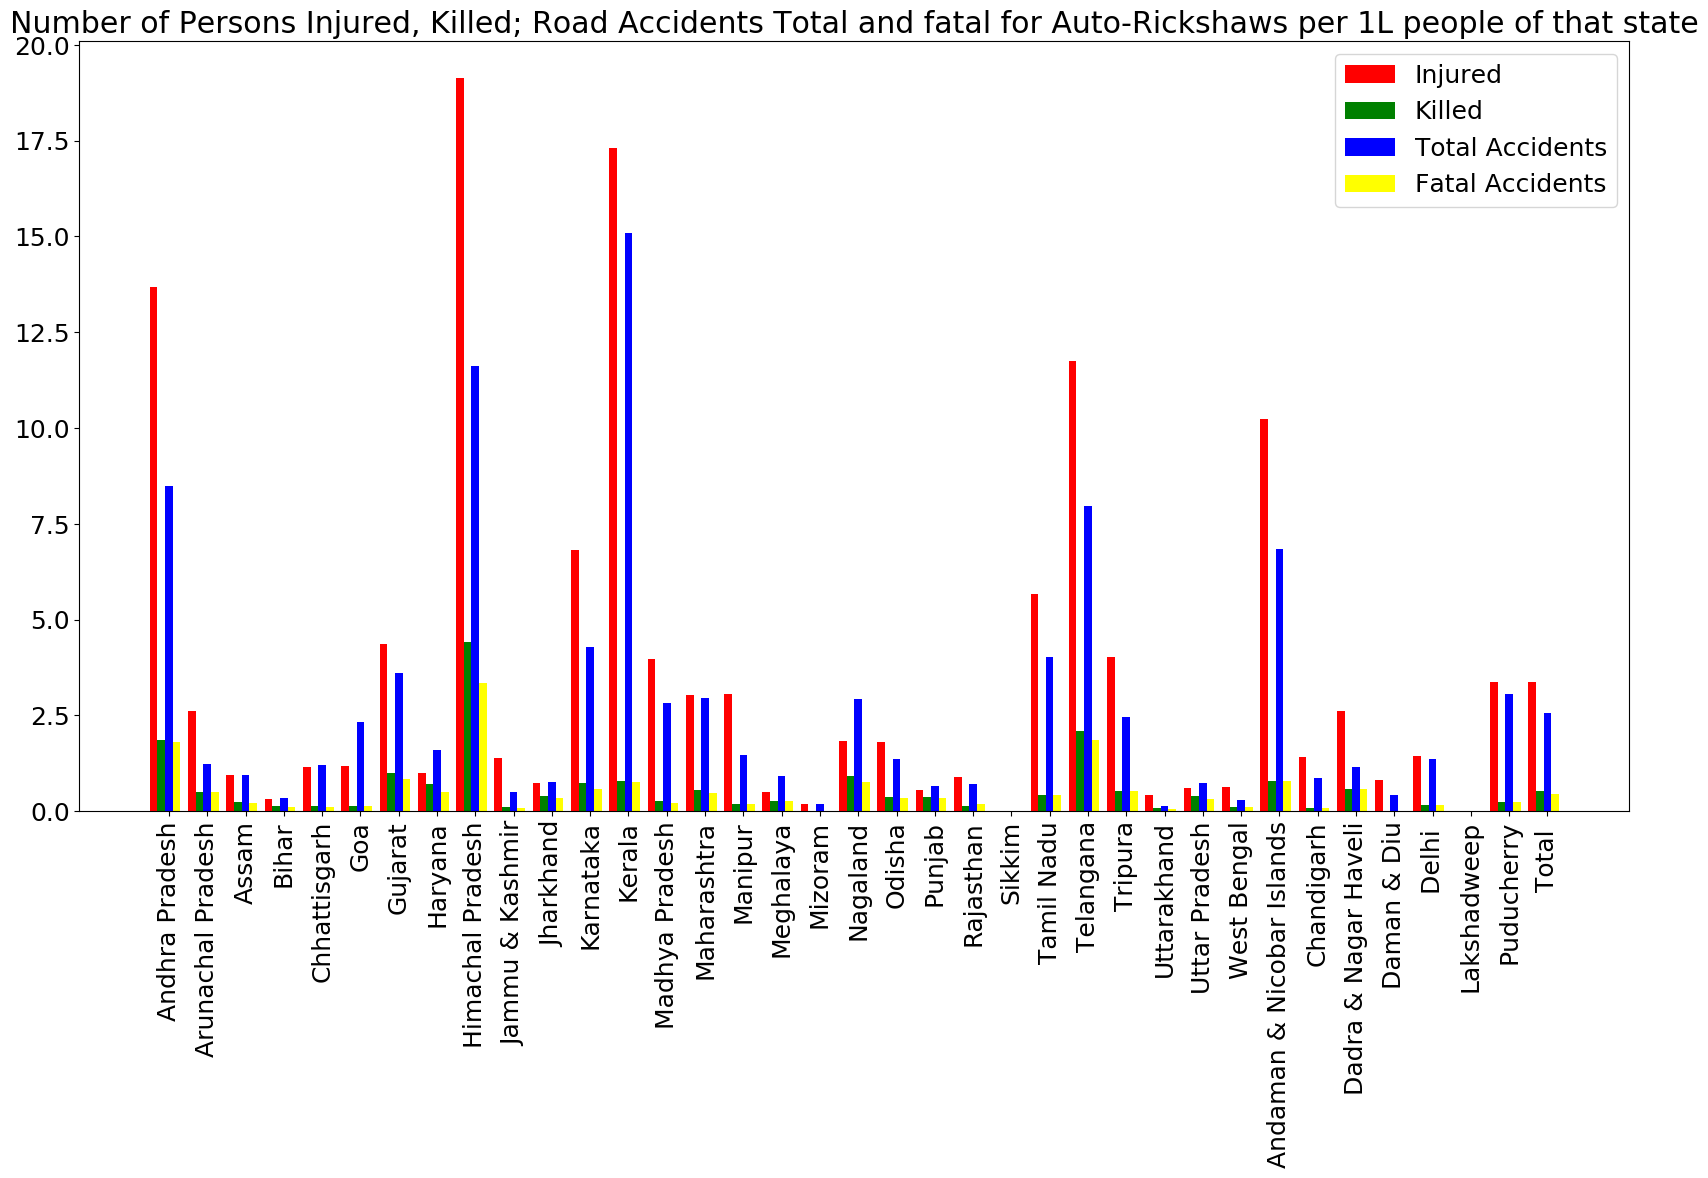

In [141]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Auto-Rickshaws per 1L people of that state")
plt.show()

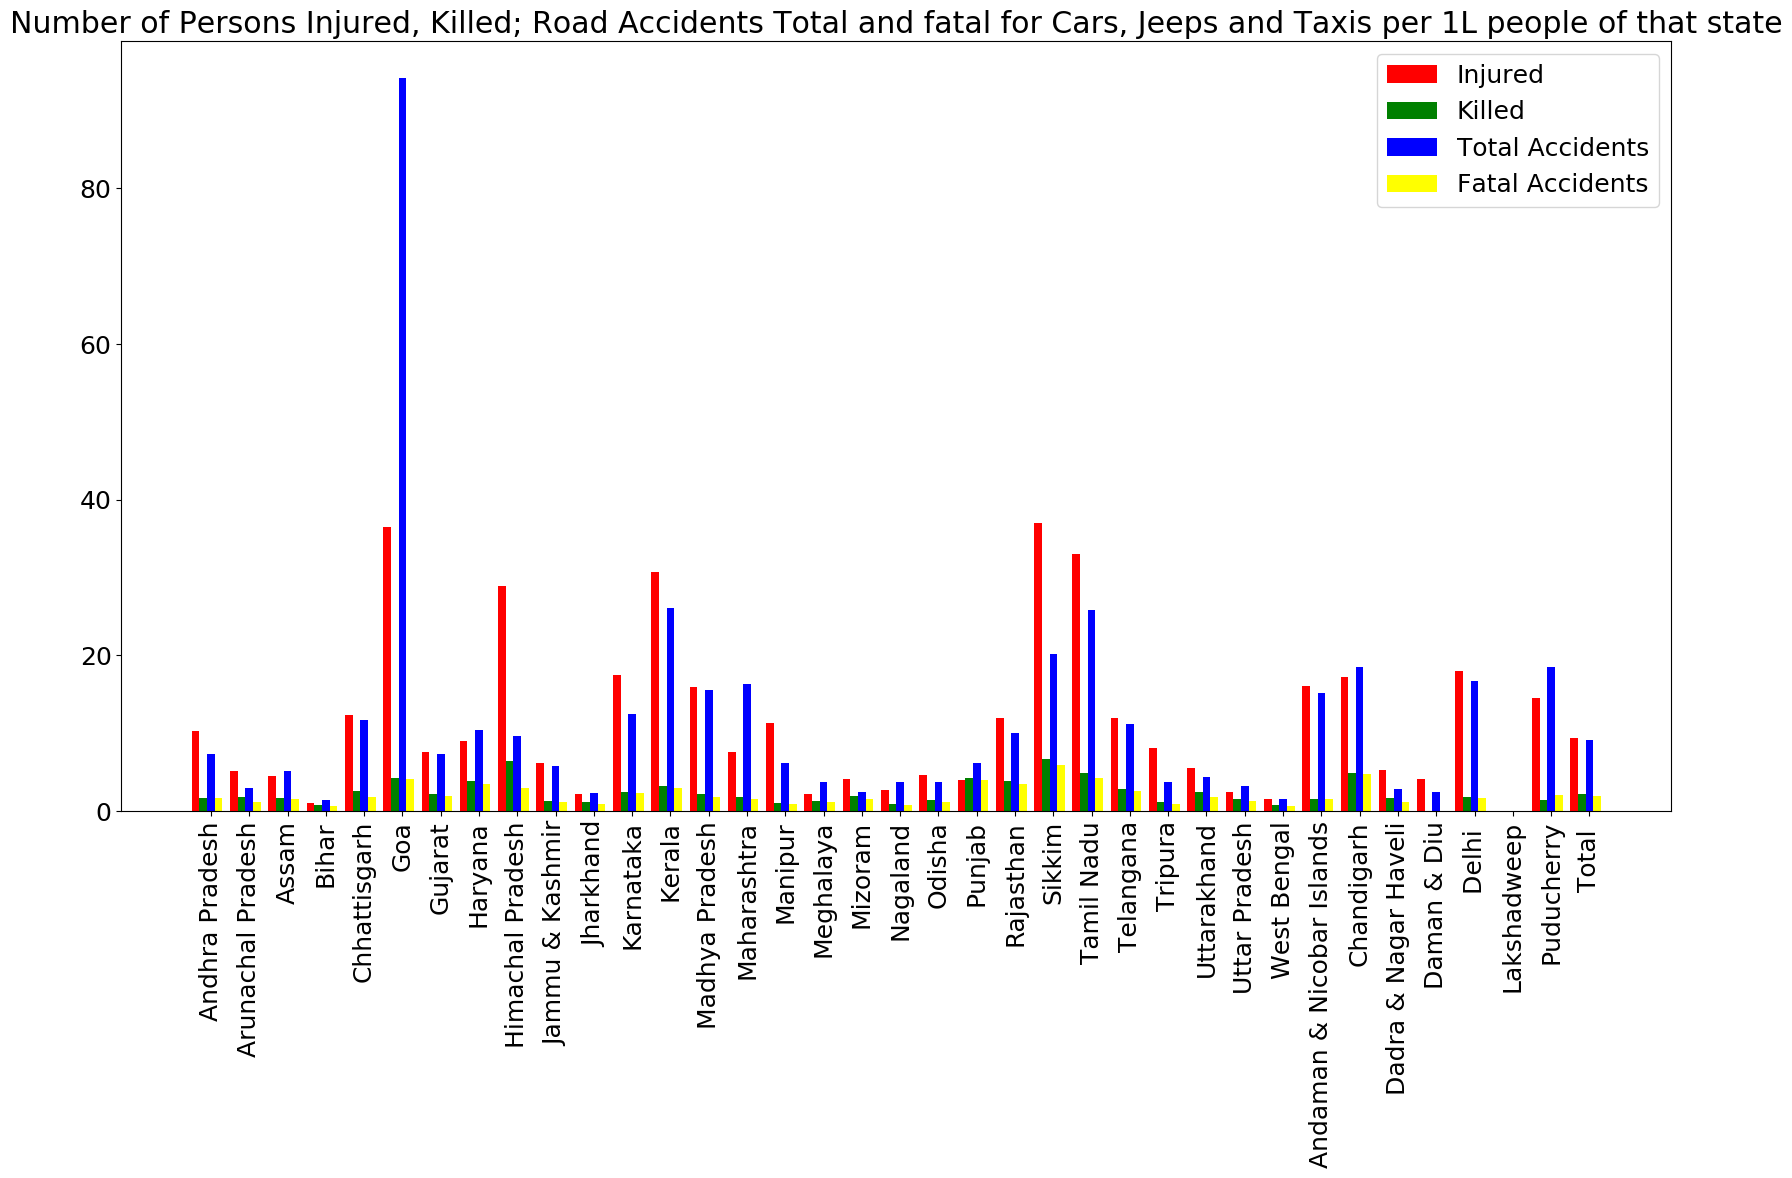

In [142]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Cars, Jeeps and Taxis per 1L people of that state")
plt.show()


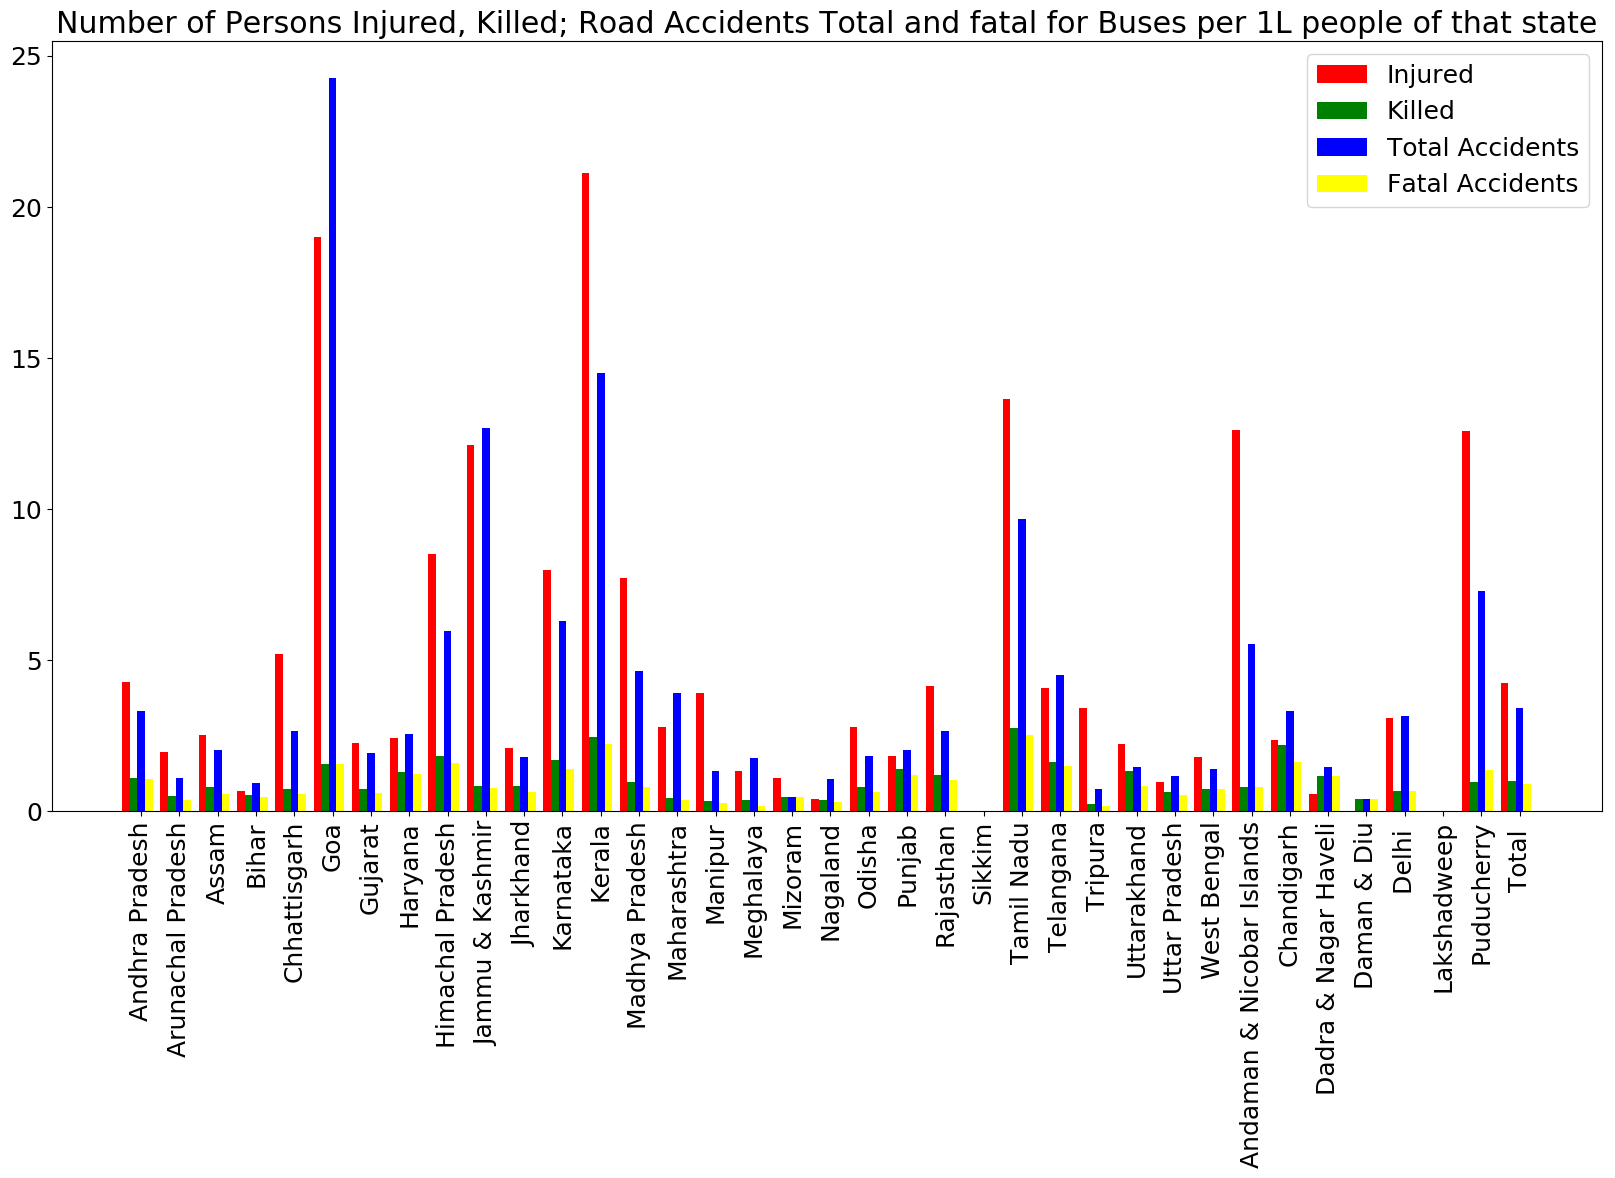

In [143]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Buses - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Buses - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Buses per 1L people of that state")
plt.show()


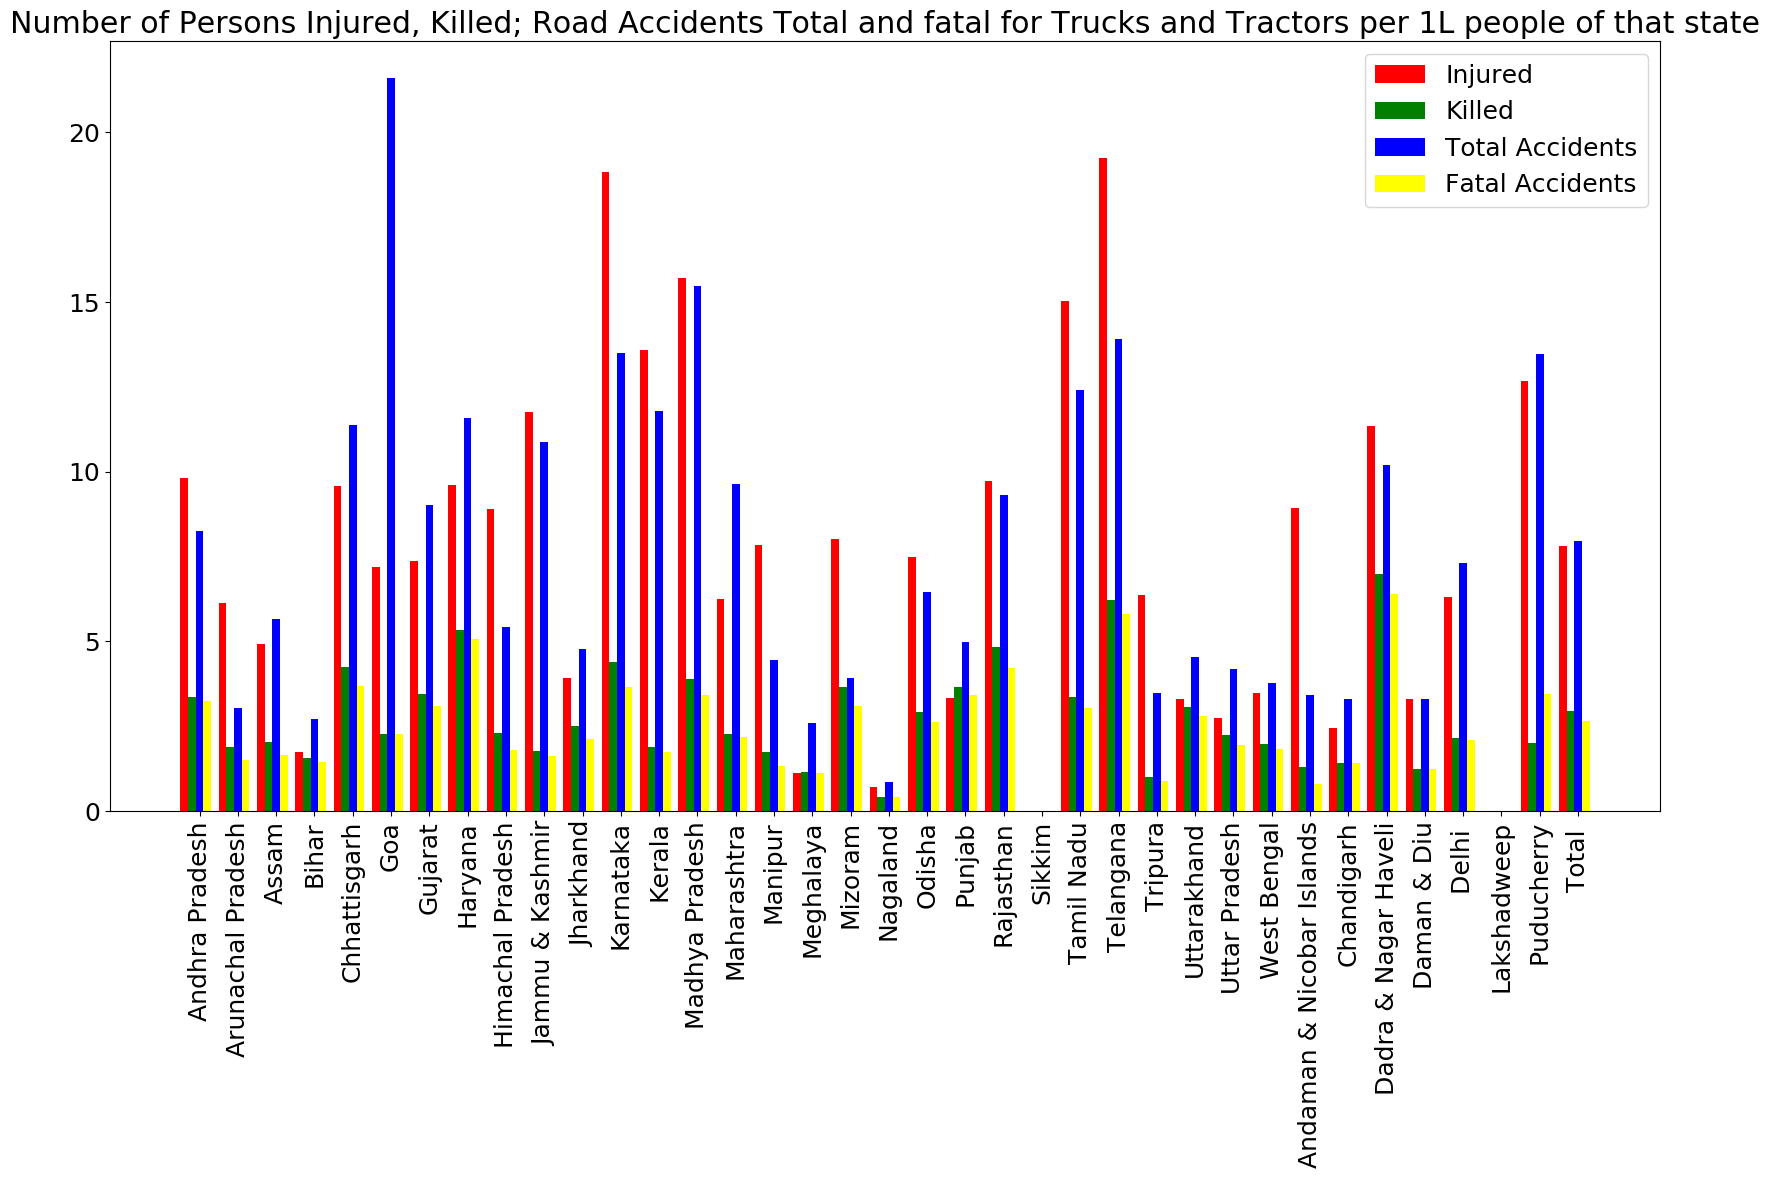

In [144]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Trucks and Tractors per 1L people of that state")
plt.show()

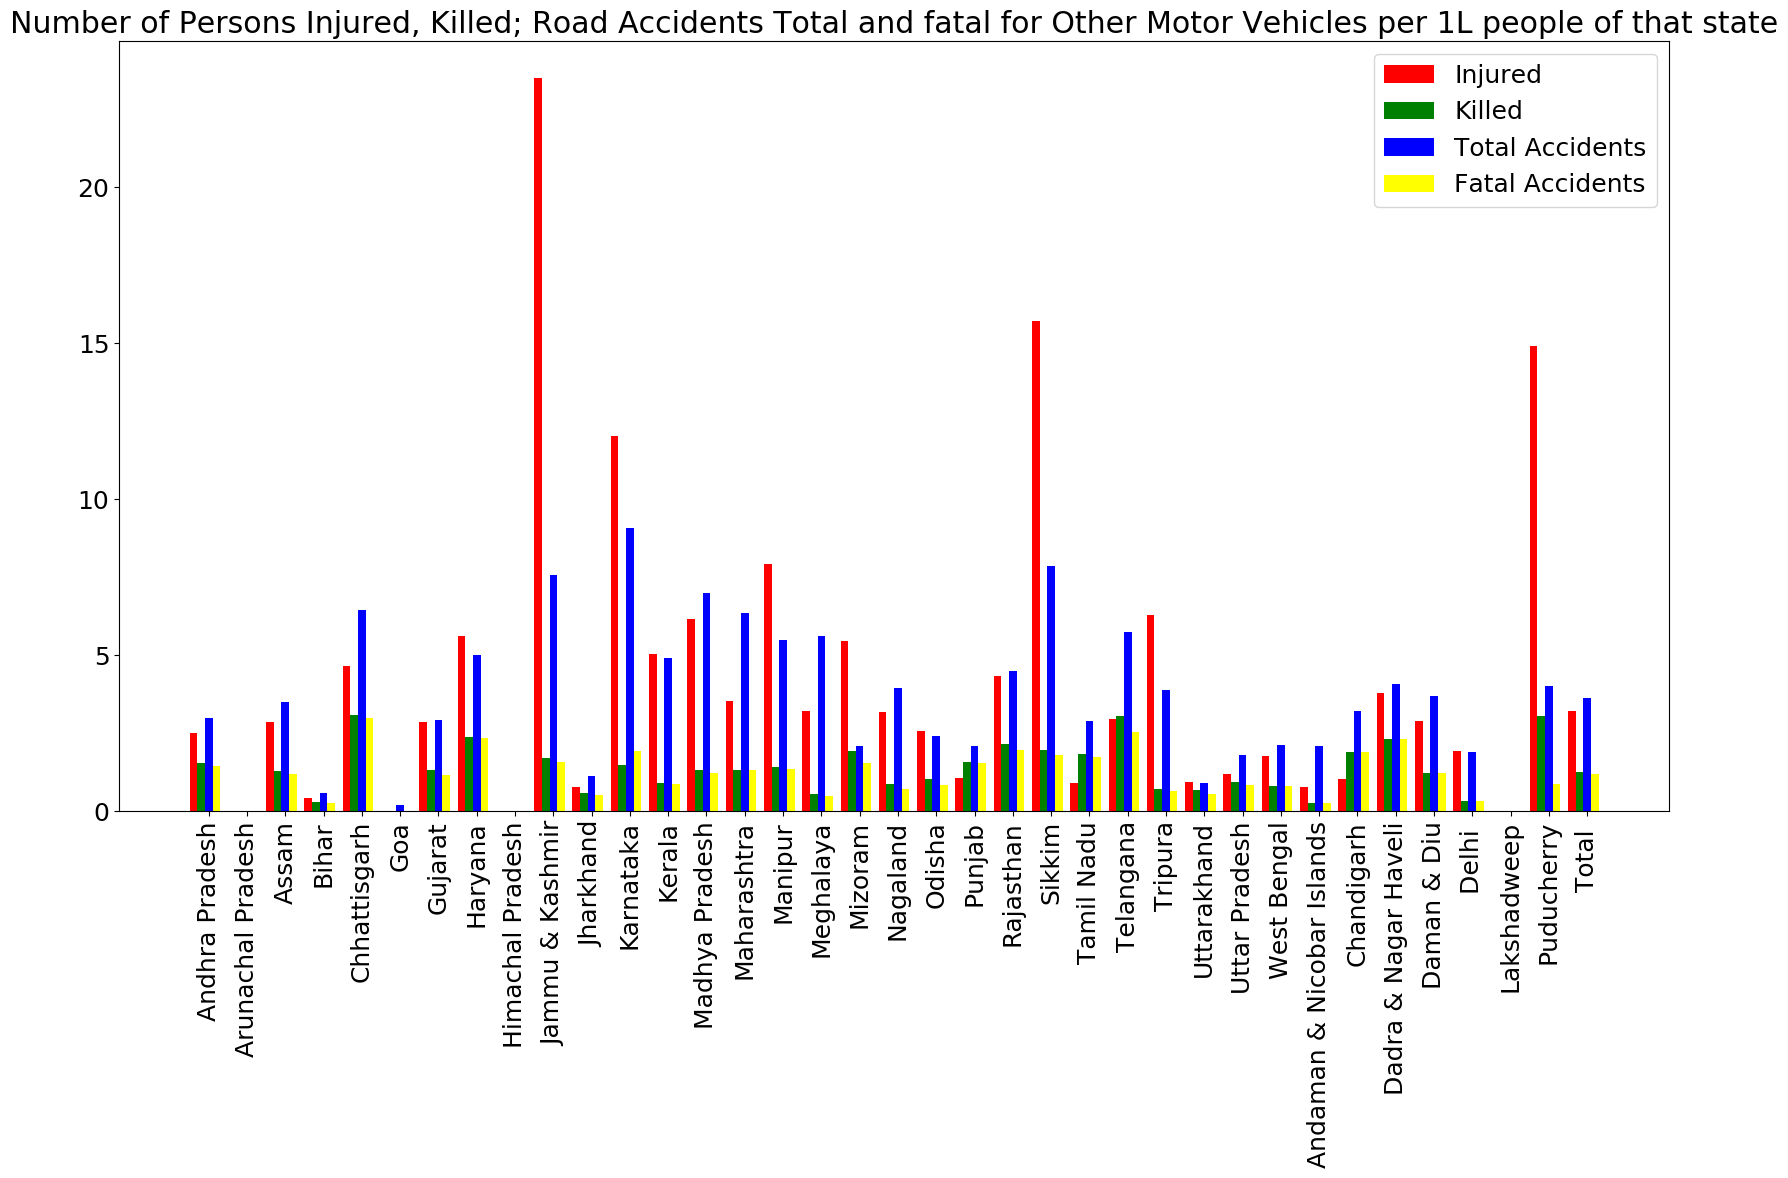

In [145]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Other Motor Vehicles per 1L people of that state")
plt.show()

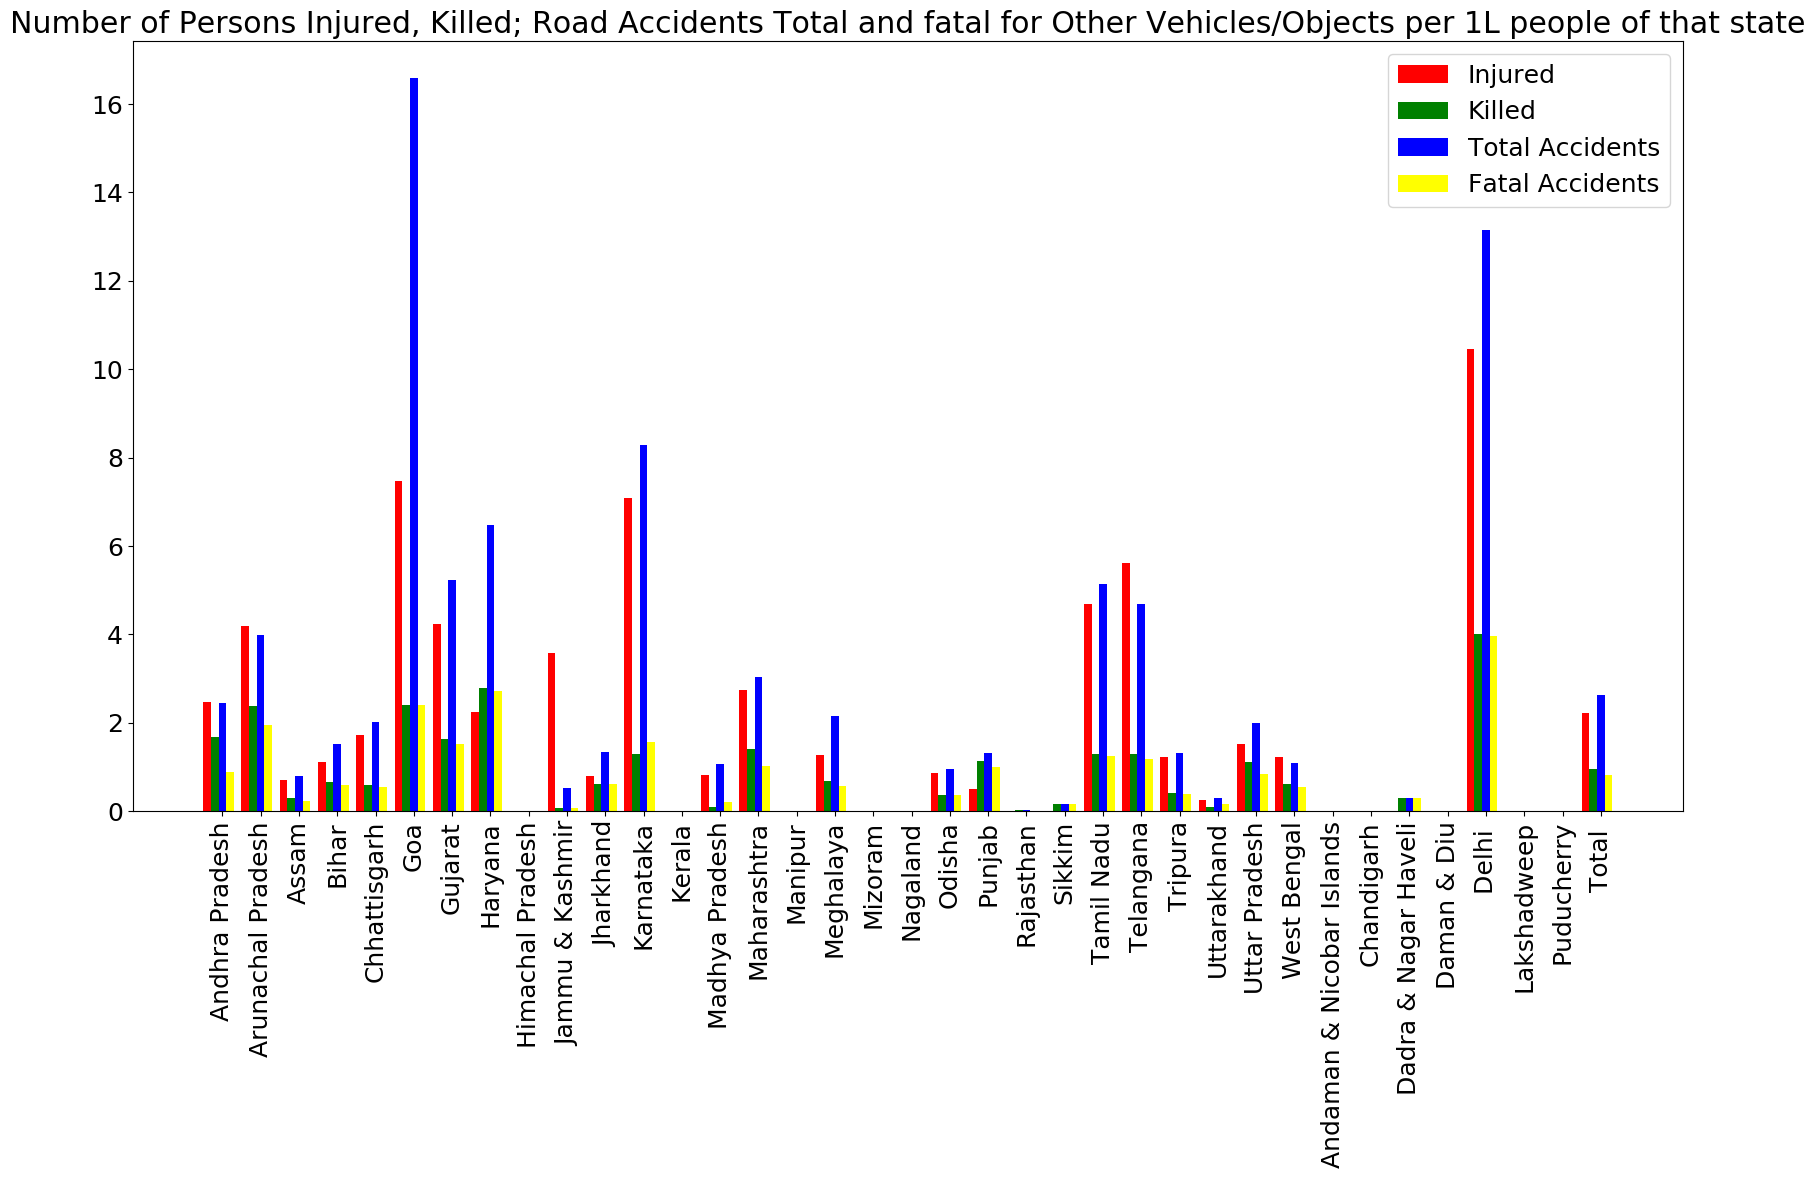

In [146]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.4,df['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for Other Vehicles/Objects per 1L people of that state")
plt.show()

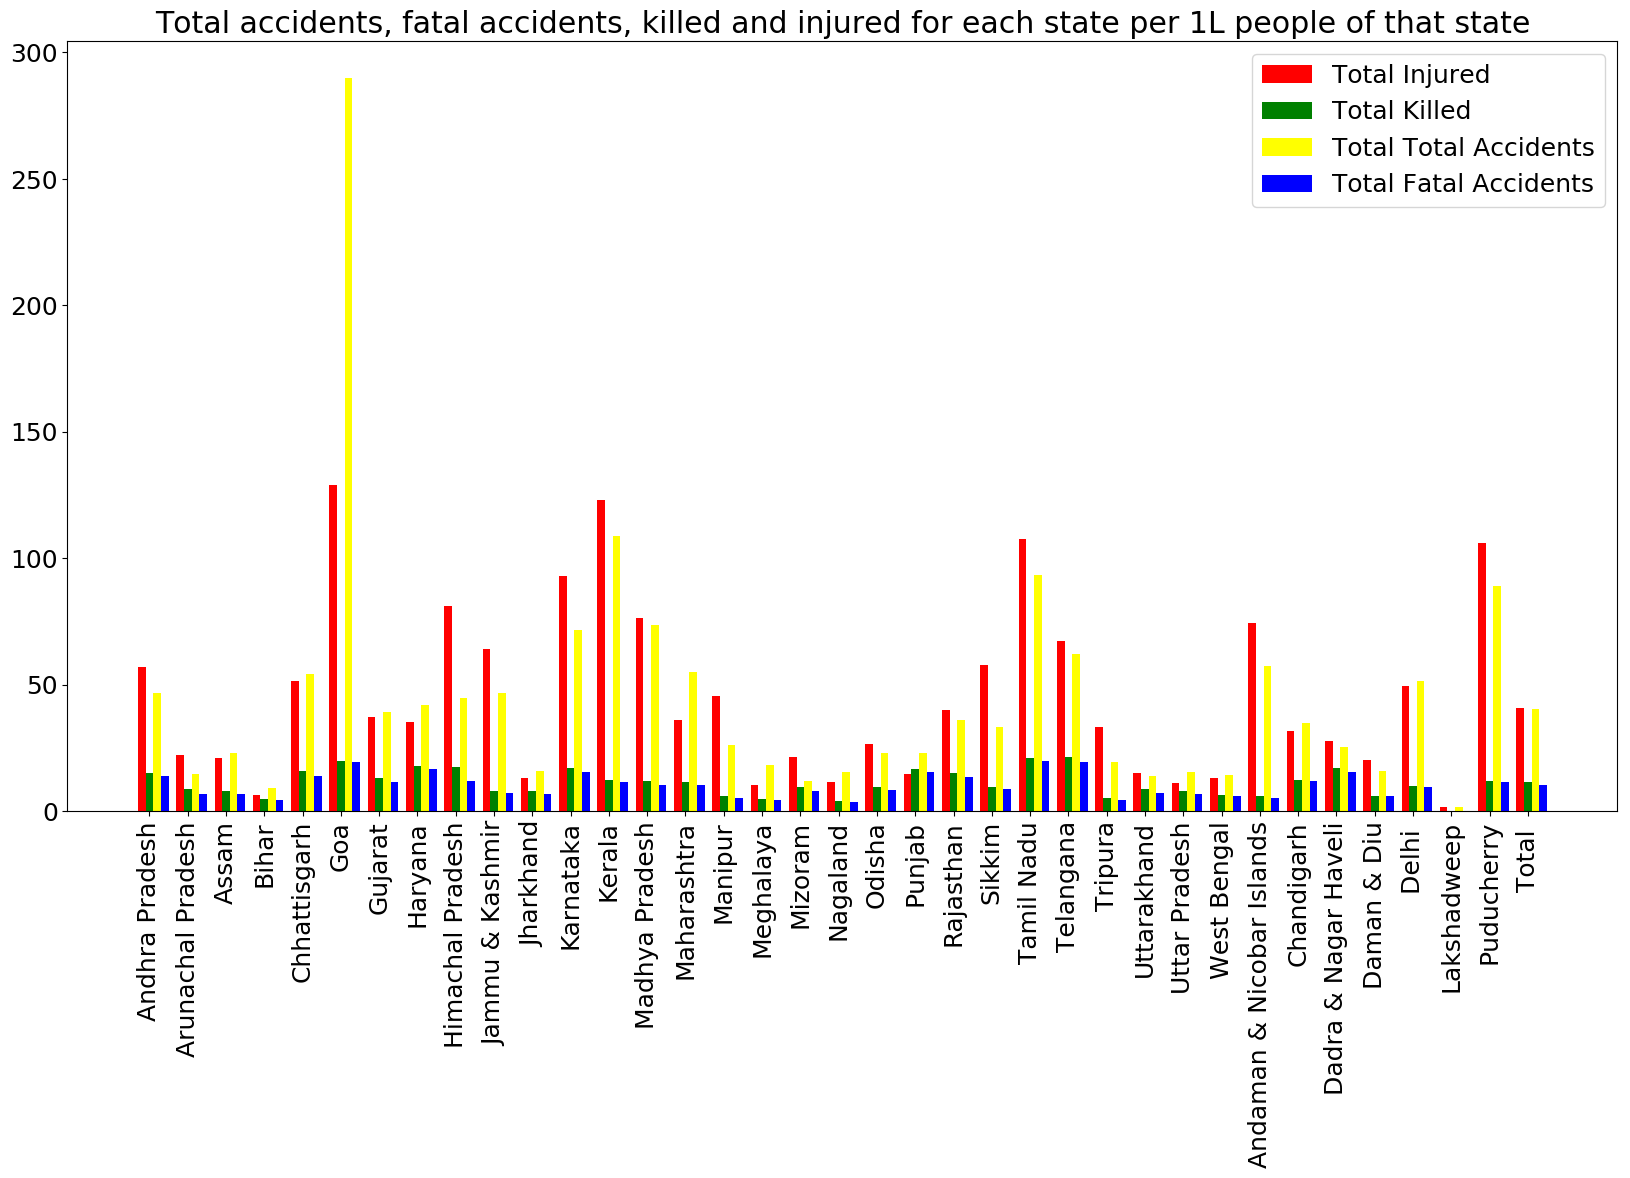

In [147]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
df['Sum Total Road Accidents - 2014 per 1L people']=df['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people']+df['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people']+df['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people']+\
    df['Buses - Number of Road Accidents - Total - 2014 per 1L people']+df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people']+df['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people']+\
    df['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people']
df['Sum Total Number of Persons Killed - 2014 per 1L people']=df['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people']+df['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people']+df['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people']+\
    df['Buses - Number of Persons - Killed - 2014 per 1L people']+df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people']+df['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people']+\
    df['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people']
df['Sum Total Number of Persons Injured - 2014 per 1L people']=df['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people']+df['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people']+df['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people']+\
    df['Buses - Number of Persons - Injured - 2014 per 1L people']+df['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people']+df['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people']+\
    df['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people']
df['Sum Total Fatal Road Accidents - 2014 per 1L people']=df['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']+df['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']+df['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']+df['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']+df['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people']

plt.bar(UT-0.2,df['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Injured')
plt.bar(UT,df['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Killed')
plt.bar(UT+0.2,df['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Total Total Accidents')
plt.bar(UT+0.4,df['Sum Total Fatal Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()

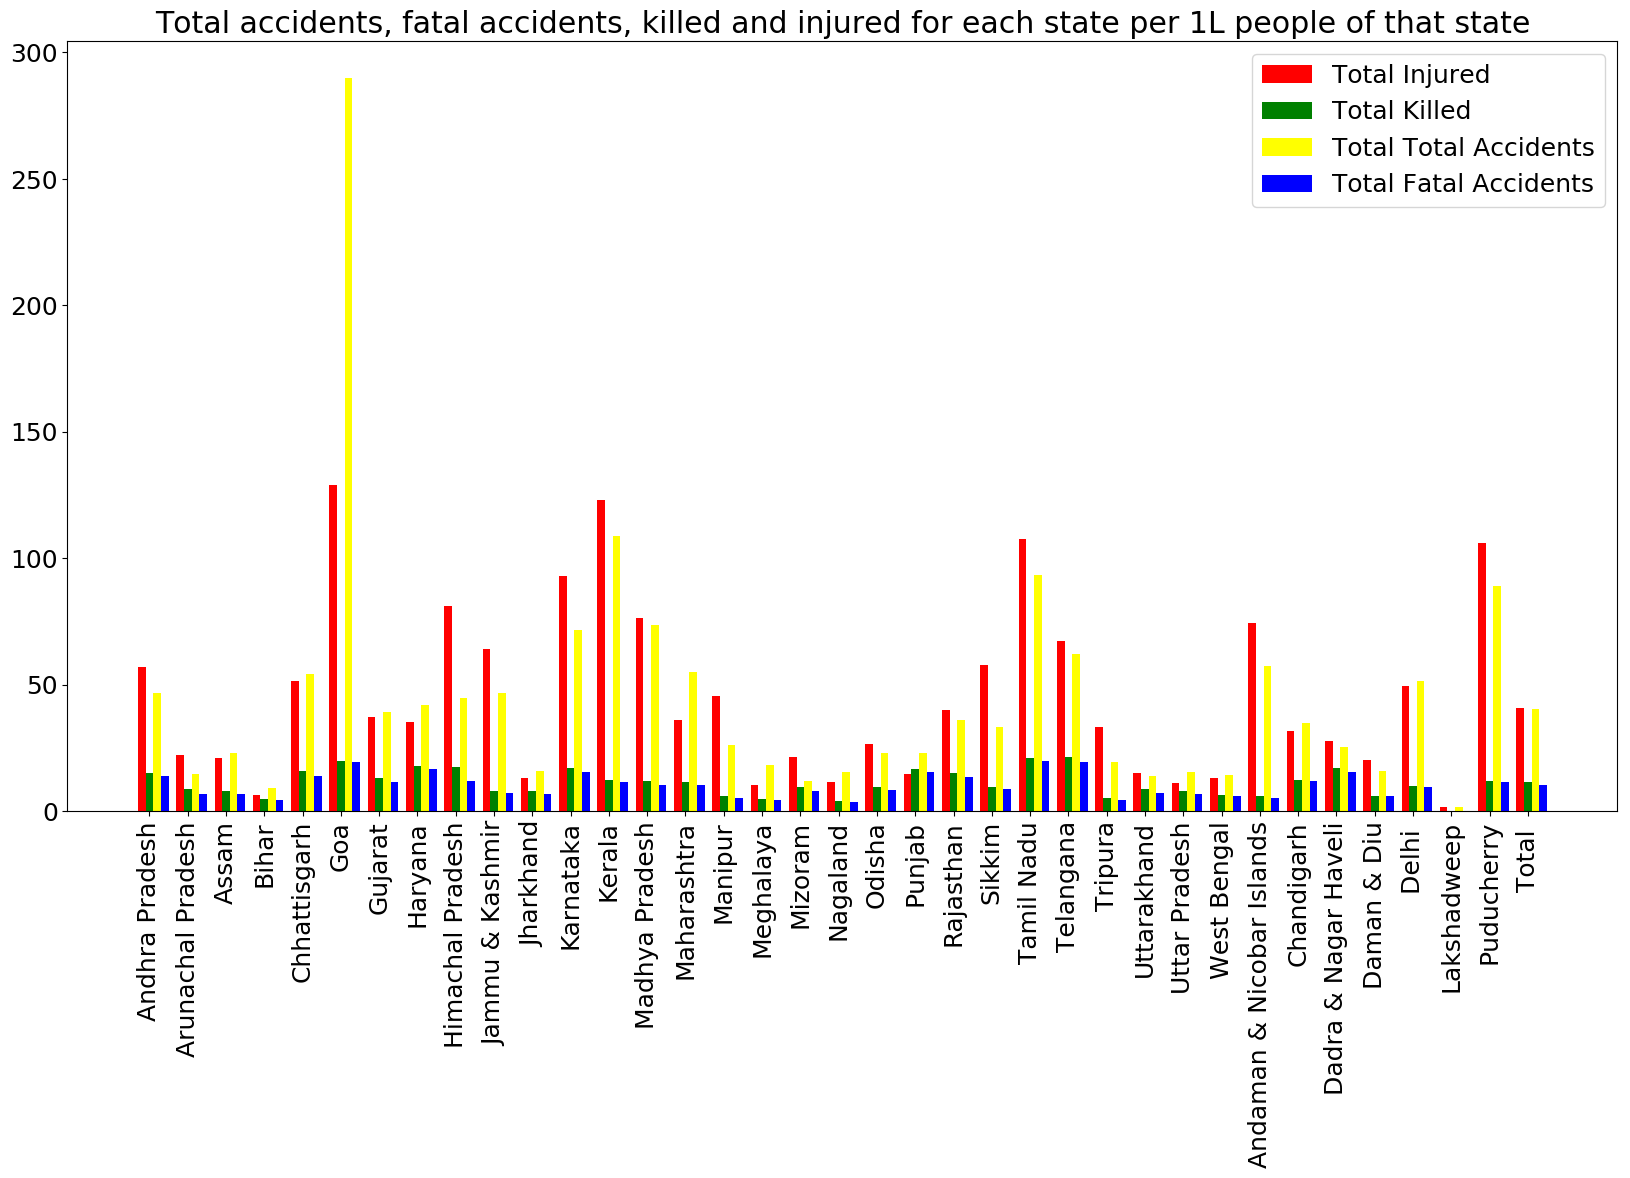

In [148]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
plt.bar(UT-0.2,df['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Injured')
plt.bar(UT,df['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Killed')
plt.bar(UT+0.2,df['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Total Total Accidents')
plt.bar(UT+0.4,df['Sum Total Fatal Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Fatal Accidents')
plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()

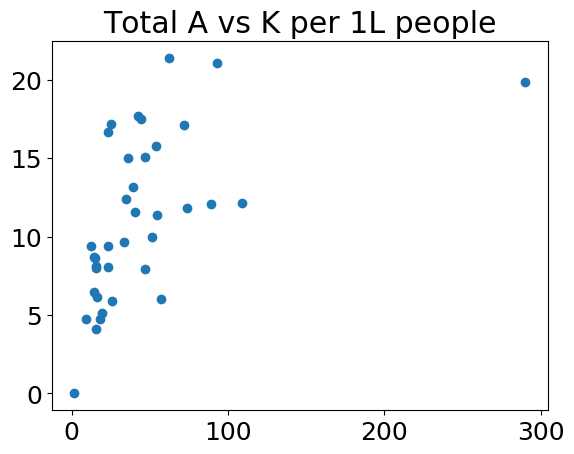

In [149]:
plt.scatter(df['Sum Total Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total A vs K per 1L people")
plt.show()

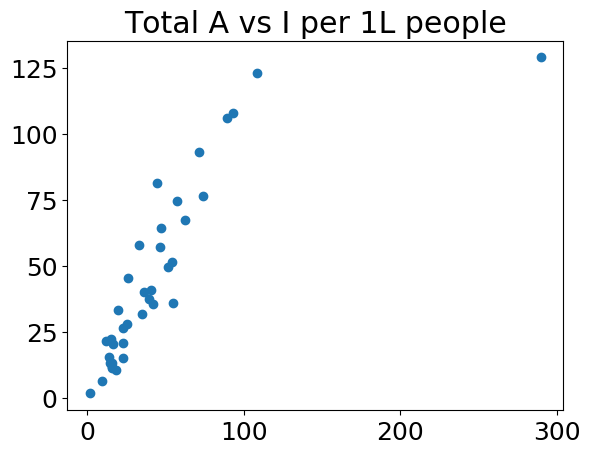

In [150]:
plt.scatter(df['Sum Total Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Injured - 2014 per 1L people'])
plt.title("Total A vs I per 1L people")
plt.show()


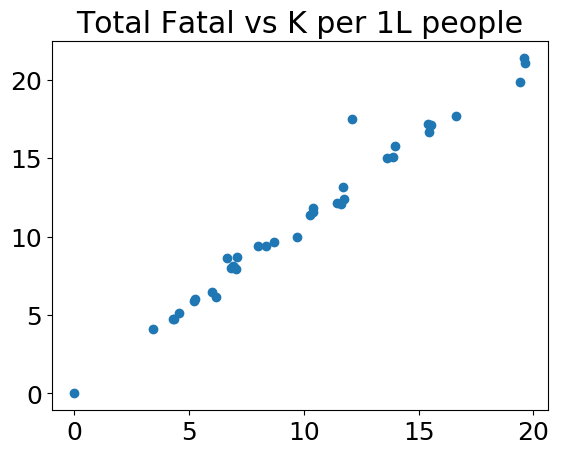

In [151]:
plt.scatter(df['Sum Total Fatal Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total Fatal vs K per 1L people")
plt.show()


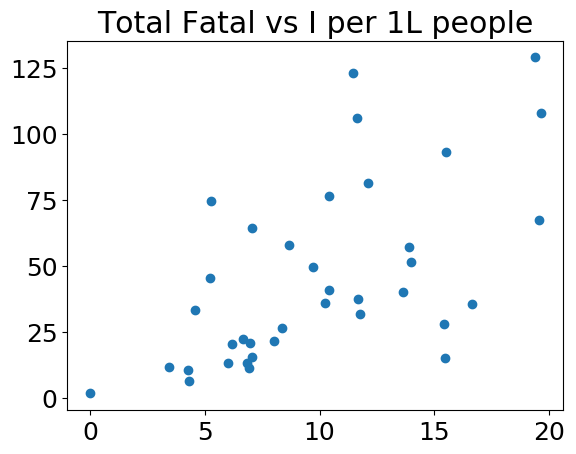

In [152]:
plt.scatter(df['Sum Total Fatal Road Accidents - 2014 per 1L people'],df['Sum Total Number of Persons Injured - 2014 per 1L people'])
plt.title("Total Fatal vs I per 1L people")
plt.show()

Estimated coefficients:
b_0 = -0.1629606880596839            
b_1 = 242.98233455482156


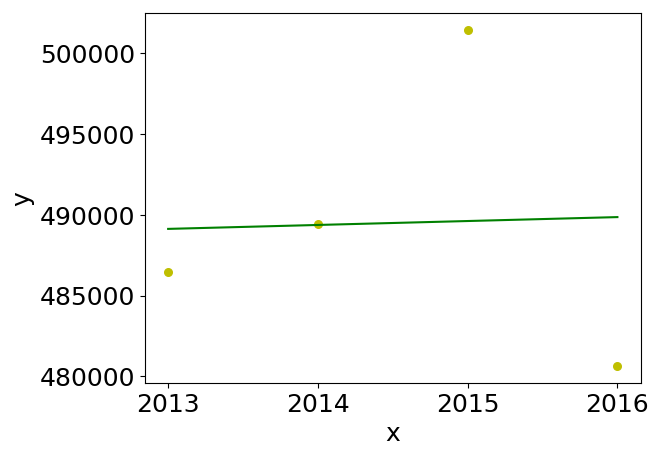

In [153]:
def estimate_coef(x, y):
    n = np.size(x)
 
    m_x, m_y = np.mean(x), np.mean(y)
 
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
 
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    y_pred = b[0] + b[1]*x
 
    plt.plot(x, y_pred, color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
 
def main():
    x = np.array([2013,2014,2015,2016])
    y = np.array([486476,489400,501423,480652])
 
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()